In [1]:
# importing the libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from itertools import chain
import seaborn as sns
from datetime import datetime

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn.image import resample_img
from nilearn.image import new_img_like, load_img, clean_img, crop_img
from nilearn.input_data import NiftiMasker
from scipy.stats import zscore
from glob import glob

# for creating validation set
from sklearn.model_selection import train_test_split
# for evaluating the model
from sklearn.metrics import accuracy_score

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import *
import torch.optim as optim
import h5py
# from torchsummary import summary
from tensorboardX import SummaryWriter

from IPython import display
%matplotlib inline

In [2]:
from src.dataloader import *

train_dset = MyDataset(task_type='age')
test_dset = MyDataset(task_type='age', test=True)

train_loader = DataLoader(train_dset, batch_size=8)
test_loader = DataLoader(test_dset, batch_size=8)

In [3]:
model = 'resnet'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Model {model.capitalize()} is selected.')


if model == 'resnet':
    from src.architectures.resnet import *

    opt = Option()

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    model = generate_model(model_depth=opt.model_depth,
                                n_classes=opt.n_classes,
                                n_input_channels=opt.n_input_channels,
                                shortcut_type=opt.shortcut_type,
                                conv1_t_size=opt.conv1_t_size,
                                conv1_t_stride=opt.conv1_t_stride,
                                no_max_pool=opt.no_max_pool,
                                widen_factor=opt.resnet_widen_factor)
    
elif model == 'levakov':
    from src.architectures.levakov_96 import *

    model = Levakov(task_type='age')
    
else: pass
model.to(device)

Model Resnet is selected.


ResNet(
  (conv1): Conv3d(1, 16, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
  (bn1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn2): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=Tru

In [4]:
task_type = 'age'
resize = True
scheduler = False
epochs = range(100)
folds = range(10)

In [5]:
# summary = SummaryWriter(f'./tensorboard/{datetime.now().strftime("%Y-%m-%d_%H%M")}')

In [6]:
from src.losses import RMSELoss

In [7]:
LOSS = {
    'RMSE': RMSELoss(),
    'MSE': nn.MSELoss(),
}

In [8]:
# loss_fn = nn.MSELoss()
loss = 'RMSE'

loss_fn = LOSS[loss]
optimizer = optim.Adam(model.parameters(), lr=1e-4)

FOLD 0
EPOCHS 0
RMSE :: [TRAIN] 58.937 | [VALID] 57.247
CORR :: [TRAIN] 0.285 | [VALID] 0.561


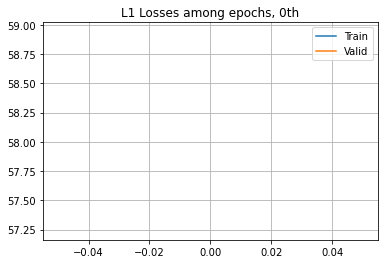

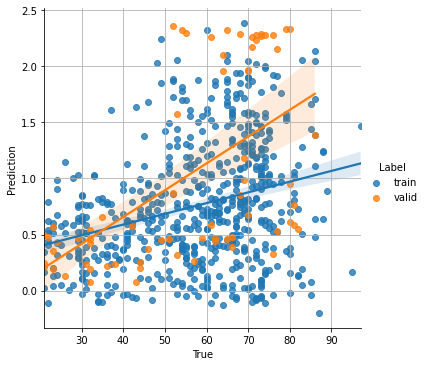

FOLD 0
EPOCHS 1
RMSE :: [TRAIN] 57.868 | [VALID] 56.885
CORR :: [TRAIN] 0.587 | [VALID] 0.755
FOLD 0
EPOCHS 2
RMSE :: [TRAIN] 57.123 | [VALID] 55.983
CORR :: [TRAIN] 0.687 | [VALID] 0.827
FOLD 0
EPOCHS 3
RMSE :: [TRAIN] 56.420 | [VALID] 56.523
CORR :: [TRAIN] 0.714 | [VALID] 0.759
FOLD 0
EPOCHS 4
RMSE :: [TRAIN] 55.698 | [VALID] 56.044
CORR :: [TRAIN] 0.731 | [VALID] 0.699
FOLD 0
EPOCHS 5
RMSE :: [TRAIN] 54.958 | [VALID] 55.374
CORR :: [TRAIN] 0.746 | [VALID] 0.601
FOLD 0
EPOCHS 6
RMSE :: [TRAIN] 54.186 | [VALID] 54.813
CORR :: [TRAIN] 0.756 | [VALID] 0.410
FOLD 0
EPOCHS 7
RMSE :: [TRAIN] 53.362 | [VALID] 53.480
CORR :: [TRAIN] 0.769 | [VALID] 0.608
FOLD 0
EPOCHS 8
RMSE :: [TRAIN] 52.474 | [VALID] 51.722
CORR :: [TRAIN] 0.788 | [VALID] 0.793
FOLD 0
EPOCHS 9
RMSE :: [TRAIN] 51.515 | [VALID] 50.369
CORR :: [TRAIN] 0.809 | [VALID] 0.847
FOLD 0
EPOCHS 10
RMSE :: [TRAIN] 50.497 | [VALID] 49.315
CORR :: [TRAIN] 0.829 | [VALID] 0.876


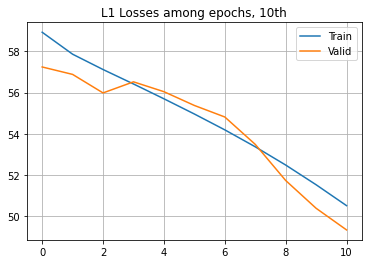

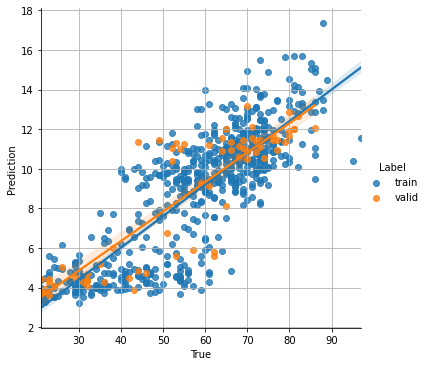

FOLD 0
EPOCHS 11
RMSE :: [TRAIN] 49.418 | [VALID] 47.701
CORR :: [TRAIN] 0.848 | [VALID] 0.868
FOLD 0
EPOCHS 12
RMSE :: [TRAIN] 48.264 | [VALID] 45.997
CORR :: [TRAIN] 0.866 | [VALID] 0.831
FOLD 0
EPOCHS 13
RMSE :: [TRAIN] 47.060 | [VALID] 45.375
CORR :: [TRAIN] 0.876 | [VALID] 0.885
FOLD 0
EPOCHS 14
RMSE :: [TRAIN] 45.808 | [VALID] 44.508
CORR :: [TRAIN] 0.881 | [VALID] 0.884
FOLD 0
EPOCHS 15
RMSE :: [TRAIN] 44.465 | [VALID] 45.107
CORR :: [TRAIN] 0.897 | [VALID] 0.791
FOLD 0
EPOCHS 16
RMSE :: [TRAIN] 43.117 | [VALID] 43.664
CORR :: [TRAIN] 0.904 | [VALID] 0.810
FOLD 0
EPOCHS 17
RMSE :: [TRAIN] 41.749 | [VALID] 46.643
CORR :: [TRAIN] 0.909 | [VALID] -0.035
FOLD 0
EPOCHS 18
RMSE :: [TRAIN] 40.389 | [VALID] 42.251
CORR :: [TRAIN] 0.912 | [VALID] 0.830
FOLD 0
EPOCHS 19
RMSE :: [TRAIN] 38.953 | [VALID] 39.512
CORR :: [TRAIN] 0.920 | [VALID] 0.881
FOLD 0
EPOCHS 20
RMSE :: [TRAIN] 37.529 | [VALID] 37.889
CORR :: [TRAIN] 0.921 | [VALID] 0.883


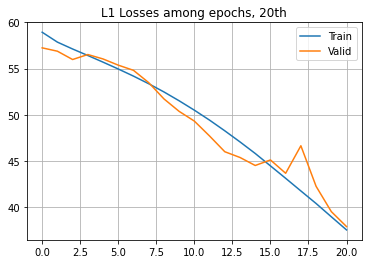

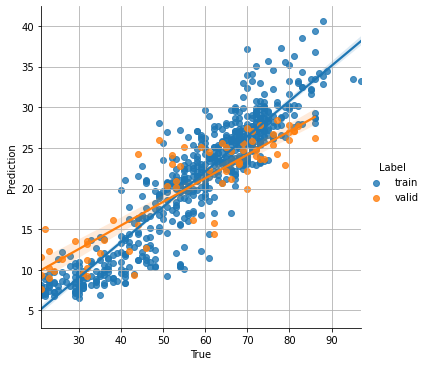

FOLD 0
EPOCHS 21
RMSE :: [TRAIN] 36.090 | [VALID] 36.816
CORR :: [TRAIN] 0.920 | [VALID] 0.873
FOLD 0
EPOCHS 22
RMSE :: [TRAIN] 34.654 | [VALID] 33.603
CORR :: [TRAIN] 0.911 | [VALID] 0.807
FOLD 0
EPOCHS 23
RMSE :: [TRAIN] 33.124 | [VALID] 32.969
CORR :: [TRAIN] 0.917 | [VALID] 0.820
FOLD 0
EPOCHS 24
RMSE :: [TRAIN] 31.613 | [VALID] 31.596
CORR :: [TRAIN] 0.928 | [VALID] 0.849
FOLD 0
EPOCHS 25
RMSE :: [TRAIN] 30.027 | [VALID] 33.916
CORR :: [TRAIN] 0.935 | [VALID] 0.729
FOLD 0
EPOCHS 26
RMSE :: [TRAIN] 28.406 | [VALID] 31.115
CORR :: [TRAIN] 0.940 | [VALID] 0.794
FOLD 0
EPOCHS 27
RMSE :: [TRAIN] 26.789 | [VALID] 28.754
CORR :: [TRAIN] 0.942 | [VALID] 0.853
FOLD 0
EPOCHS 28
RMSE :: [TRAIN] 25.108 | [VALID] 32.008
CORR :: [TRAIN] 0.942 | [VALID] 0.747
FOLD 0
EPOCHS 29
RMSE :: [TRAIN] 23.493 | [VALID] 24.014
CORR :: [TRAIN] 0.941 | [VALID] 0.896
FOLD 0
EPOCHS 30
RMSE :: [TRAIN] 21.877 | [VALID] 23.398
CORR :: [TRAIN] 0.936 | [VALID] 0.855


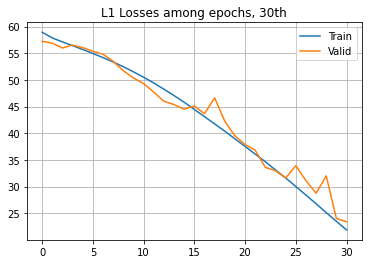

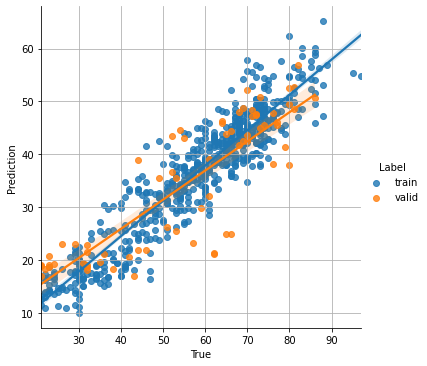

FOLD 0
EPOCHS 31
RMSE :: [TRAIN] 20.299 | [VALID] 23.340
CORR :: [TRAIN] 0.934 | [VALID] 0.871
FOLD 0
EPOCHS 32
RMSE :: [TRAIN] 18.478 | [VALID] 23.235
CORR :: [TRAIN] 0.939 | [VALID] 0.850
FOLD 0
EPOCHS 33
RMSE :: [TRAIN] 16.978 | [VALID] 17.022
CORR :: [TRAIN] 0.930 | [VALID] 0.861
FOLD 0
EPOCHS 34
RMSE :: [TRAIN] 15.334 | [VALID] 16.854
CORR :: [TRAIN] 0.932 | [VALID] 0.878
FOLD 0
EPOCHS 35
RMSE :: [TRAIN] 13.798 | [VALID] 15.201
CORR :: [TRAIN] 0.930 | [VALID] 0.897
FOLD 0
EPOCHS 36
RMSE :: [TRAIN] 12.388 | [VALID] 27.336
CORR :: [TRAIN] 0.926 | [VALID] 0.623
FOLD 0
EPOCHS 37
RMSE :: [TRAIN] 10.644 | [VALID] 14.547
CORR :: [TRAIN] 0.932 | [VALID] 0.875
FOLD 0
EPOCHS 38
RMSE :: [TRAIN] 9.382 | [VALID] 12.853
CORR :: [TRAIN] 0.930 | [VALID] 0.893
FOLD 0
EPOCHS 39
RMSE :: [TRAIN] 7.755 | [VALID] 11.020
CORR :: [TRAIN] 0.940 | [VALID] 0.902
FOLD 0
EPOCHS 40
RMSE :: [TRAIN] 7.117 | [VALID] 12.354
CORR :: [TRAIN] 0.935 | [VALID] 0.859


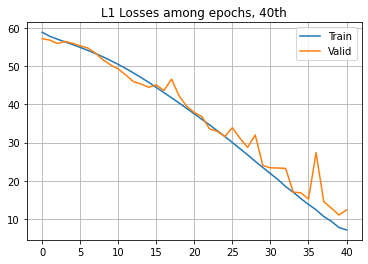

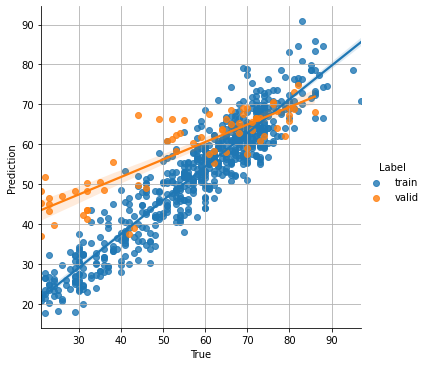

FOLD 0
EPOCHS 41
RMSE :: [TRAIN] 6.372 | [VALID] 10.432
CORR :: [TRAIN] 0.936 | [VALID] 0.880
FOLD 0
EPOCHS 42
RMSE :: [TRAIN] 6.075 | [VALID] 16.225
CORR :: [TRAIN] 0.935 | [VALID] 0.709
FOLD 0
EPOCHS 43
RMSE :: [TRAIN] 5.735 | [VALID] 9.559
CORR :: [TRAIN] 0.934 | [VALID] 0.897
FOLD 0
EPOCHS 44
RMSE :: [TRAIN] 5.346 | [VALID] 11.281
CORR :: [TRAIN] 0.937 | [VALID] 0.877
FOLD 0
EPOCHS 45
RMSE :: [TRAIN] 5.121 | [VALID] 11.307
CORR :: [TRAIN] 0.939 | [VALID] 0.876
FOLD 0
EPOCHS 46
RMSE :: [TRAIN] 5.164 | [VALID] 11.953
CORR :: [TRAIN] 0.936 | [VALID] 0.865
FOLD 0
EPOCHS 47
RMSE :: [TRAIN] 5.221 | [VALID] 9.723
CORR :: [TRAIN] 0.935 | [VALID] 0.887
FOLD 0
EPOCHS 48
RMSE :: [TRAIN] 4.879 | [VALID] 8.899
CORR :: [TRAIN] 0.941 | [VALID] 0.888
FOLD 0
EPOCHS 49
RMSE :: [TRAIN] 4.659 | [VALID] 8.835
CORR :: [TRAIN] 0.944 | [VALID] 0.888
FOLD 0
EPOCHS 50
RMSE :: [TRAIN] 4.498 | [VALID] 9.286
CORR :: [TRAIN] 0.947 | [VALID] 0.891


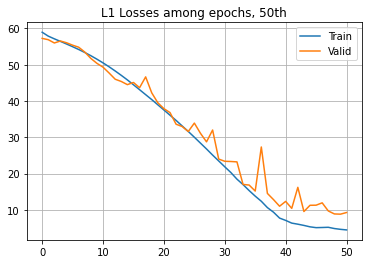

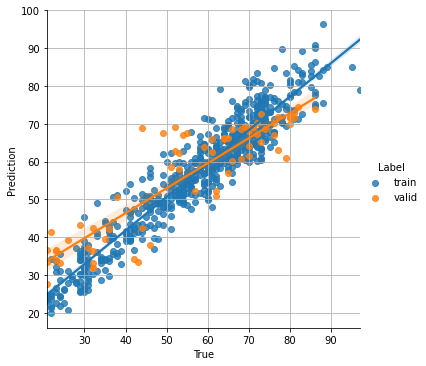

FOLD 0
EPOCHS 51
RMSE :: [TRAIN] 4.640 | [VALID] 8.540
CORR :: [TRAIN] 0.946 | [VALID] 0.900
FOLD 0
EPOCHS 52
RMSE :: [TRAIN] 4.544 | [VALID] 8.815
CORR :: [TRAIN] 0.946 | [VALID] 0.905
FOLD 0
EPOCHS 53
RMSE :: [TRAIN] 4.642 | [VALID] 14.111
CORR :: [TRAIN] 0.945 | [VALID] 0.821
FOLD 0
EPOCHS 54
RMSE :: [TRAIN] 4.283 | [VALID] 10.603
CORR :: [TRAIN] 0.950 | [VALID] 0.881
FOLD 0
EPOCHS 55
RMSE :: [TRAIN] 4.420 | [VALID] 11.645
CORR :: [TRAIN] 0.949 | [VALID] 0.881
FOLD 0
EPOCHS 56
RMSE :: [TRAIN] 4.305 | [VALID] 10.214
CORR :: [TRAIN] 0.950 | [VALID] 0.883
FOLD 0
EPOCHS 57
RMSE :: [TRAIN] 4.299 | [VALID] 12.229
CORR :: [TRAIN] 0.950 | [VALID] 0.852
FOLD 0
EPOCHS 58
RMSE :: [TRAIN] 4.267 | [VALID] 8.936
CORR :: [TRAIN] 0.952 | [VALID] 0.902
FOLD 0
EPOCHS 59
RMSE :: [TRAIN] 4.232 | [VALID] 8.627
CORR :: [TRAIN] 0.952 | [VALID] 0.900
FOLD 0
EPOCHS 60
RMSE :: [TRAIN] 4.225 | [VALID] 8.609
CORR :: [TRAIN] 0.953 | [VALID] 0.901


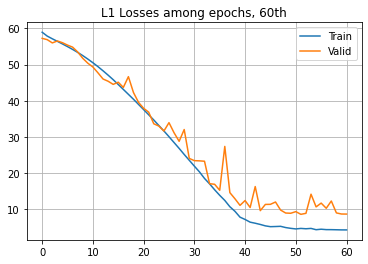

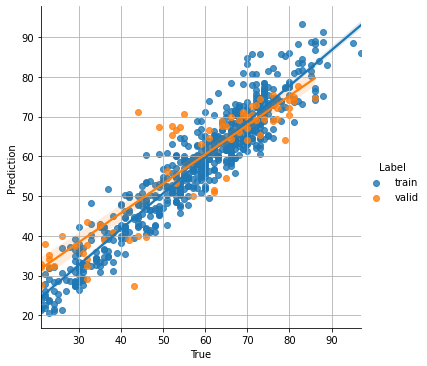

FOLD 0
EPOCHS 61
RMSE :: [TRAIN] 4.090 | [VALID] 8.524
CORR :: [TRAIN] 0.955 | [VALID] 0.900
FOLD 0
EPOCHS 62
RMSE :: [TRAIN] 4.279 | [VALID] 8.817
CORR :: [TRAIN] 0.952 | [VALID] 0.908
FOLD 0
EPOCHS 63
RMSE :: [TRAIN] 4.129 | [VALID] 9.232
CORR :: [TRAIN] 0.954 | [VALID] 0.900
FOLD 0
EPOCHS 64
RMSE :: [TRAIN] 3.956 | [VALID] 9.902
CORR :: [TRAIN] 0.957 | [VALID] 0.900
FOLD 0
EPOCHS 65
RMSE :: [TRAIN] 4.046 | [VALID] 9.949
CORR :: [TRAIN] 0.956 | [VALID] 0.892
FOLD 0
EPOCHS 66
RMSE :: [TRAIN] 3.984 | [VALID] 9.045
CORR :: [TRAIN] 0.958 | [VALID] 0.902
FOLD 0
EPOCHS 67
RMSE :: [TRAIN] 3.959 | [VALID] 9.540
CORR :: [TRAIN] 0.958 | [VALID] 0.895
FOLD 0
EPOCHS 68
RMSE :: [TRAIN] 3.988 | [VALID] 9.046
CORR :: [TRAIN] 0.958 | [VALID] 0.905
FOLD 0
EPOCHS 69
RMSE :: [TRAIN] 3.966 | [VALID] 9.280
CORR :: [TRAIN] 0.958 | [VALID] 0.904
FOLD 0
EPOCHS 70
RMSE :: [TRAIN] 3.824 | [VALID] 10.027
CORR :: [TRAIN] 0.961 | [VALID] 0.896


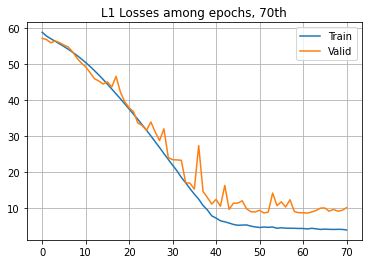

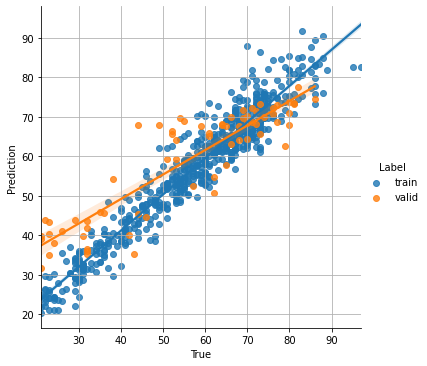

FOLD 0
EPOCHS 71
RMSE :: [TRAIN] 3.842 | [VALID] 9.513
CORR :: [TRAIN] 0.961 | [VALID] 0.889
FOLD 0
EPOCHS 72
RMSE :: [TRAIN] 3.689 | [VALID] 9.332
CORR :: [TRAIN] 0.964 | [VALID] 0.896
FOLD 0
EPOCHS 73
RMSE :: [TRAIN] 3.668 | [VALID] 9.820
CORR :: [TRAIN] 0.964 | [VALID] 0.891
FOLD 0
EPOCHS 74
RMSE :: [TRAIN] 3.608 | [VALID] 8.676
CORR :: [TRAIN] 0.965 | [VALID] 0.905
FOLD 0
EPOCHS 75
RMSE :: [TRAIN] 3.785 | [VALID] 8.812
CORR :: [TRAIN] 0.962 | [VALID] 0.891
FOLD 0
EPOCHS 76
RMSE :: [TRAIN] 3.679 | [VALID] 12.613
CORR :: [TRAIN] 0.965 | [VALID] 0.872
FOLD 0
EPOCHS 77
RMSE :: [TRAIN] 3.568 | [VALID] 9.335
CORR :: [TRAIN] 0.967 | [VALID] 0.904
FOLD 0
EPOCHS 78
RMSE :: [TRAIN] 3.682 | [VALID] 8.417
CORR :: [TRAIN] 0.965 | [VALID] 0.905
FOLD 0
EPOCHS 79
RMSE :: [TRAIN] 3.360 | [VALID] 8.712
CORR :: [TRAIN] 0.971 | [VALID] 0.894
FOLD 0
EPOCHS 80
RMSE :: [TRAIN] 3.266 | [VALID] 9.491
CORR :: [TRAIN] 0.972 | [VALID] 0.887


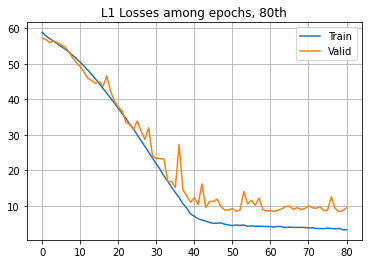

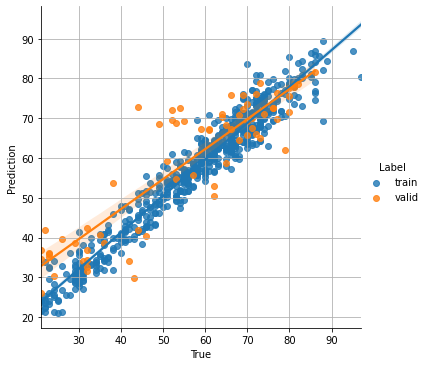

FOLD 0
EPOCHS 81
RMSE :: [TRAIN] 3.053 | [VALID] 9.696
CORR :: [TRAIN] 0.975 | [VALID] 0.891
FOLD 0
EPOCHS 82
RMSE :: [TRAIN] 3.135 | [VALID] 8.412
CORR :: [TRAIN] 0.975 | [VALID] 0.910
FOLD 0
EPOCHS 83
RMSE :: [TRAIN] 2.989 | [VALID] 8.370
CORR :: [TRAIN] 0.976 | [VALID] 0.905
FOLD 0
EPOCHS 84
RMSE :: [TRAIN] 2.925 | [VALID] 9.287
CORR :: [TRAIN] 0.978 | [VALID] 0.898
FOLD 0
EPOCHS 85
RMSE :: [TRAIN] 2.816 | [VALID] 9.245
CORR :: [TRAIN] 0.979 | [VALID] 0.880
FOLD 0
EPOCHS 86
RMSE :: [TRAIN] 2.891 | [VALID] 8.484
CORR :: [TRAIN] 0.978 | [VALID] 0.902
FOLD 0
EPOCHS 87
RMSE :: [TRAIN] 2.688 | [VALID] 8.467
CORR :: [TRAIN] 0.981 | [VALID] 0.904
FOLD 0
EPOCHS 88
RMSE :: [TRAIN] 2.599 | [VALID] 8.995
CORR :: [TRAIN] 0.983 | [VALID] 0.892
FOLD 0
EPOCHS 89
RMSE :: [TRAIN] 2.700 | [VALID] 11.315
CORR :: [TRAIN] 0.982 | [VALID] 0.871
FOLD 0
EPOCHS 90
RMSE :: [TRAIN] 2.508 | [VALID] 9.977
CORR :: [TRAIN] 0.984 | [VALID] 0.887


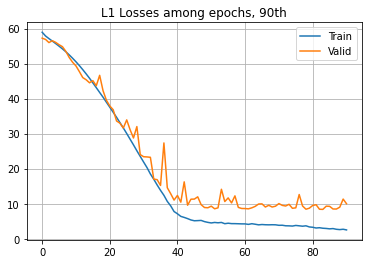

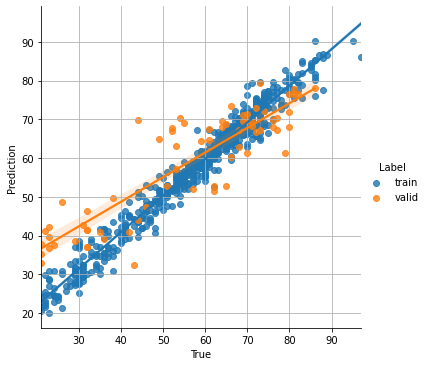

FOLD 0
EPOCHS 91
RMSE :: [TRAIN] 2.707 | [VALID] 8.887
CORR :: [TRAIN] 0.982 | [VALID] 0.911
FOLD 0
EPOCHS 92
RMSE :: [TRAIN] 2.578 | [VALID] 10.222
CORR :: [TRAIN] 0.983 | [VALID] 0.909
FOLD 0
EPOCHS 93
RMSE :: [TRAIN] 2.465 | [VALID] 9.528
CORR :: [TRAIN] 0.984 | [VALID] 0.897
FOLD 0
EPOCHS 94
RMSE :: [TRAIN] 2.642 | [VALID] 9.324
CORR :: [TRAIN] 0.983 | [VALID] 0.895
FOLD 0
EPOCHS 95
RMSE :: [TRAIN] 2.212 | [VALID] 9.583
CORR :: [TRAIN] 0.987 | [VALID] 0.897
FOLD 0
EPOCHS 96
RMSE :: [TRAIN] 2.162 | [VALID] 8.633
CORR :: [TRAIN] 0.987 | [VALID] 0.907
FOLD 0
EPOCHS 97
RMSE :: [TRAIN] 2.234 | [VALID] 9.685
CORR :: [TRAIN] 0.987 | [VALID] 0.903
FOLD 0
EPOCHS 98
RMSE :: [TRAIN] 2.194 | [VALID] 9.188
CORR :: [TRAIN] 0.988 | [VALID] 0.902
FOLD 0
EPOCHS 99
RMSE :: [TRAIN] 2.213 | [VALID] 9.246
CORR :: [TRAIN] 0.988 | [VALID] 0.903
FOLD 0
RMSE :: [TEST] 9.042
CORR :: [TEST] 0.831


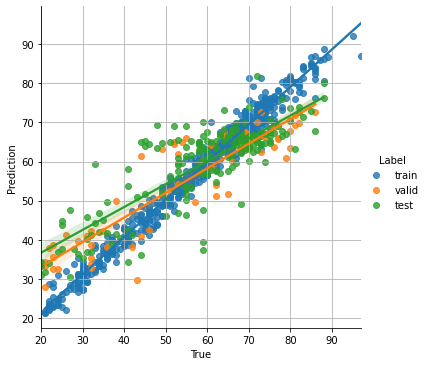

FOLD 1
EPOCHS 0
RMSE :: [TRAIN] 3.125 | [VALID] 3.666
CORR :: [TRAIN] 0.968 | [VALID] 0.975


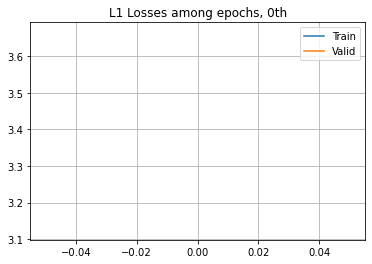

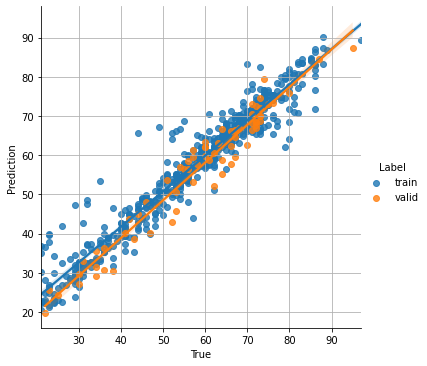

FOLD 1
EPOCHS 1
RMSE :: [TRAIN] 2.878 | [VALID] 4.312
CORR :: [TRAIN] 0.974 | [VALID] 0.973
FOLD 1
EPOCHS 2
RMSE :: [TRAIN] 2.790 | [VALID] 4.374
CORR :: [TRAIN] 0.977 | [VALID] 0.969
FOLD 1
EPOCHS 3
RMSE :: [TRAIN] 2.794 | [VALID] 4.479
CORR :: [TRAIN] 0.980 | [VALID] 0.964
FOLD 1
EPOCHS 4
RMSE :: [TRAIN] 2.575 | [VALID] 3.941
CORR :: [TRAIN] 0.983 | [VALID] 0.973
FOLD 1
EPOCHS 5
RMSE :: [TRAIN] 2.180 | [VALID] 3.700
CORR :: [TRAIN] 0.987 | [VALID] 0.972
FOLD 1
EPOCHS 6
RMSE :: [TRAIN] 2.293 | [VALID] 4.124
CORR :: [TRAIN] 0.987 | [VALID] 0.964
FOLD 1
EPOCHS 7
RMSE :: [TRAIN] 2.297 | [VALID] 3.846
CORR :: [TRAIN] 0.988 | [VALID] 0.971
FOLD 1
EPOCHS 8
RMSE :: [TRAIN] 2.217 | [VALID] 4.127
CORR :: [TRAIN] 0.989 | [VALID] 0.967
FOLD 1
EPOCHS 9
RMSE :: [TRAIN] 2.177 | [VALID] 5.900
CORR :: [TRAIN] 0.989 | [VALID] 0.944
FOLD 1
EPOCHS 10
RMSE :: [TRAIN] 2.206 | [VALID] 5.260
CORR :: [TRAIN] 0.988 | [VALID] 0.944


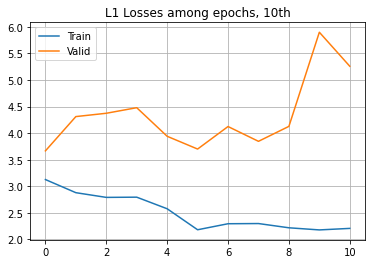

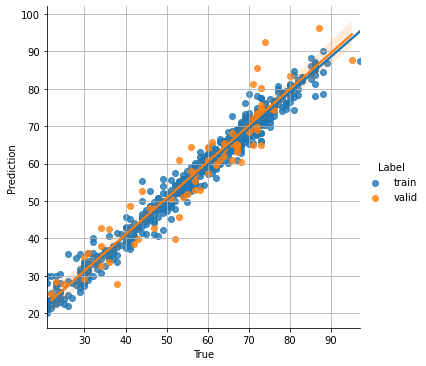

FOLD 1
EPOCHS 11
RMSE :: [TRAIN] 2.097 | [VALID] 4.123
CORR :: [TRAIN] 0.990 | [VALID] 0.972
FOLD 1
EPOCHS 12
RMSE :: [TRAIN] 2.319 | [VALID] 4.391
CORR :: [TRAIN] 0.988 | [VALID] 0.973
FOLD 1
EPOCHS 13
RMSE :: [TRAIN] 2.246 | [VALID] 4.534
CORR :: [TRAIN] 0.989 | [VALID] 0.969
FOLD 1
EPOCHS 14
RMSE :: [TRAIN] 2.298 | [VALID] 4.372
CORR :: [TRAIN] 0.988 | [VALID] 0.965
FOLD 1
EPOCHS 15
RMSE :: [TRAIN] 2.026 | [VALID] 5.244
CORR :: [TRAIN] 0.990 | [VALID] 0.967
FOLD 1
EPOCHS 16
RMSE :: [TRAIN] 2.009 | [VALID] 3.633
CORR :: [TRAIN] 0.991 | [VALID] 0.978
FOLD 1
EPOCHS 17
RMSE :: [TRAIN] 1.762 | [VALID] 5.388
CORR :: [TRAIN] 0.993 | [VALID] 0.970
FOLD 1
EPOCHS 18
RMSE :: [TRAIN] 1.800 | [VALID] 4.986
CORR :: [TRAIN] 0.992 | [VALID] 0.971
FOLD 1
EPOCHS 19
RMSE :: [TRAIN] 1.869 | [VALID] 4.640
CORR :: [TRAIN] 0.992 | [VALID] 0.966
FOLD 1
EPOCHS 20
RMSE :: [TRAIN] 1.722 | [VALID] 4.090
CORR :: [TRAIN] 0.993 | [VALID] 0.968


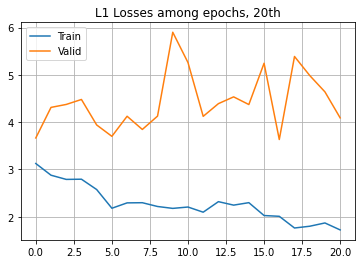

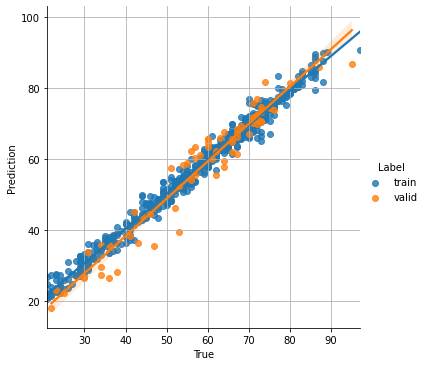

FOLD 1
EPOCHS 21
RMSE :: [TRAIN] 1.741 | [VALID] 4.214
CORR :: [TRAIN] 0.993 | [VALID] 0.968
FOLD 1
EPOCHS 22
RMSE :: [TRAIN] 1.831 | [VALID] 4.266
CORR :: [TRAIN] 0.992 | [VALID] 0.968
FOLD 1
EPOCHS 23
RMSE :: [TRAIN] 1.720 | [VALID] 6.033
CORR :: [TRAIN] 0.993 | [VALID] 0.957
FOLD 1
EPOCHS 24
RMSE :: [TRAIN] 1.826 | [VALID] 4.004
CORR :: [TRAIN] 0.992 | [VALID] 0.968
FOLD 1
EPOCHS 25
RMSE :: [TRAIN] 1.998 | [VALID] 5.939
CORR :: [TRAIN] 0.991 | [VALID] 0.952
FOLD 1
EPOCHS 26
RMSE :: [TRAIN] 1.978 | [VALID] 4.599
CORR :: [TRAIN] 0.991 | [VALID] 0.961
FOLD 1
EPOCHS 27
RMSE :: [TRAIN] 1.911 | [VALID] 4.167
CORR :: [TRAIN] 0.992 | [VALID] 0.967
FOLD 1
EPOCHS 28
RMSE :: [TRAIN] 1.791 | [VALID] 4.628
CORR :: [TRAIN] 0.993 | [VALID] 0.960
FOLD 1
EPOCHS 29
RMSE :: [TRAIN] 1.892 | [VALID] 5.976
CORR :: [TRAIN] 0.992 | [VALID] 0.950
FOLD 1
EPOCHS 30
RMSE :: [TRAIN] 2.025 | [VALID] 4.781
CORR :: [TRAIN] 0.991 | [VALID] 0.965


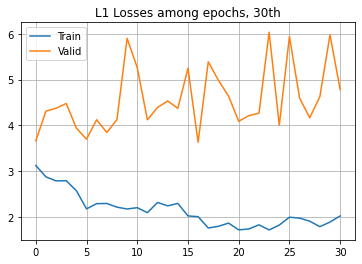

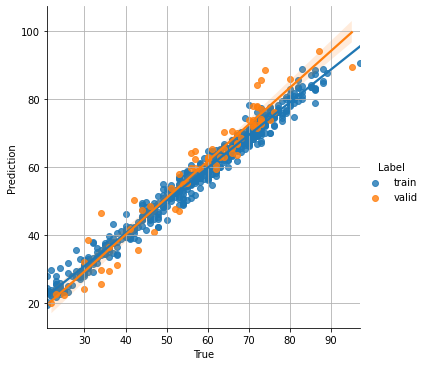

FOLD 1
EPOCHS 31
RMSE :: [TRAIN] 2.032 | [VALID] 5.235
CORR :: [TRAIN] 0.991 | [VALID] 0.958
FOLD 1
EPOCHS 32
RMSE :: [TRAIN] 1.810 | [VALID] 4.623
CORR :: [TRAIN] 0.993 | [VALID] 0.961
FOLD 1
EPOCHS 33
RMSE :: [TRAIN] 1.788 | [VALID] 5.298
CORR :: [TRAIN] 0.993 | [VALID] 0.963
FOLD 1
EPOCHS 34
RMSE :: [TRAIN] 1.672 | [VALID] 4.870
CORR :: [TRAIN] 0.994 | [VALID] 0.964
FOLD 1
EPOCHS 35
RMSE :: [TRAIN] 1.849 | [VALID] 5.696
CORR :: [TRAIN] 0.993 | [VALID] 0.953
FOLD 1
EPOCHS 36
RMSE :: [TRAIN] 2.015 | [VALID] 4.834
CORR :: [TRAIN] 0.991 | [VALID] 0.963
FOLD 1
EPOCHS 37
RMSE :: [TRAIN] 1.816 | [VALID] 5.330
CORR :: [TRAIN] 0.993 | [VALID] 0.956
FOLD 1
EPOCHS 38
RMSE :: [TRAIN] 1.711 | [VALID] 5.110
CORR :: [TRAIN] 0.993 | [VALID] 0.955
FOLD 1
EPOCHS 39
RMSE :: [TRAIN] 1.713 | [VALID] 4.200
CORR :: [TRAIN] 0.993 | [VALID] 0.961
FOLD 1
EPOCHS 40
RMSE :: [TRAIN] 1.803 | [VALID] 3.820
CORR :: [TRAIN] 0.993 | [VALID] 0.968


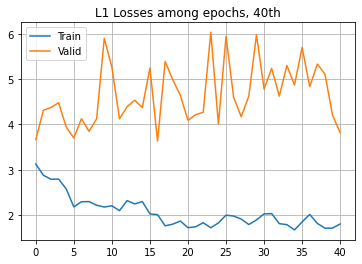

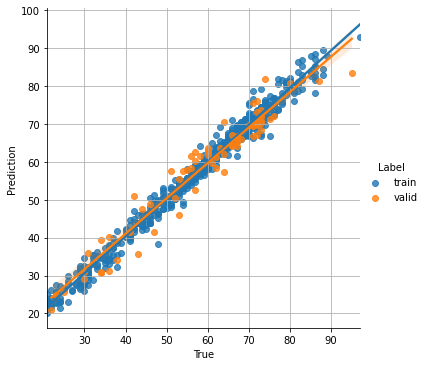

FOLD 1
EPOCHS 41
RMSE :: [TRAIN] 1.836 | [VALID] 4.275
CORR :: [TRAIN] 0.993 | [VALID] 0.966
FOLD 1
EPOCHS 42
RMSE :: [TRAIN] 1.756 | [VALID] 4.556
CORR :: [TRAIN] 0.993 | [VALID] 0.968
FOLD 1
EPOCHS 43
RMSE :: [TRAIN] 2.112 | [VALID] 4.555
CORR :: [TRAIN] 0.991 | [VALID] 0.966
FOLD 1
EPOCHS 44
RMSE :: [TRAIN] 2.047 | [VALID] 10.009
CORR :: [TRAIN] 0.991 | [VALID] 0.937
FOLD 1
EPOCHS 45
RMSE :: [TRAIN] 1.988 | [VALID] 6.931
CORR :: [TRAIN] 0.991 | [VALID] 0.961
FOLD 1
EPOCHS 46
RMSE :: [TRAIN] 1.846 | [VALID] 5.504
CORR :: [TRAIN] 0.993 | [VALID] 0.958
FOLD 1
EPOCHS 47
RMSE :: [TRAIN] 1.629 | [VALID] 5.187
CORR :: [TRAIN] 0.994 | [VALID] 0.958
FOLD 1
EPOCHS 48
RMSE :: [TRAIN] 1.762 | [VALID] 4.263
CORR :: [TRAIN] 0.993 | [VALID] 0.969
FOLD 1
EPOCHS 49
RMSE :: [TRAIN] 1.531 | [VALID] 4.688
CORR :: [TRAIN] 0.995 | [VALID] 0.962
FOLD 1
EPOCHS 50
RMSE :: [TRAIN] 1.586 | [VALID] 6.654
CORR :: [TRAIN] 0.995 | [VALID] 0.957


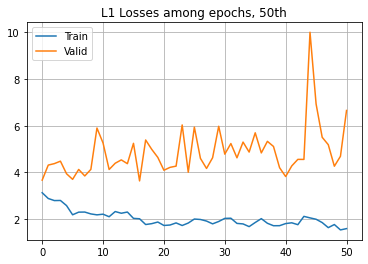

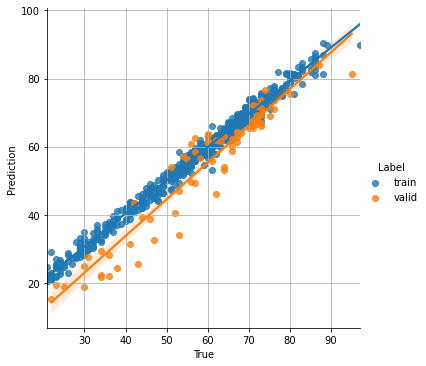

FOLD 1
EPOCHS 51
RMSE :: [TRAIN] 1.536 | [VALID] 5.920
CORR :: [TRAIN] 0.995 | [VALID] 0.959
FOLD 1
EPOCHS 52
RMSE :: [TRAIN] 1.476 | [VALID] 4.450
CORR :: [TRAIN] 0.995 | [VALID] 0.961
FOLD 1
EPOCHS 53
RMSE :: [TRAIN] 1.626 | [VALID] 4.319
CORR :: [TRAIN] 0.995 | [VALID] 0.961
FOLD 1
EPOCHS 54
RMSE :: [TRAIN] 1.593 | [VALID] 4.881
CORR :: [TRAIN] 0.995 | [VALID] 0.968
FOLD 1
EPOCHS 55
RMSE :: [TRAIN] 1.555 | [VALID] 6.023
CORR :: [TRAIN] 0.995 | [VALID] 0.955
FOLD 1
EPOCHS 56
RMSE :: [TRAIN] 1.442 | [VALID] 4.740
CORR :: [TRAIN] 0.996 | [VALID] 0.959
FOLD 1
EPOCHS 57
RMSE :: [TRAIN] 1.620 | [VALID] 4.817
CORR :: [TRAIN] 0.994 | [VALID] 0.956
FOLD 1
EPOCHS 58
RMSE :: [TRAIN] 1.582 | [VALID] 5.144
CORR :: [TRAIN] 0.995 | [VALID] 0.956
FOLD 1
EPOCHS 59
RMSE :: [TRAIN] 1.521 | [VALID] 4.483
CORR :: [TRAIN] 0.995 | [VALID] 0.959
FOLD 1
EPOCHS 60
RMSE :: [TRAIN] 1.552 | [VALID] 7.070
CORR :: [TRAIN] 0.995 | [VALID] 0.945


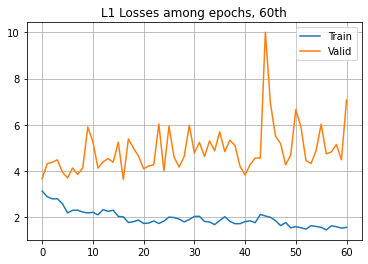

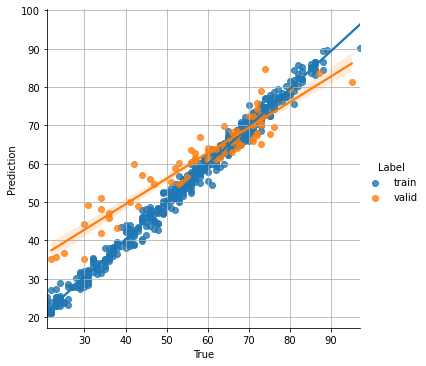

FOLD 1
EPOCHS 61
RMSE :: [TRAIN] 1.495 | [VALID] 4.417
CORR :: [TRAIN] 0.995 | [VALID] 0.960
FOLD 1
EPOCHS 62
RMSE :: [TRAIN] 1.424 | [VALID] 4.732
CORR :: [TRAIN] 0.996 | [VALID] 0.958
FOLD 1
EPOCHS 63
RMSE :: [TRAIN] 1.493 | [VALID] 4.335
CORR :: [TRAIN] 0.995 | [VALID] 0.960
FOLD 1
EPOCHS 64
RMSE :: [TRAIN] 1.304 | [VALID] 4.292
CORR :: [TRAIN] 0.996 | [VALID] 0.961
FOLD 1
EPOCHS 65
RMSE :: [TRAIN] 1.347 | [VALID] 4.375
CORR :: [TRAIN] 0.996 | [VALID] 0.969
FOLD 1
EPOCHS 66
RMSE :: [TRAIN] 1.378 | [VALID] 4.079
CORR :: [TRAIN] 0.996 | [VALID] 0.968
FOLD 1
EPOCHS 67
RMSE :: [TRAIN] 1.411 | [VALID] 4.847
CORR :: [TRAIN] 0.996 | [VALID] 0.963
FOLD 1
EPOCHS 68
RMSE :: [TRAIN] 1.356 | [VALID] 4.867
CORR :: [TRAIN] 0.996 | [VALID] 0.962
FOLD 1
EPOCHS 69
RMSE :: [TRAIN] 1.282 | [VALID] 6.791
CORR :: [TRAIN] 0.997 | [VALID] 0.938
FOLD 1
EPOCHS 70
RMSE :: [TRAIN] 1.340 | [VALID] 5.044
CORR :: [TRAIN] 0.996 | [VALID] 0.954


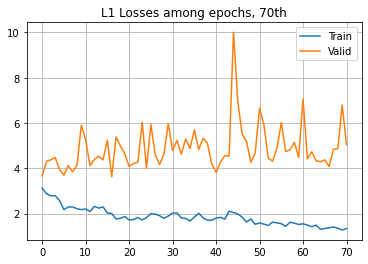

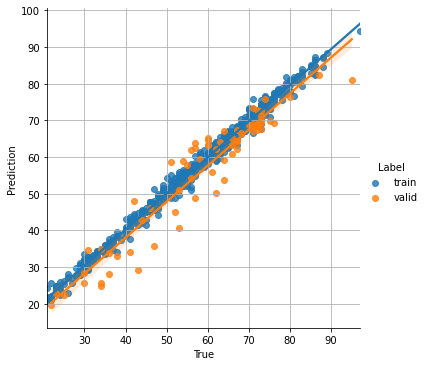

FOLD 1
EPOCHS 71
RMSE :: [TRAIN] 1.487 | [VALID] 5.106
CORR :: [TRAIN] 0.995 | [VALID] 0.951
FOLD 1
EPOCHS 72
RMSE :: [TRAIN] 1.395 | [VALID] 4.903
CORR :: [TRAIN] 0.996 | [VALID] 0.950
FOLD 1
EPOCHS 73
RMSE :: [TRAIN] 1.232 | [VALID] 4.613
CORR :: [TRAIN] 0.997 | [VALID] 0.957
FOLD 1
EPOCHS 74
RMSE :: [TRAIN] 1.561 | [VALID] 5.526
CORR :: [TRAIN] 0.995 | [VALID] 0.957
FOLD 1
EPOCHS 75
RMSE :: [TRAIN] 1.539 | [VALID] 8.910
CORR :: [TRAIN] 0.995 | [VALID] 0.936
FOLD 1
EPOCHS 76
RMSE :: [TRAIN] 1.385 | [VALID] 10.065
CORR :: [TRAIN] 0.996 | [VALID] 0.918
FOLD 1
EPOCHS 77
RMSE :: [TRAIN] 1.648 | [VALID] 6.117
CORR :: [TRAIN] 0.994 | [VALID] 0.951
FOLD 1
EPOCHS 78
RMSE :: [TRAIN] 1.328 | [VALID] 4.516
CORR :: [TRAIN] 0.996 | [VALID] 0.962
FOLD 1
EPOCHS 79
RMSE :: [TRAIN] 1.411 | [VALID] 4.325
CORR :: [TRAIN] 0.996 | [VALID] 0.962
FOLD 1
EPOCHS 80
RMSE :: [TRAIN] 1.349 | [VALID] 4.608
CORR :: [TRAIN] 0.996 | [VALID] 0.954


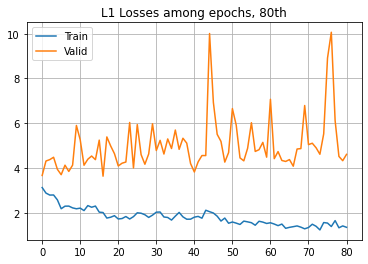

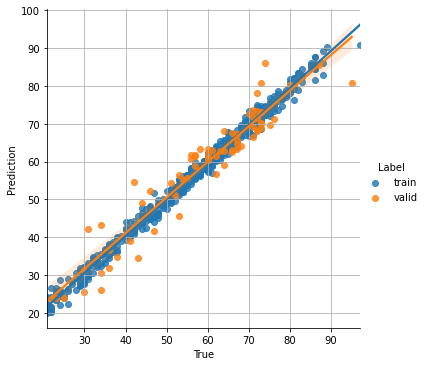

FOLD 1
EPOCHS 81
RMSE :: [TRAIN] 1.142 | [VALID] 5.205
CORR :: [TRAIN] 0.997 | [VALID] 0.955
FOLD 1
EPOCHS 82
RMSE :: [TRAIN] 1.452 | [VALID] 5.151
CORR :: [TRAIN] 0.996 | [VALID] 0.952
FOLD 1
EPOCHS 83
RMSE :: [TRAIN] 1.380 | [VALID] 4.178
CORR :: [TRAIN] 0.996 | [VALID] 0.964
FOLD 1
EPOCHS 84
RMSE :: [TRAIN] 1.473 | [VALID] 4.337
CORR :: [TRAIN] 0.995 | [VALID] 0.965
FOLD 1
EPOCHS 85
RMSE :: [TRAIN] 1.528 | [VALID] 4.533
CORR :: [TRAIN] 0.995 | [VALID] 0.961
FOLD 1
EPOCHS 86
RMSE :: [TRAIN] 1.666 | [VALID] 5.206
CORR :: [TRAIN] 0.994 | [VALID] 0.954
FOLD 1
EPOCHS 87
RMSE :: [TRAIN] 1.627 | [VALID] 4.610
CORR :: [TRAIN] 0.995 | [VALID] 0.958
FOLD 1
EPOCHS 88
RMSE :: [TRAIN] 1.369 | [VALID] 6.250
CORR :: [TRAIN] 0.996 | [VALID] 0.945
FOLD 1
EPOCHS 89
RMSE :: [TRAIN] 1.575 | [VALID] 4.305
CORR :: [TRAIN] 0.995 | [VALID] 0.966
FOLD 1
EPOCHS 90
RMSE :: [TRAIN] 1.247 | [VALID] 4.939
CORR :: [TRAIN] 0.997 | [VALID] 0.961


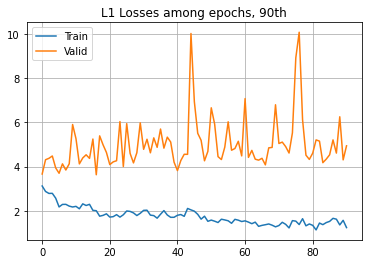

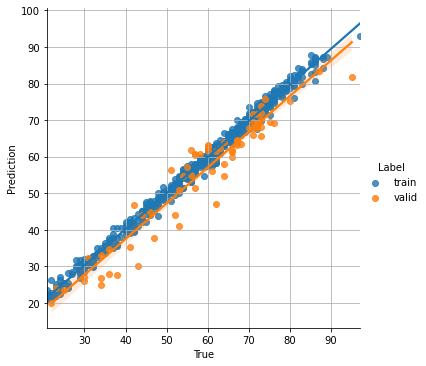

FOLD 1
EPOCHS 91
RMSE :: [TRAIN] 1.313 | [VALID] 4.302
CORR :: [TRAIN] 0.997 | [VALID] 0.961
FOLD 1
EPOCHS 92
RMSE :: [TRAIN] 1.354 | [VALID] 4.502
CORR :: [TRAIN] 0.996 | [VALID] 0.957
FOLD 1
EPOCHS 93
RMSE :: [TRAIN] 1.410 | [VALID] 6.080
CORR :: [TRAIN] 0.996 | [VALID] 0.949
FOLD 1
EPOCHS 94
RMSE :: [TRAIN] 1.089 | [VALID] 6.363
CORR :: [TRAIN] 0.998 | [VALID] 0.949
FOLD 1
EPOCHS 95
RMSE :: [TRAIN] 1.264 | [VALID] 5.201
CORR :: [TRAIN] 0.997 | [VALID] 0.955
FOLD 1
EPOCHS 96
RMSE :: [TRAIN] 1.186 | [VALID] 4.755
CORR :: [TRAIN] 0.997 | [VALID] 0.956
FOLD 1
EPOCHS 97
RMSE :: [TRAIN] 1.151 | [VALID] 6.530
CORR :: [TRAIN] 0.997 | [VALID] 0.944
FOLD 1
EPOCHS 98
RMSE :: [TRAIN] 1.313 | [VALID] 6.366
CORR :: [TRAIN] 0.997 | [VALID] 0.945
FOLD 1
EPOCHS 99
RMSE :: [TRAIN] 1.190 | [VALID] 4.524
CORR :: [TRAIN] 0.997 | [VALID] 0.960
FOLD 1
RMSE :: [TEST] 8.539
CORR :: [TEST] 0.841


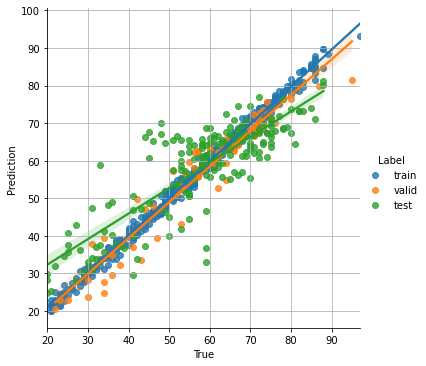

FOLD 2
EPOCHS 0
RMSE :: [TRAIN] 1.847 | [VALID] 3.591
CORR :: [TRAIN] 0.989 | [VALID] 0.983


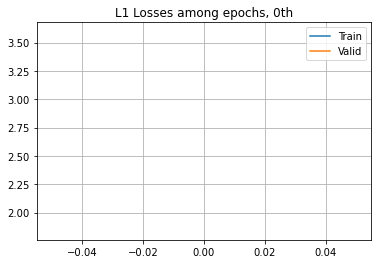

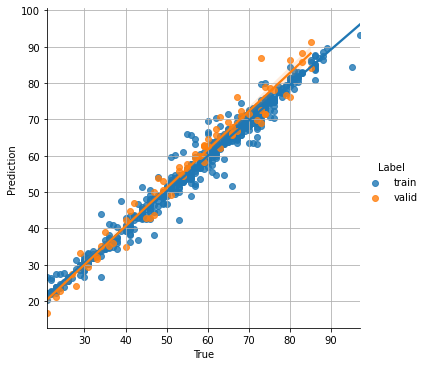

FOLD 2
EPOCHS 1
RMSE :: [TRAIN] 1.735 | [VALID] 4.615
CORR :: [TRAIN] 0.992 | [VALID] 0.978
FOLD 2
EPOCHS 2
RMSE :: [TRAIN] 1.652 | [VALID] 6.083
CORR :: [TRAIN] 0.993 | [VALID] 0.966
FOLD 2
EPOCHS 3
RMSE :: [TRAIN] 1.549 | [VALID] 6.403
CORR :: [TRAIN] 0.993 | [VALID] 0.965
FOLD 2
EPOCHS 4
RMSE :: [TRAIN] 1.660 | [VALID] 6.309
CORR :: [TRAIN] 0.993 | [VALID] 0.958
FOLD 2
EPOCHS 5
RMSE :: [TRAIN] 1.462 | [VALID] 4.958
CORR :: [TRAIN] 0.995 | [VALID] 0.967
FOLD 2
EPOCHS 6
RMSE :: [TRAIN] 1.465 | [VALID] 6.260
CORR :: [TRAIN] 0.995 | [VALID] 0.968
FOLD 2
EPOCHS 7
RMSE :: [TRAIN] 1.390 | [VALID] 5.238
CORR :: [TRAIN] 0.995 | [VALID] 0.975
FOLD 2
EPOCHS 8
RMSE :: [TRAIN] 1.311 | [VALID] 4.342
CORR :: [TRAIN] 0.996 | [VALID] 0.973
FOLD 2
EPOCHS 9
RMSE :: [TRAIN] 1.286 | [VALID] 4.521
CORR :: [TRAIN] 0.996 | [VALID] 0.969
FOLD 2
EPOCHS 10
RMSE :: [TRAIN] 1.367 | [VALID] 5.996
CORR :: [TRAIN] 0.996 | [VALID] 0.969


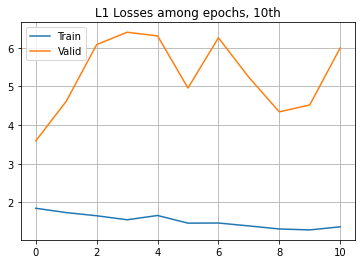

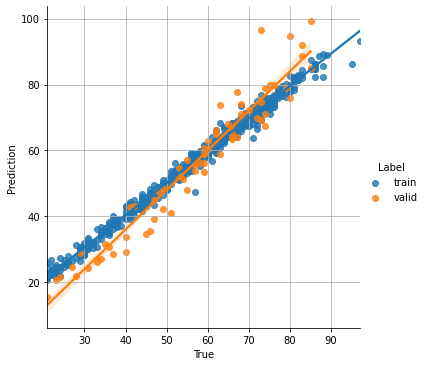

FOLD 2
EPOCHS 11
RMSE :: [TRAIN] 1.368 | [VALID] 5.216
CORR :: [TRAIN] 0.996 | [VALID] 0.976
FOLD 2
EPOCHS 12
RMSE :: [TRAIN] 1.307 | [VALID] 4.344
CORR :: [TRAIN] 0.996 | [VALID] 0.969
FOLD 2
EPOCHS 13
RMSE :: [TRAIN] 1.225 | [VALID] 3.794
CORR :: [TRAIN] 0.996 | [VALID] 0.978
FOLD 2
EPOCHS 14
RMSE :: [TRAIN] 1.318 | [VALID] 5.277
CORR :: [TRAIN] 0.996 | [VALID] 0.970
FOLD 2
EPOCHS 15
RMSE :: [TRAIN] 1.355 | [VALID] 4.853
CORR :: [TRAIN] 0.996 | [VALID] 0.972
FOLD 2
EPOCHS 16
RMSE :: [TRAIN] 1.399 | [VALID] 5.375
CORR :: [TRAIN] 0.996 | [VALID] 0.967
FOLD 2
EPOCHS 17
RMSE :: [TRAIN] 1.315 | [VALID] 6.398
CORR :: [TRAIN] 0.996 | [VALID] 0.962
FOLD 2
EPOCHS 18
RMSE :: [TRAIN] 1.496 | [VALID] 5.219
CORR :: [TRAIN] 0.995 | [VALID] 0.977
FOLD 2
EPOCHS 19
RMSE :: [TRAIN] 1.427 | [VALID] 4.215
CORR :: [TRAIN] 0.996 | [VALID] 0.979
FOLD 2
EPOCHS 20
RMSE :: [TRAIN] 1.397 | [VALID] 4.290
CORR :: [TRAIN] 0.996 | [VALID] 0.980


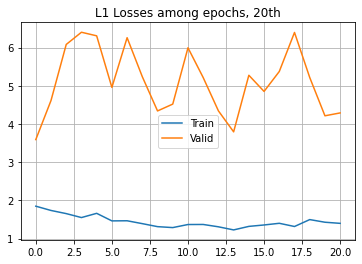

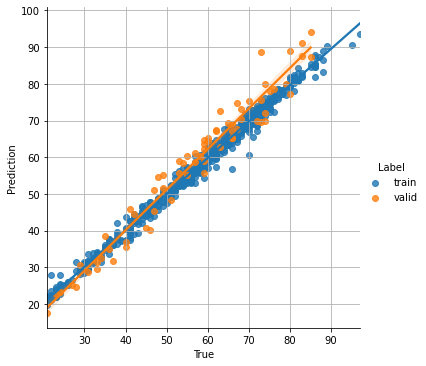

FOLD 2
EPOCHS 21
RMSE :: [TRAIN] 1.200 | [VALID] 4.891
CORR :: [TRAIN] 0.997 | [VALID] 0.977
FOLD 2
EPOCHS 22
RMSE :: [TRAIN] 1.149 | [VALID] 5.572
CORR :: [TRAIN] 0.997 | [VALID] 0.975
FOLD 2
EPOCHS 23
RMSE :: [TRAIN] 1.318 | [VALID] 5.320
CORR :: [TRAIN] 0.996 | [VALID] 0.975
FOLD 2
EPOCHS 24
RMSE :: [TRAIN] 1.155 | [VALID] 5.285
CORR :: [TRAIN] 0.997 | [VALID] 0.970
FOLD 2
EPOCHS 25
RMSE :: [TRAIN] 1.247 | [VALID] 4.628
CORR :: [TRAIN] 0.997 | [VALID] 0.975
FOLD 2
EPOCHS 26
RMSE :: [TRAIN] 1.217 | [VALID] 4.878
CORR :: [TRAIN] 0.997 | [VALID] 0.974
FOLD 2
EPOCHS 27
RMSE :: [TRAIN] 1.111 | [VALID] 4.120
CORR :: [TRAIN] 0.997 | [VALID] 0.974
FOLD 2
EPOCHS 28
RMSE :: [TRAIN] 1.204 | [VALID] 4.871
CORR :: [TRAIN] 0.997 | [VALID] 0.970
FOLD 2
EPOCHS 29
RMSE :: [TRAIN] 1.136 | [VALID] 5.880
CORR :: [TRAIN] 0.997 | [VALID] 0.950
FOLD 2
EPOCHS 30
RMSE :: [TRAIN] 1.357 | [VALID] 5.043
CORR :: [TRAIN] 0.996 | [VALID] 0.963


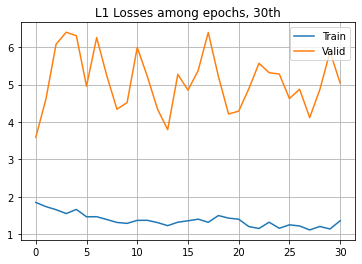

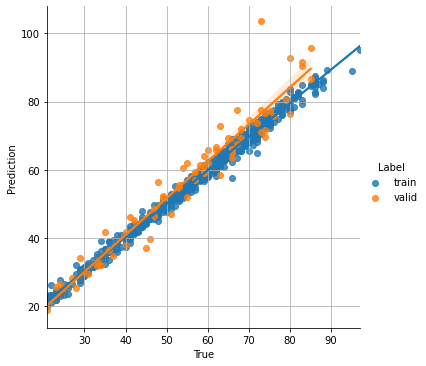

FOLD 2
EPOCHS 31
RMSE :: [TRAIN] 1.213 | [VALID] 5.431
CORR :: [TRAIN] 0.997 | [VALID] 0.963
FOLD 2
EPOCHS 32
RMSE :: [TRAIN] 1.194 | [VALID] 5.787
CORR :: [TRAIN] 0.997 | [VALID] 0.965
FOLD 2
EPOCHS 33
RMSE :: [TRAIN] 1.403 | [VALID] 5.384
CORR :: [TRAIN] 0.996 | [VALID] 0.971
FOLD 2
EPOCHS 34
RMSE :: [TRAIN] 1.320 | [VALID] 6.485
CORR :: [TRAIN] 0.996 | [VALID] 0.965
FOLD 2
EPOCHS 35
RMSE :: [TRAIN] 1.227 | [VALID] 5.518
CORR :: [TRAIN] 0.997 | [VALID] 0.973
FOLD 2
EPOCHS 36
RMSE :: [TRAIN] 1.347 | [VALID] 4.248
CORR :: [TRAIN] 0.996 | [VALID] 0.977
FOLD 2
EPOCHS 37
RMSE :: [TRAIN] 1.400 | [VALID] 4.019
CORR :: [TRAIN] 0.996 | [VALID] 0.975
FOLD 2
EPOCHS 38
RMSE :: [TRAIN] 1.390 | [VALID] 3.540
CORR :: [TRAIN] 0.996 | [VALID] 0.975
FOLD 2
EPOCHS 39
RMSE :: [TRAIN] 1.412 | [VALID] 4.978
CORR :: [TRAIN] 0.996 | [VALID] 0.960
FOLD 2
EPOCHS 40
RMSE :: [TRAIN] 1.217 | [VALID] 4.255
CORR :: [TRAIN] 0.997 | [VALID] 0.966


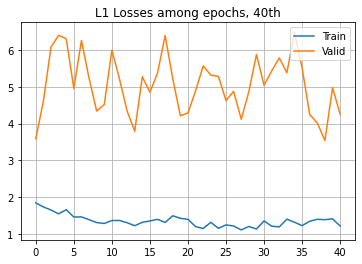

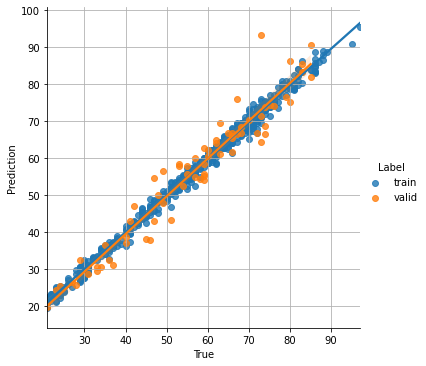

FOLD 2
EPOCHS 41
RMSE :: [TRAIN] 1.151 | [VALID] 3.942
CORR :: [TRAIN] 0.997 | [VALID] 0.968
FOLD 2
EPOCHS 42
RMSE :: [TRAIN] 1.305 | [VALID] 3.822
CORR :: [TRAIN] 0.996 | [VALID] 0.971
FOLD 2
EPOCHS 43
RMSE :: [TRAIN] 1.352 | [VALID] 4.068
CORR :: [TRAIN] 0.996 | [VALID] 0.971
FOLD 2
EPOCHS 44
RMSE :: [TRAIN] 1.348 | [VALID] 3.985
CORR :: [TRAIN] 0.996 | [VALID] 0.974
FOLD 2
EPOCHS 45
RMSE :: [TRAIN] 1.385 | [VALID] 4.162
CORR :: [TRAIN] 0.996 | [VALID] 0.972
FOLD 2
EPOCHS 46
RMSE :: [TRAIN] 1.328 | [VALID] 5.923
CORR :: [TRAIN] 0.996 | [VALID] 0.961
FOLD 2
EPOCHS 47
RMSE :: [TRAIN] 1.199 | [VALID] 6.498
CORR :: [TRAIN] 0.997 | [VALID] 0.954
FOLD 2
EPOCHS 48
RMSE :: [TRAIN] 1.246 | [VALID] 4.047
CORR :: [TRAIN] 0.997 | [VALID] 0.967
FOLD 2
EPOCHS 49
RMSE :: [TRAIN] 1.304 | [VALID] 4.073
CORR :: [TRAIN] 0.996 | [VALID] 0.967
FOLD 2
EPOCHS 50
RMSE :: [TRAIN] 1.294 | [VALID] 4.106
CORR :: [TRAIN] 0.996 | [VALID] 0.967


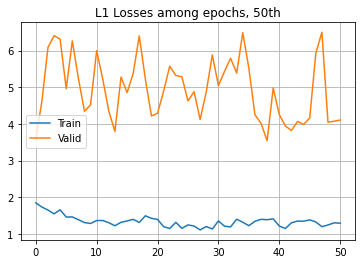

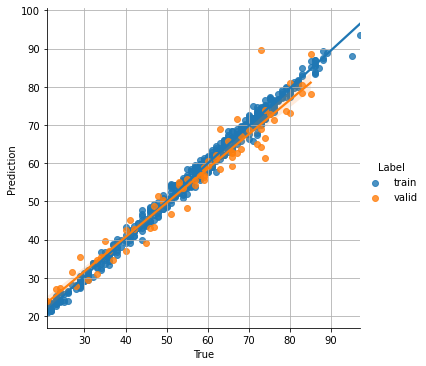

FOLD 2
EPOCHS 51
RMSE :: [TRAIN] 1.308 | [VALID] 3.500
CORR :: [TRAIN] 0.996 | [VALID] 0.977
FOLD 2
EPOCHS 52
RMSE :: [TRAIN] 1.076 | [VALID] 4.118
CORR :: [TRAIN] 0.997 | [VALID] 0.971
FOLD 2
EPOCHS 53
RMSE :: [TRAIN] 1.226 | [VALID] 4.203
CORR :: [TRAIN] 0.997 | [VALID] 0.971
FOLD 2
EPOCHS 54
RMSE :: [TRAIN] 1.136 | [VALID] 4.610
CORR :: [TRAIN] 0.997 | [VALID] 0.970
FOLD 2
EPOCHS 55
RMSE :: [TRAIN] 1.011 | [VALID] 5.861
CORR :: [TRAIN] 0.998 | [VALID] 0.965
FOLD 2
EPOCHS 56
RMSE :: [TRAIN] 1.082 | [VALID] 4.061
CORR :: [TRAIN] 0.997 | [VALID] 0.969
FOLD 2
EPOCHS 57
RMSE :: [TRAIN] 1.098 | [VALID] 4.283
CORR :: [TRAIN] 0.997 | [VALID] 0.967
FOLD 2
EPOCHS 58
RMSE :: [TRAIN] 1.124 | [VALID] 4.766
CORR :: [TRAIN] 0.997 | [VALID] 0.965
FOLD 2
EPOCHS 59
RMSE :: [TRAIN] 1.169 | [VALID] 4.270
CORR :: [TRAIN] 0.997 | [VALID] 0.973
FOLD 2
EPOCHS 60
RMSE :: [TRAIN] 1.130 | [VALID] 3.941
CORR :: [TRAIN] 0.997 | [VALID] 0.975


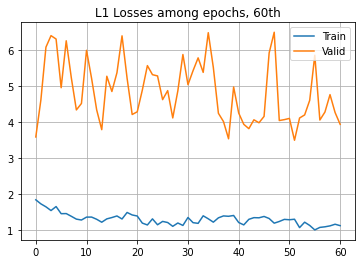

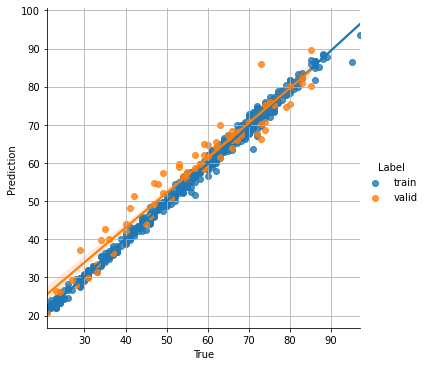

FOLD 2
EPOCHS 61
RMSE :: [TRAIN] 1.144 | [VALID] 3.800
CORR :: [TRAIN] 0.997 | [VALID] 0.976
FOLD 2
EPOCHS 62
RMSE :: [TRAIN] 1.085 | [VALID] 3.807
CORR :: [TRAIN] 0.997 | [VALID] 0.975
FOLD 2
EPOCHS 63
RMSE :: [TRAIN] 1.180 | [VALID] 4.104
CORR :: [TRAIN] 0.997 | [VALID] 0.974
FOLD 2
EPOCHS 64
RMSE :: [TRAIN] 1.345 | [VALID] 4.129
CORR :: [TRAIN] 0.996 | [VALID] 0.974
FOLD 2
EPOCHS 65
RMSE :: [TRAIN] 1.433 | [VALID] 3.911
CORR :: [TRAIN] 0.996 | [VALID] 0.972
FOLD 2
EPOCHS 66
RMSE :: [TRAIN] 1.242 | [VALID] 3.533
CORR :: [TRAIN] 0.997 | [VALID] 0.975
FOLD 2
EPOCHS 67
RMSE :: [TRAIN] 1.254 | [VALID] 4.594
CORR :: [TRAIN] 0.997 | [VALID] 0.973
FOLD 2
EPOCHS 68
RMSE :: [TRAIN] 1.209 | [VALID] 4.054
CORR :: [TRAIN] 0.997 | [VALID] 0.972
FOLD 2
EPOCHS 69
RMSE :: [TRAIN] 1.178 | [VALID] 4.837
CORR :: [TRAIN] 0.997 | [VALID] 0.969
FOLD 2
EPOCHS 70
RMSE :: [TRAIN] 1.097 | [VALID] 5.013
CORR :: [TRAIN] 0.997 | [VALID] 0.967


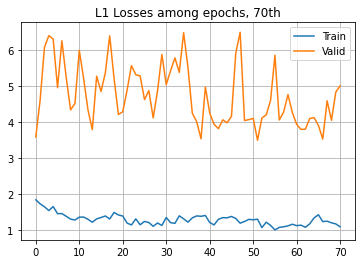

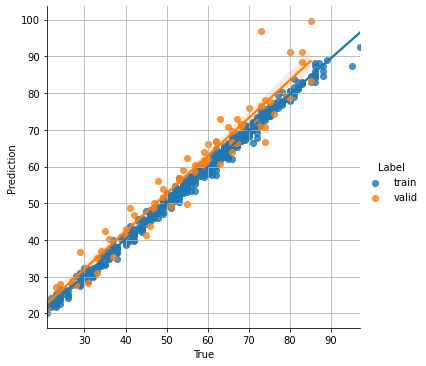

FOLD 2
EPOCHS 71
RMSE :: [TRAIN] 1.114 | [VALID] 3.976
CORR :: [TRAIN] 0.997 | [VALID] 0.975
FOLD 2
EPOCHS 72
RMSE :: [TRAIN] 1.154 | [VALID] 4.690
CORR :: [TRAIN] 0.997 | [VALID] 0.972
FOLD 2
EPOCHS 73
RMSE :: [TRAIN] 1.181 | [VALID] 3.900
CORR :: [TRAIN] 0.997 | [VALID] 0.977
FOLD 2
EPOCHS 74
RMSE :: [TRAIN] 1.101 | [VALID] 4.765
CORR :: [TRAIN] 0.997 | [VALID] 0.973
FOLD 2
EPOCHS 75
RMSE :: [TRAIN] 1.098 | [VALID] 4.498
CORR :: [TRAIN] 0.997 | [VALID] 0.971
FOLD 2
EPOCHS 76
RMSE :: [TRAIN] 1.032 | [VALID] 3.730
CORR :: [TRAIN] 0.998 | [VALID] 0.979
FOLD 2
EPOCHS 77
RMSE :: [TRAIN] 0.977 | [VALID] 3.810
CORR :: [TRAIN] 0.998 | [VALID] 0.978
FOLD 2
EPOCHS 78
RMSE :: [TRAIN] 1.036 | [VALID] 3.775
CORR :: [TRAIN] 0.998 | [VALID] 0.974
FOLD 2
EPOCHS 79
RMSE :: [TRAIN] 0.965 | [VALID] 5.016
CORR :: [TRAIN] 0.998 | [VALID] 0.969
FOLD 2
EPOCHS 80
RMSE :: [TRAIN] 1.057 | [VALID] 3.927
CORR :: [TRAIN] 0.997 | [VALID] 0.973


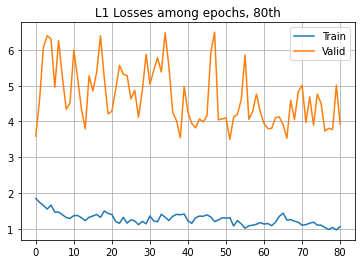

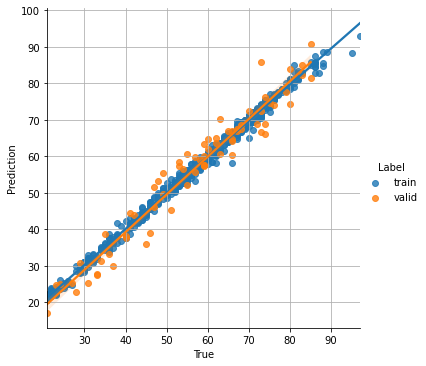

FOLD 2
EPOCHS 81
RMSE :: [TRAIN] 1.066 | [VALID] 4.205
CORR :: [TRAIN] 0.998 | [VALID] 0.972
FOLD 2
EPOCHS 82
RMSE :: [TRAIN] 0.970 | [VALID] 4.913
CORR :: [TRAIN] 0.998 | [VALID] 0.968
FOLD 2
EPOCHS 83
RMSE :: [TRAIN] 1.017 | [VALID] 4.431
CORR :: [TRAIN] 0.998 | [VALID] 0.974
FOLD 2
EPOCHS 84
RMSE :: [TRAIN] 1.065 | [VALID] 4.360
CORR :: [TRAIN] 0.998 | [VALID] 0.975
FOLD 2
EPOCHS 85
RMSE :: [TRAIN] 1.100 | [VALID] 4.335
CORR :: [TRAIN] 0.997 | [VALID] 0.977
FOLD 2
EPOCHS 86
RMSE :: [TRAIN] 1.029 | [VALID] 3.841
CORR :: [TRAIN] 0.998 | [VALID] 0.978
FOLD 2
EPOCHS 87
RMSE :: [TRAIN] 1.153 | [VALID] 3.538
CORR :: [TRAIN] 0.997 | [VALID] 0.976
FOLD 2
EPOCHS 88
RMSE :: [TRAIN] 1.133 | [VALID] 3.819
CORR :: [TRAIN] 0.997 | [VALID] 0.971
FOLD 2
EPOCHS 89
RMSE :: [TRAIN] 1.058 | [VALID] 4.216
CORR :: [TRAIN] 0.998 | [VALID] 0.965
FOLD 2
EPOCHS 90
RMSE :: [TRAIN] 1.149 | [VALID] 5.102
CORR :: [TRAIN] 0.997 | [VALID] 0.963


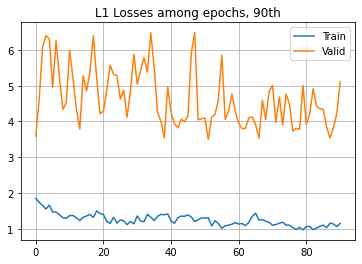

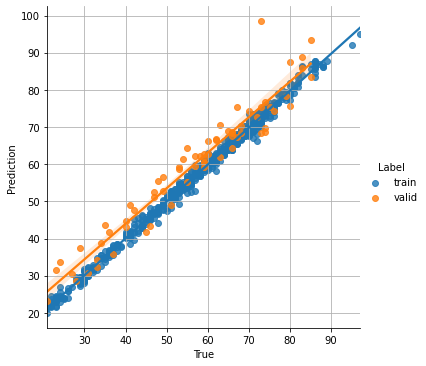

FOLD 2
EPOCHS 91
RMSE :: [TRAIN] 1.130 | [VALID] 4.506
CORR :: [TRAIN] 0.997 | [VALID] 0.969
FOLD 2
EPOCHS 92
RMSE :: [TRAIN] 1.065 | [VALID] 4.163
CORR :: [TRAIN] 0.998 | [VALID] 0.977
FOLD 2
EPOCHS 93
RMSE :: [TRAIN] 1.096 | [VALID] 4.207
CORR :: [TRAIN] 0.997 | [VALID] 0.971
FOLD 2
EPOCHS 94
RMSE :: [TRAIN] 0.986 | [VALID] 4.282
CORR :: [TRAIN] 0.998 | [VALID] 0.971
FOLD 2
EPOCHS 95
RMSE :: [TRAIN] 1.045 | [VALID] 3.935
CORR :: [TRAIN] 0.998 | [VALID] 0.969
FOLD 2
EPOCHS 96
RMSE :: [TRAIN] 1.038 | [VALID] 4.605
CORR :: [TRAIN] 0.998 | [VALID] 0.968
FOLD 2
EPOCHS 97
RMSE :: [TRAIN] 1.047 | [VALID] 4.207
CORR :: [TRAIN] 0.998 | [VALID] 0.967
FOLD 2
EPOCHS 98
RMSE :: [TRAIN] 1.046 | [VALID] 5.578
CORR :: [TRAIN] 0.998 | [VALID] 0.956
FOLD 2
EPOCHS 99
RMSE :: [TRAIN] 1.004 | [VALID] 5.495
CORR :: [TRAIN] 0.998 | [VALID] 0.955
FOLD 2
RMSE :: [TEST] 10.091
CORR :: [TEST] 0.806


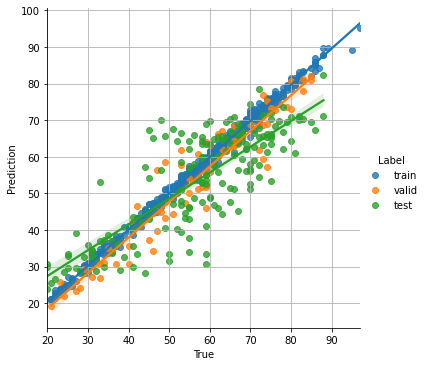

FOLD 3
EPOCHS 0
RMSE :: [TRAIN] 1.594 | [VALID] 3.920
CORR :: [TRAIN] 0.991 | [VALID] 0.977


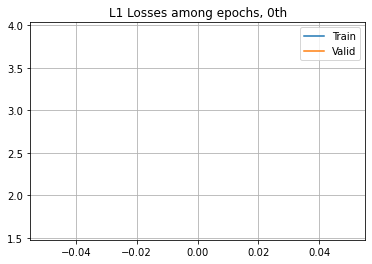

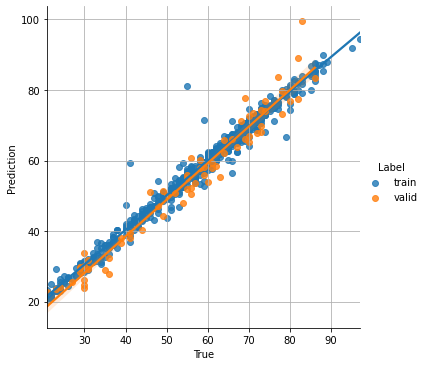

FOLD 3
EPOCHS 1
RMSE :: [TRAIN] 1.499 | [VALID] 3.827
CORR :: [TRAIN] 0.992 | [VALID] 0.976
FOLD 3
EPOCHS 2
RMSE :: [TRAIN] 1.371 | [VALID] 3.413
CORR :: [TRAIN] 0.993 | [VALID] 0.981
FOLD 3
EPOCHS 3
RMSE :: [TRAIN] 1.192 | [VALID] 4.036
CORR :: [TRAIN] 0.995 | [VALID] 0.976
FOLD 3
EPOCHS 4
RMSE :: [TRAIN] 1.229 | [VALID] 3.531
CORR :: [TRAIN] 0.995 | [VALID] 0.977
FOLD 3
EPOCHS 5
RMSE :: [TRAIN] 1.208 | [VALID] 4.506
CORR :: [TRAIN] 0.995 | [VALID] 0.978
FOLD 3
EPOCHS 6
RMSE :: [TRAIN] 1.261 | [VALID] 3.725
CORR :: [TRAIN] 0.995 | [VALID] 0.979
FOLD 3
EPOCHS 7
RMSE :: [TRAIN] 1.112 | [VALID] 3.145
CORR :: [TRAIN] 0.996 | [VALID] 0.984
FOLD 3
EPOCHS 8
RMSE :: [TRAIN] 1.142 | [VALID] 4.167
CORR :: [TRAIN] 0.996 | [VALID] 0.979
FOLD 3
EPOCHS 9
RMSE :: [TRAIN] 1.033 | [VALID] 3.396
CORR :: [TRAIN] 0.997 | [VALID] 0.982
FOLD 3
EPOCHS 10
RMSE :: [TRAIN] 1.189 | [VALID] 3.553
CORR :: [TRAIN] 0.996 | [VALID] 0.981


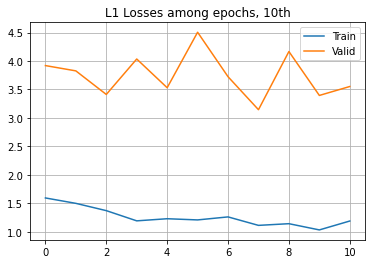

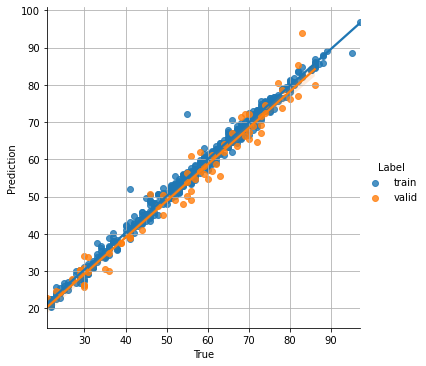

FOLD 3
EPOCHS 11
RMSE :: [TRAIN] 1.069 | [VALID] 4.462
CORR :: [TRAIN] 0.996 | [VALID] 0.977
FOLD 3
EPOCHS 12
RMSE :: [TRAIN] 1.198 | [VALID] 4.327
CORR :: [TRAIN] 0.996 | [VALID] 0.977
FOLD 3
EPOCHS 13
RMSE :: [TRAIN] 1.160 | [VALID] 3.622
CORR :: [TRAIN] 0.996 | [VALID] 0.979
FOLD 3
EPOCHS 14
RMSE :: [TRAIN] 1.130 | [VALID] 3.214
CORR :: [TRAIN] 0.996 | [VALID] 0.983
FOLD 3
EPOCHS 15
RMSE :: [TRAIN] 1.269 | [VALID] 3.374
CORR :: [TRAIN] 0.996 | [VALID] 0.982
FOLD 3
EPOCHS 16
RMSE :: [TRAIN] 1.157 | [VALID] 6.692
CORR :: [TRAIN] 0.996 | [VALID] 0.967
FOLD 3
EPOCHS 17
RMSE :: [TRAIN] 1.195 | [VALID] 4.283
CORR :: [TRAIN] 0.996 | [VALID] 0.981
FOLD 3
EPOCHS 18
RMSE :: [TRAIN] 1.045 | [VALID] 3.291
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 19
RMSE :: [TRAIN] 1.014 | [VALID] 3.305
CORR :: [TRAIN] 0.997 | [VALID] 0.982
FOLD 3
EPOCHS 20
RMSE :: [TRAIN] 1.099 | [VALID] 3.073
CORR :: [TRAIN] 0.997 | [VALID] 0.985


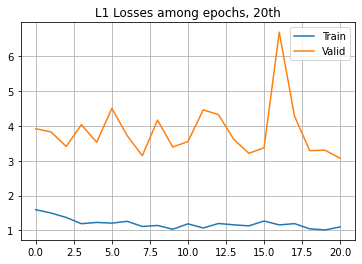

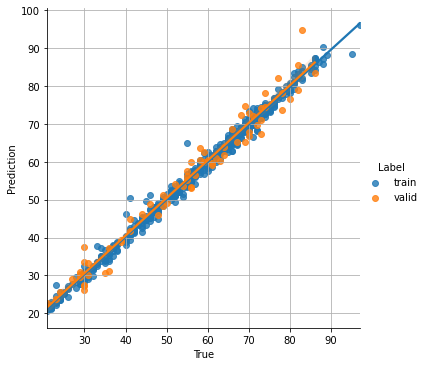

FOLD 3
EPOCHS 21
RMSE :: [TRAIN] 1.141 | [VALID] 4.329
CORR :: [TRAIN] 0.997 | [VALID] 0.981
FOLD 3
EPOCHS 22
RMSE :: [TRAIN] 1.117 | [VALID] 3.412
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 23
RMSE :: [TRAIN] 1.229 | [VALID] 3.802
CORR :: [TRAIN] 0.996 | [VALID] 0.974
FOLD 3
EPOCHS 24
RMSE :: [TRAIN] 1.161 | [VALID] 3.693
CORR :: [TRAIN] 0.996 | [VALID] 0.978
FOLD 3
EPOCHS 25
RMSE :: [TRAIN] 1.262 | [VALID] 3.847
CORR :: [TRAIN] 0.996 | [VALID] 0.978
FOLD 3
EPOCHS 26
RMSE :: [TRAIN] 1.143 | [VALID] 5.254
CORR :: [TRAIN] 0.997 | [VALID] 0.974
FOLD 3
EPOCHS 27
RMSE :: [TRAIN] 1.075 | [VALID] 3.827
CORR :: [TRAIN] 0.997 | [VALID] 0.981
FOLD 3
EPOCHS 28
RMSE :: [TRAIN] 1.074 | [VALID] 3.883
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 29
RMSE :: [TRAIN] 1.070 | [VALID] 4.853
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 30
RMSE :: [TRAIN] 1.105 | [VALID] 3.961
CORR :: [TRAIN] 0.997 | [VALID] 0.984


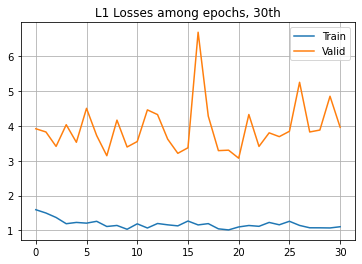

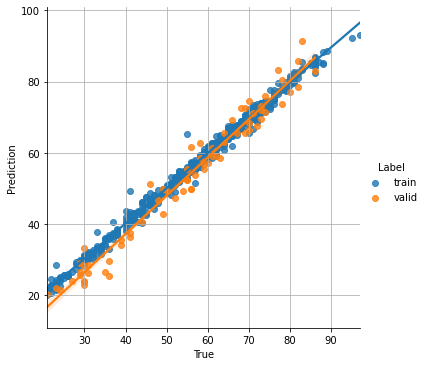

FOLD 3
EPOCHS 31
RMSE :: [TRAIN] 1.004 | [VALID] 3.343
CORR :: [TRAIN] 0.997 | [VALID] 0.983
FOLD 3
EPOCHS 32
RMSE :: [TRAIN] 0.986 | [VALID] 4.735
CORR :: [TRAIN] 0.997 | [VALID] 0.977
FOLD 3
EPOCHS 33
RMSE :: [TRAIN] 1.092 | [VALID] 4.216
CORR :: [TRAIN] 0.997 | [VALID] 0.979
FOLD 3
EPOCHS 34
RMSE :: [TRAIN] 1.078 | [VALID] 4.506
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 35
RMSE :: [TRAIN] 0.998 | [VALID] 3.180
CORR :: [TRAIN] 0.997 | [VALID] 0.984
FOLD 3
EPOCHS 36
RMSE :: [TRAIN] 1.254 | [VALID] 3.825
CORR :: [TRAIN] 0.996 | [VALID] 0.977
FOLD 3
EPOCHS 37
RMSE :: [TRAIN] 1.269 | [VALID] 3.369
CORR :: [TRAIN] 0.996 | [VALID] 0.984
FOLD 3
EPOCHS 38
RMSE :: [TRAIN] 1.074 | [VALID] 3.766
CORR :: [TRAIN] 0.997 | [VALID] 0.984
FOLD 3
EPOCHS 39
RMSE :: [TRAIN] 1.146 | [VALID] 3.525
CORR :: [TRAIN] 0.997 | [VALID] 0.981
FOLD 3
EPOCHS 40
RMSE :: [TRAIN] 0.989 | [VALID] 4.093
CORR :: [TRAIN] 0.998 | [VALID] 0.978


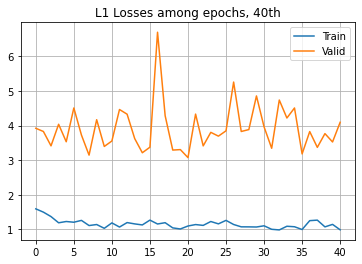

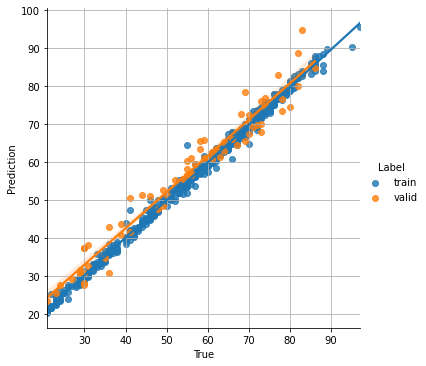

FOLD 3
EPOCHS 41
RMSE :: [TRAIN] 1.094 | [VALID] 5.556
CORR :: [TRAIN] 0.997 | [VALID] 0.975
FOLD 3
EPOCHS 42
RMSE :: [TRAIN] 1.040 | [VALID] 3.298
CORR :: [TRAIN] 0.997 | [VALID] 0.982
FOLD 3
EPOCHS 43
RMSE :: [TRAIN] 1.162 | [VALID] 3.470
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 44
RMSE :: [TRAIN] 0.963 | [VALID] 3.965
CORR :: [TRAIN] 0.998 | [VALID] 0.979
FOLD 3
EPOCHS 45
RMSE :: [TRAIN] 0.952 | [VALID] 4.023
CORR :: [TRAIN] 0.998 | [VALID] 0.974
FOLD 3
EPOCHS 46
RMSE :: [TRAIN] 1.104 | [VALID] 3.738
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 47
RMSE :: [TRAIN] 1.112 | [VALID] 3.806
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 48
RMSE :: [TRAIN] 1.016 | [VALID] 5.052
CORR :: [TRAIN] 0.998 | [VALID] 0.976
FOLD 3
EPOCHS 49
RMSE :: [TRAIN] 1.060 | [VALID] 5.368
CORR :: [TRAIN] 0.997 | [VALID] 0.974
FOLD 3
EPOCHS 50
RMSE :: [TRAIN] 1.050 | [VALID] 3.399
CORR :: [TRAIN] 0.997 | [VALID] 0.983


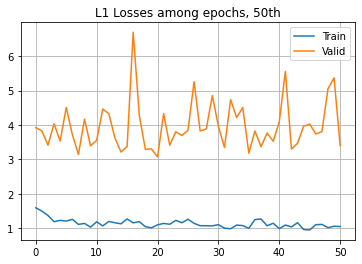

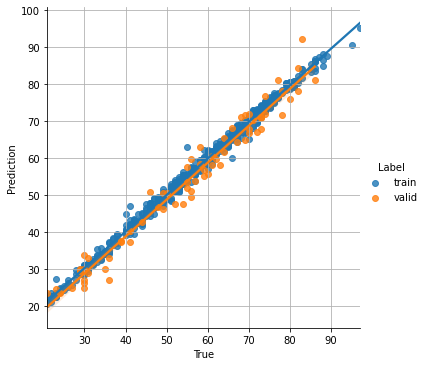

FOLD 3
EPOCHS 51
RMSE :: [TRAIN] 0.857 | [VALID] 3.337
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 52
RMSE :: [TRAIN] 0.982 | [VALID] 3.623
CORR :: [TRAIN] 0.998 | [VALID] 0.979
FOLD 3
EPOCHS 53
RMSE :: [TRAIN] 1.085 | [VALID] 3.399
CORR :: [TRAIN] 0.997 | [VALID] 0.981
FOLD 3
EPOCHS 54
RMSE :: [TRAIN] 1.071 | [VALID] 3.856
CORR :: [TRAIN] 0.997 | [VALID] 0.981
FOLD 3
EPOCHS 55
RMSE :: [TRAIN] 1.039 | [VALID] 3.330
CORR :: [TRAIN] 0.997 | [VALID] 0.982
FOLD 3
EPOCHS 56
RMSE :: [TRAIN] 0.883 | [VALID] 3.288
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 57
RMSE :: [TRAIN] 0.849 | [VALID] 3.412
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 58
RMSE :: [TRAIN] 0.885 | [VALID] 3.332
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 59
RMSE :: [TRAIN] 0.920 | [VALID] 4.174
CORR :: [TRAIN] 0.998 | [VALID] 0.977
FOLD 3
EPOCHS 60
RMSE :: [TRAIN] 0.888 | [VALID] 3.944
CORR :: [TRAIN] 0.998 | [VALID] 0.979


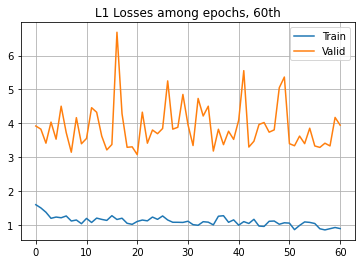

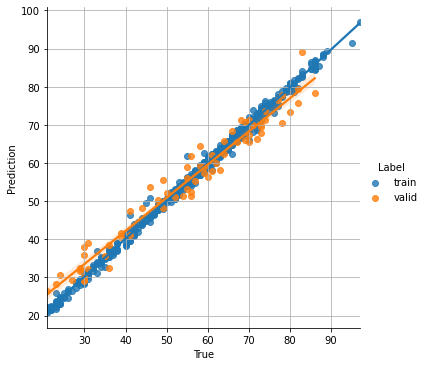

FOLD 3
EPOCHS 61
RMSE :: [TRAIN] 0.933 | [VALID] 3.594
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 62
RMSE :: [TRAIN] 0.852 | [VALID] 5.074
CORR :: [TRAIN] 0.998 | [VALID] 0.978
FOLD 3
EPOCHS 63
RMSE :: [TRAIN] 0.985 | [VALID] 3.454
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 64
RMSE :: [TRAIN] 1.028 | [VALID] 4.393
CORR :: [TRAIN] 0.998 | [VALID] 0.977
FOLD 3
EPOCHS 65
RMSE :: [TRAIN] 0.962 | [VALID] 3.584
CORR :: [TRAIN] 0.998 | [VALID] 0.979
FOLD 3
EPOCHS 66
RMSE :: [TRAIN] 1.022 | [VALID] 4.126
CORR :: [TRAIN] 0.998 | [VALID] 0.975
FOLD 3
EPOCHS 67
RMSE :: [TRAIN] 1.014 | [VALID] 3.797
CORR :: [TRAIN] 0.998 | [VALID] 0.978
FOLD 3
EPOCHS 68
RMSE :: [TRAIN] 0.996 | [VALID] 3.333
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 69
RMSE :: [TRAIN] 1.003 | [VALID] 3.510
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 70
RMSE :: [TRAIN] 0.954 | [VALID] 3.571
CORR :: [TRAIN] 0.998 | [VALID] 0.983


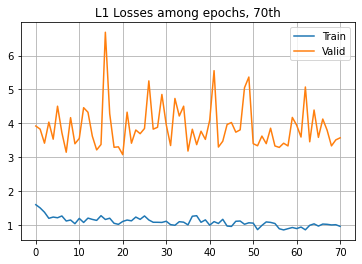

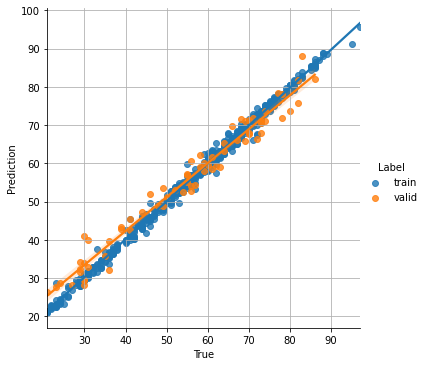

FOLD 3
EPOCHS 71
RMSE :: [TRAIN] 0.875 | [VALID] 3.361
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 72
RMSE :: [TRAIN] 0.805 | [VALID] 3.440
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 73
RMSE :: [TRAIN] 0.937 | [VALID] 3.270
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 74
RMSE :: [TRAIN] 0.858 | [VALID] 3.594
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 75
RMSE :: [TRAIN] 1.016 | [VALID] 4.820
CORR :: [TRAIN] 0.998 | [VALID] 0.972
FOLD 3
EPOCHS 76
RMSE :: [TRAIN] 0.934 | [VALID] 3.532
CORR :: [TRAIN] 0.998 | [VALID] 0.982
FOLD 3
EPOCHS 77
RMSE :: [TRAIN] 0.985 | [VALID] 3.281
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 78
RMSE :: [TRAIN] 1.051 | [VALID] 3.999
CORR :: [TRAIN] 0.997 | [VALID] 0.980
FOLD 3
EPOCHS 79
RMSE :: [TRAIN] 0.974 | [VALID] 3.591
CORR :: [TRAIN] 0.998 | [VALID] 0.980
FOLD 3
EPOCHS 80
RMSE :: [TRAIN] 0.864 | [VALID] 5.032
CORR :: [TRAIN] 0.998 | [VALID] 0.975


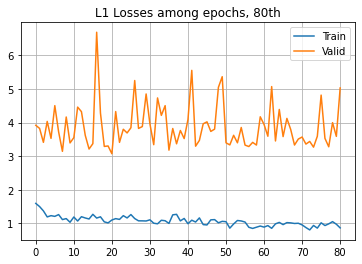

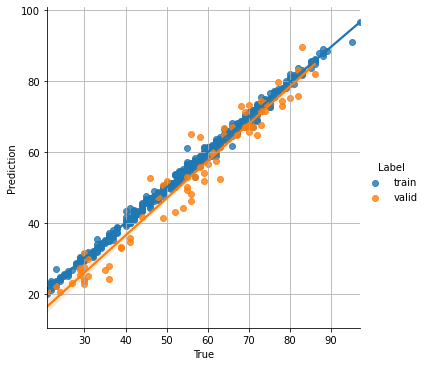

FOLD 3
EPOCHS 81
RMSE :: [TRAIN] 0.916 | [VALID] 4.824
CORR :: [TRAIN] 0.998 | [VALID] 0.978
FOLD 3
EPOCHS 82
RMSE :: [TRAIN] 0.855 | [VALID] 3.603
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 83
RMSE :: [TRAIN] 0.924 | [VALID] 3.302
CORR :: [TRAIN] 0.998 | [VALID] 0.985
FOLD 3
EPOCHS 84
RMSE :: [TRAIN] 0.896 | [VALID] 3.407
CORR :: [TRAIN] 0.998 | [VALID] 0.984
FOLD 3
EPOCHS 85
RMSE :: [TRAIN] 0.899 | [VALID] 3.313
CORR :: [TRAIN] 0.998 | [VALID] 0.982
FOLD 3
EPOCHS 86
RMSE :: [TRAIN] 0.889 | [VALID] 3.843
CORR :: [TRAIN] 0.998 | [VALID] 0.980
FOLD 3
EPOCHS 87
RMSE :: [TRAIN] 0.940 | [VALID] 3.659
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 88
RMSE :: [TRAIN] 0.939 | [VALID] 3.387
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 3
EPOCHS 89
RMSE :: [TRAIN] 0.871 | [VALID] 3.297
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 3
EPOCHS 90
RMSE :: [TRAIN] 0.959 | [VALID] 3.496
CORR :: [TRAIN] 0.998 | [VALID] 0.980


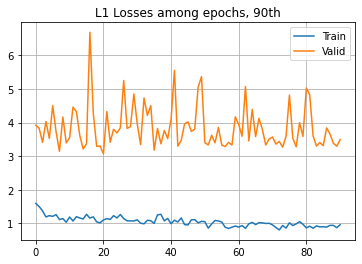

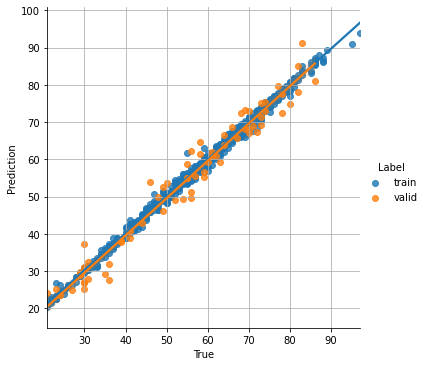

FOLD 3
EPOCHS 91
RMSE :: [TRAIN] 0.909 | [VALID] 3.517
CORR :: [TRAIN] 0.998 | [VALID] 0.980
FOLD 3
EPOCHS 92
RMSE :: [TRAIN] 0.965 | [VALID] 3.683
CORR :: [TRAIN] 0.998 | [VALID] 0.979
FOLD 3
EPOCHS 93
RMSE :: [TRAIN] 0.899 | [VALID] 3.491
CORR :: [TRAIN] 0.998 | [VALID] 0.980
FOLD 3
EPOCHS 94
RMSE :: [TRAIN] 0.986 | [VALID] 3.536
CORR :: [TRAIN] 0.998 | [VALID] 0.979
FOLD 3
EPOCHS 95
RMSE :: [TRAIN] 0.782 | [VALID] 4.834
CORR :: [TRAIN] 0.999 | [VALID] 0.974
FOLD 3
EPOCHS 96
RMSE :: [TRAIN] 0.861 | [VALID] 4.413
CORR :: [TRAIN] 0.998 | [VALID] 0.977
FOLD 3
EPOCHS 97
RMSE :: [TRAIN] 0.837 | [VALID] 3.861
CORR :: [TRAIN] 0.998 | [VALID] 0.977
FOLD 3
EPOCHS 98
RMSE :: [TRAIN] 0.849 | [VALID] 4.174
CORR :: [TRAIN] 0.998 | [VALID] 0.972
FOLD 3
EPOCHS 99
RMSE :: [TRAIN] 0.886 | [VALID] 4.223
CORR :: [TRAIN] 0.998 | [VALID] 0.973
FOLD 3
RMSE :: [TEST] 8.819
CORR :: [TEST] 0.834


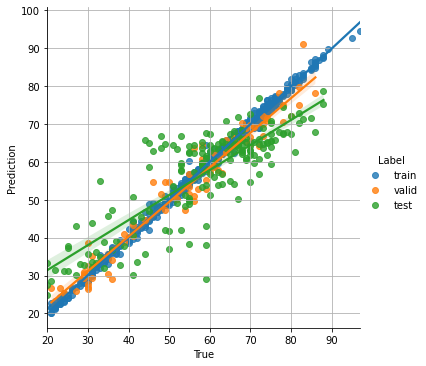

FOLD 4
EPOCHS 0
RMSE :: [TRAIN] 1.390 | [VALID] 2.924
CORR :: [TRAIN] 0.994 | [VALID] 0.988


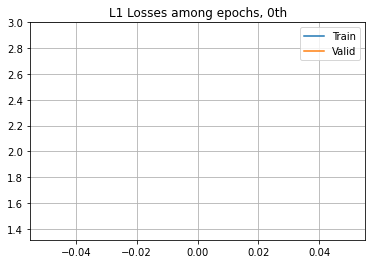

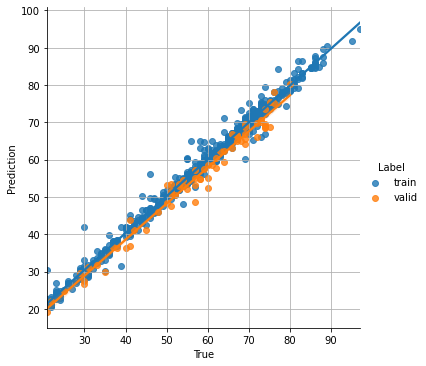

FOLD 4
EPOCHS 1
RMSE :: [TRAIN] 1.109 | [VALID] 2.343
CORR :: [TRAIN] 0.996 | [VALID] 0.988
FOLD 4
EPOCHS 2
RMSE :: [TRAIN] 1.060 | [VALID] 2.540
CORR :: [TRAIN] 0.997 | [VALID] 0.985
FOLD 4
EPOCHS 3
RMSE :: [TRAIN] 1.003 | [VALID] 2.622
CORR :: [TRAIN] 0.997 | [VALID] 0.986
FOLD 4
EPOCHS 4
RMSE :: [TRAIN] 1.110 | [VALID] 3.279
CORR :: [TRAIN] 0.997 | [VALID] 0.986
FOLD 4
EPOCHS 5
RMSE :: [TRAIN] 1.039 | [VALID] 3.216
CORR :: [TRAIN] 0.998 | [VALID] 0.985
FOLD 4
EPOCHS 6
RMSE :: [TRAIN] 1.059 | [VALID] 2.808
CORR :: [TRAIN] 0.998 | [VALID] 0.984
FOLD 4
EPOCHS 7
RMSE :: [TRAIN] 0.978 | [VALID] 3.095
CORR :: [TRAIN] 0.998 | [VALID] 0.980
FOLD 4
EPOCHS 8
RMSE :: [TRAIN] 0.957 | [VALID] 2.303
CORR :: [TRAIN] 0.998 | [VALID] 0.989
FOLD 4
EPOCHS 9
RMSE :: [TRAIN] 0.969 | [VALID] 2.673
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 10
RMSE :: [TRAIN] 1.001 | [VALID] 2.050
CORR :: [TRAIN] 0.998 | [VALID] 0.990


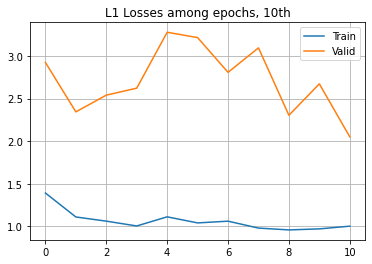

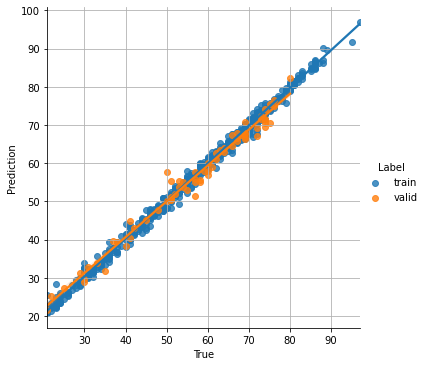

FOLD 4
EPOCHS 11
RMSE :: [TRAIN] 1.042 | [VALID] 3.296
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 12
RMSE :: [TRAIN] 1.005 | [VALID] 2.499
CORR :: [TRAIN] 0.998 | [VALID] 0.988
FOLD 4
EPOCHS 13
RMSE :: [TRAIN] 0.896 | [VALID] 2.143
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 4
EPOCHS 14
RMSE :: [TRAIN] 1.010 | [VALID] 2.977
CORR :: [TRAIN] 0.998 | [VALID] 0.989
FOLD 4
EPOCHS 15
RMSE :: [TRAIN] 1.111 | [VALID] 2.203
CORR :: [TRAIN] 0.997 | [VALID] 0.990
FOLD 4
EPOCHS 16
RMSE :: [TRAIN] 1.033 | [VALID] 1.923
CORR :: [TRAIN] 0.998 | [VALID] 0.991
FOLD 4
EPOCHS 17
RMSE :: [TRAIN] 0.974 | [VALID] 2.309
CORR :: [TRAIN] 0.998 | [VALID] 0.986
FOLD 4
EPOCHS 18
RMSE :: [TRAIN] 0.995 | [VALID] 2.460
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 19
RMSE :: [TRAIN] 1.084 | [VALID] 2.484
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 20
RMSE :: [TRAIN] 1.093 | [VALID] 2.384
CORR :: [TRAIN] 0.998 | [VALID] 0.989


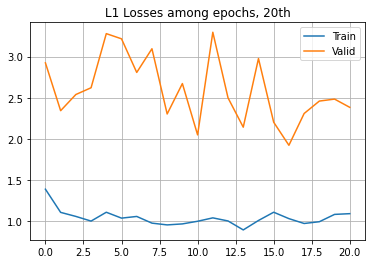

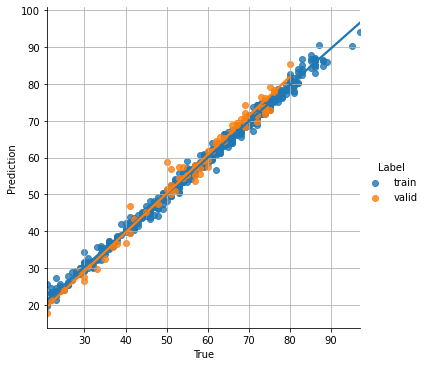

FOLD 4
EPOCHS 21
RMSE :: [TRAIN] 1.114 | [VALID] 2.847
CORR :: [TRAIN] 0.997 | [VALID] 0.985
FOLD 4
EPOCHS 22
RMSE :: [TRAIN] 0.993 | [VALID] 1.992
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 4
EPOCHS 23
RMSE :: [TRAIN] 0.951 | [VALID] 1.954
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 4
EPOCHS 24
RMSE :: [TRAIN] 1.022 | [VALID] 2.460
CORR :: [TRAIN] 0.998 | [VALID] 0.988
FOLD 4
EPOCHS 25
RMSE :: [TRAIN] 0.912 | [VALID] 5.275
CORR :: [TRAIN] 0.998 | [VALID] 0.970
FOLD 4
EPOCHS 26
RMSE :: [TRAIN] 0.931 | [VALID] 4.784
CORR :: [TRAIN] 0.998 | [VALID] 0.979
FOLD 4
EPOCHS 27
RMSE :: [TRAIN] 1.008 | [VALID] 2.576
CORR :: [TRAIN] 0.998 | [VALID] 0.989
FOLD 4
EPOCHS 28
RMSE :: [TRAIN] 0.999 | [VALID] 2.202
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 29
RMSE :: [TRAIN] 0.926 | [VALID] 2.754
CORR :: [TRAIN] 0.998 | [VALID] 0.984
FOLD 4
EPOCHS 30
RMSE :: [TRAIN] 0.938 | [VALID] 2.909
CORR :: [TRAIN] 0.998 | [VALID] 0.984


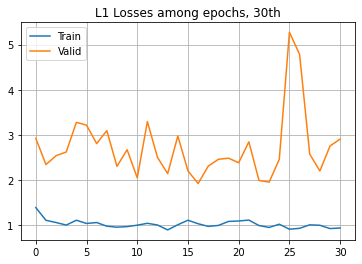

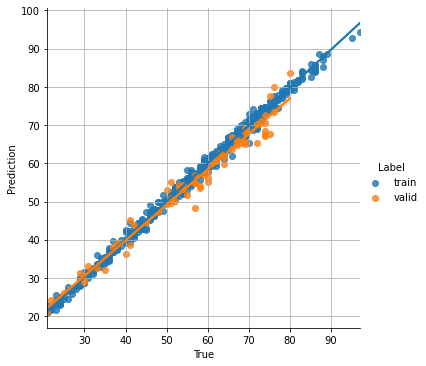

FOLD 4
EPOCHS 31
RMSE :: [TRAIN] 0.917 | [VALID] 2.525
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 32
RMSE :: [TRAIN] 0.914 | [VALID] 2.803
CORR :: [TRAIN] 0.998 | [VALID] 0.985
FOLD 4
EPOCHS 33
RMSE :: [TRAIN] 0.836 | [VALID] 2.365
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 4
EPOCHS 34
RMSE :: [TRAIN] 0.875 | [VALID] 2.293
CORR :: [TRAIN] 0.998 | [VALID] 0.986
FOLD 4
EPOCHS 35
RMSE :: [TRAIN] 0.948 | [VALID] 2.376
CORR :: [TRAIN] 0.998 | [VALID] 0.985
FOLD 4
EPOCHS 36
RMSE :: [TRAIN] 0.842 | [VALID] 2.909
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 37
RMSE :: [TRAIN] 0.961 | [VALID] 2.673
CORR :: [TRAIN] 0.998 | [VALID] 0.989
FOLD 4
EPOCHS 38
RMSE :: [TRAIN] 0.921 | [VALID] 3.111
CORR :: [TRAIN] 0.998 | [VALID] 0.982
FOLD 4
EPOCHS 39
RMSE :: [TRAIN] 0.955 | [VALID] 2.910
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 4
EPOCHS 40
RMSE :: [TRAIN] 0.955 | [VALID] 2.522
CORR :: [TRAIN] 0.998 | [VALID] 0.987


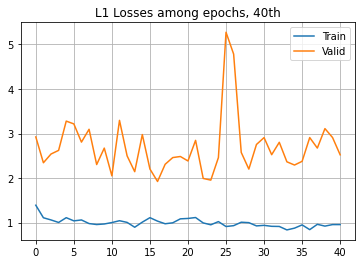

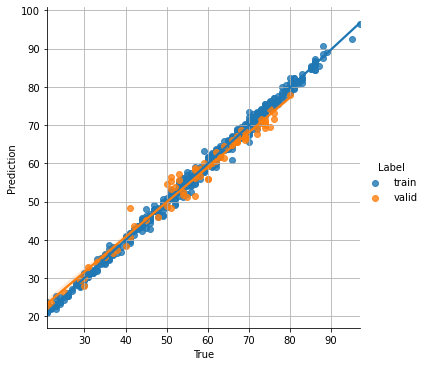

FOLD 4
EPOCHS 41
RMSE :: [TRAIN] 0.840 | [VALID] 2.375
CORR :: [TRAIN] 0.998 | [VALID] 0.988
FOLD 4
EPOCHS 42
RMSE :: [TRAIN] 0.925 | [VALID] 2.824
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 43
RMSE :: [TRAIN] 0.831 | [VALID] 2.500
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 44
RMSE :: [TRAIN] 0.898 | [VALID] 2.746
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 4
EPOCHS 45
RMSE :: [TRAIN] 0.911 | [VALID] 2.713
CORR :: [TRAIN] 0.998 | [VALID] 0.984
FOLD 4
EPOCHS 46
RMSE :: [TRAIN] 0.935 | [VALID] 2.780
CORR :: [TRAIN] 0.998 | [VALID] 0.986
FOLD 4
EPOCHS 47
RMSE :: [TRAIN] 0.860 | [VALID] 2.223
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 4
EPOCHS 48
RMSE :: [TRAIN] 0.937 | [VALID] 2.028
CORR :: [TRAIN] 0.998 | [VALID] 0.991
FOLD 4
EPOCHS 49
RMSE :: [TRAIN] 0.836 | [VALID] 1.993
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 4
EPOCHS 50
RMSE :: [TRAIN] 0.949 | [VALID] 2.356
CORR :: [TRAIN] 0.998 | [VALID] 0.987


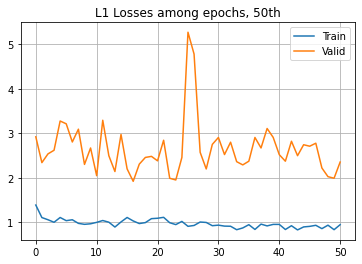

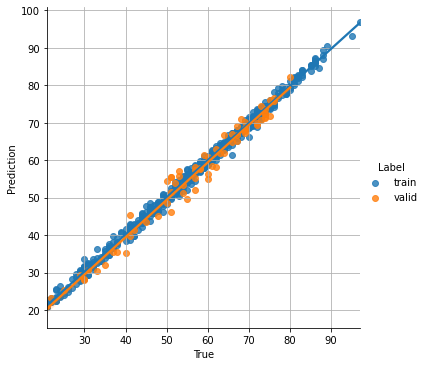

FOLD 4
EPOCHS 51
RMSE :: [TRAIN] 0.958 | [VALID] 2.444
CORR :: [TRAIN] 0.998 | [VALID] 0.986
FOLD 4
EPOCHS 52
RMSE :: [TRAIN] 0.980 | [VALID] 4.967
CORR :: [TRAIN] 0.998 | [VALID] 0.973
FOLD 4
EPOCHS 53
RMSE :: [TRAIN] 0.875 | [VALID] 3.175
CORR :: [TRAIN] 0.998 | [VALID] 0.982
FOLD 4
EPOCHS 54
RMSE :: [TRAIN] 0.861 | [VALID] 2.795
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 55
RMSE :: [TRAIN] 0.780 | [VALID] 2.358
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 4
EPOCHS 56
RMSE :: [TRAIN] 0.892 | [VALID] 2.464
CORR :: [TRAIN] 0.998 | [VALID] 0.988
FOLD 4
EPOCHS 57
RMSE :: [TRAIN] 0.823 | [VALID] 2.349
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 4
EPOCHS 58
RMSE :: [TRAIN] 0.819 | [VALID] 2.538
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 4
EPOCHS 59
RMSE :: [TRAIN] 0.792 | [VALID] 2.409
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 4
EPOCHS 60
RMSE :: [TRAIN] 0.929 | [VALID] 3.498
CORR :: [TRAIN] 0.998 | [VALID] 0.984


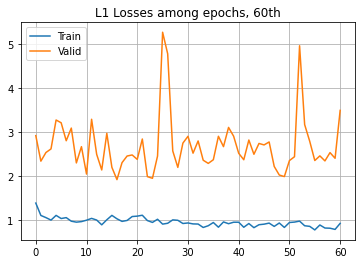

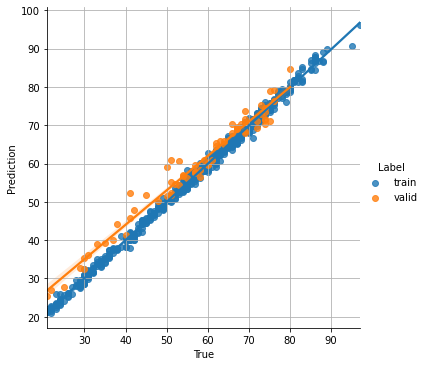

FOLD 4
EPOCHS 61
RMSE :: [TRAIN] 0.830 | [VALID] 2.477
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 4
EPOCHS 62
RMSE :: [TRAIN] 0.868 | [VALID] 2.680
CORR :: [TRAIN] 0.998 | [VALID] 0.983
FOLD 4
EPOCHS 63
RMSE :: [TRAIN] 0.896 | [VALID] 3.187
CORR :: [TRAIN] 0.998 | [VALID] 0.981
FOLD 4
EPOCHS 64
RMSE :: [TRAIN] 0.865 | [VALID] 2.613
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 65
RMSE :: [TRAIN] 0.843 | [VALID] 2.637
CORR :: [TRAIN] 0.998 | [VALID] 0.988
FOLD 4
EPOCHS 66
RMSE :: [TRAIN] 0.895 | [VALID] 2.414
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 67
RMSE :: [TRAIN] 0.748 | [VALID] 3.366
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 4
EPOCHS 68
RMSE :: [TRAIN] 0.750 | [VALID] 2.658
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 4
EPOCHS 69
RMSE :: [TRAIN] 0.915 | [VALID] 2.453
CORR :: [TRAIN] 0.998 | [VALID] 0.985
FOLD 4
EPOCHS 70
RMSE :: [TRAIN] 0.701 | [VALID] 2.932
CORR :: [TRAIN] 0.999 | [VALID] 0.982


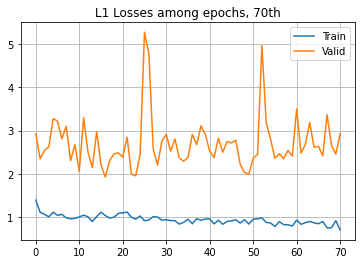

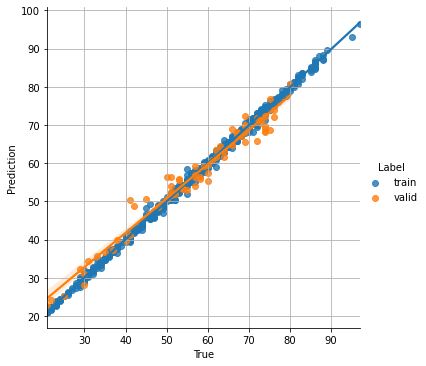

FOLD 4
EPOCHS 71
RMSE :: [TRAIN] 0.787 | [VALID] 2.416
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 4
EPOCHS 72
RMSE :: [TRAIN] 0.862 | [VALID] 2.883
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 73
RMSE :: [TRAIN] 0.704 | [VALID] 2.327
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 4
EPOCHS 74
RMSE :: [TRAIN] 0.827 | [VALID] 3.493
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 4
EPOCHS 75
RMSE :: [TRAIN] 0.793 | [VALID] 2.375
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 76
RMSE :: [TRAIN] 0.741 | [VALID] 3.065
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 4
EPOCHS 77
RMSE :: [TRAIN] 0.695 | [VALID] 2.799
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 4
EPOCHS 78
RMSE :: [TRAIN] 0.746 | [VALID] 2.972
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 4
EPOCHS 79
RMSE :: [TRAIN] 0.879 | [VALID] 2.981
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 4
EPOCHS 80
RMSE :: [TRAIN] 0.757 | [VALID] 2.548
CORR :: [TRAIN] 0.999 | [VALID] 0.986


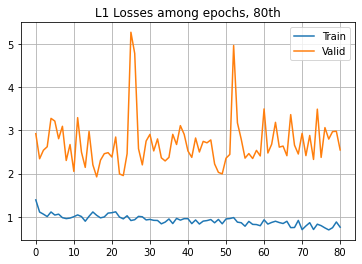

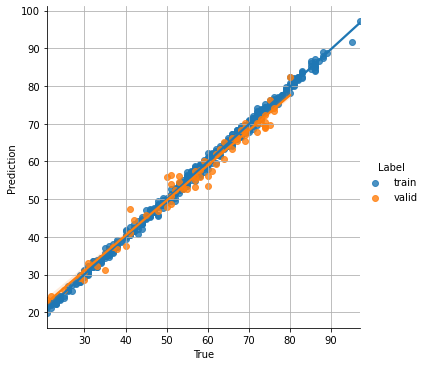

FOLD 4
EPOCHS 81
RMSE :: [TRAIN] 0.771 | [VALID] 2.736
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 4
EPOCHS 82
RMSE :: [TRAIN] 0.741 | [VALID] 2.481
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 4
EPOCHS 83
RMSE :: [TRAIN] 0.777 | [VALID] 2.320
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 4
EPOCHS 84
RMSE :: [TRAIN] 0.702 | [VALID] 2.518
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 85
RMSE :: [TRAIN] 0.780 | [VALID] 2.499
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 86
RMSE :: [TRAIN] 0.794 | [VALID] 2.634
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 87
RMSE :: [TRAIN] 0.784 | [VALID] 2.844
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 4
EPOCHS 88
RMSE :: [TRAIN] 0.770 | [VALID] 2.487
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 4
EPOCHS 89
RMSE :: [TRAIN] 0.784 | [VALID] 3.164
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 4
EPOCHS 90
RMSE :: [TRAIN] 0.754 | [VALID] 3.537
CORR :: [TRAIN] 0.999 | [VALID] 0.981


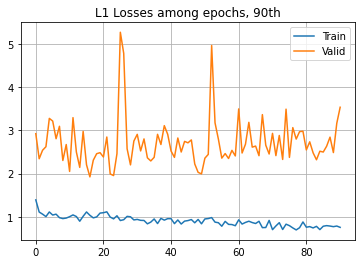

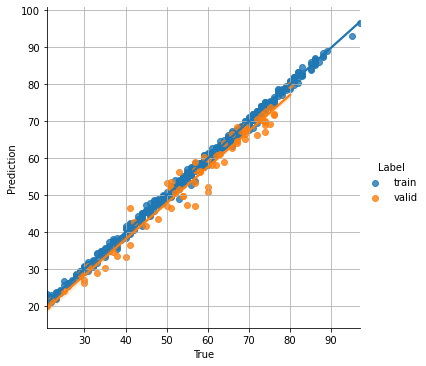

FOLD 4
EPOCHS 91
RMSE :: [TRAIN] 0.753 | [VALID] 2.749
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 4
EPOCHS 92
RMSE :: [TRAIN] 0.752 | [VALID] 2.296
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 93
RMSE :: [TRAIN] 0.750 | [VALID] 2.441
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 94
RMSE :: [TRAIN] 0.778 | [VALID] 3.053
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 4
EPOCHS 95
RMSE :: [TRAIN] 0.714 | [VALID] 3.146
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 4
EPOCHS 96
RMSE :: [TRAIN] 0.724 | [VALID] 2.707
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 4
EPOCHS 97
RMSE :: [TRAIN] 0.759 | [VALID] 3.259
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 4
EPOCHS 98
RMSE :: [TRAIN] 0.750 | [VALID] 2.788
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 4
EPOCHS 99
RMSE :: [TRAIN] 0.920 | [VALID] 2.534
CORR :: [TRAIN] 0.998 | [VALID] 0.984
FOLD 4
RMSE :: [TEST] 8.672
CORR :: [TEST] 0.834


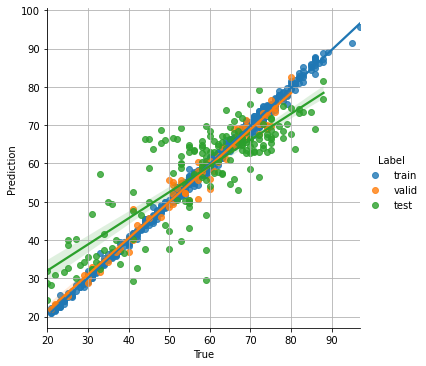

FOLD 5
EPOCHS 0
RMSE :: [TRAIN] 1.056 | [VALID] 3.571
CORR :: [TRAIN] 0.996 | [VALID] 0.986


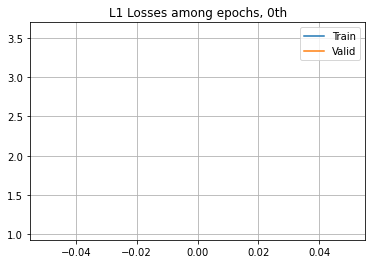

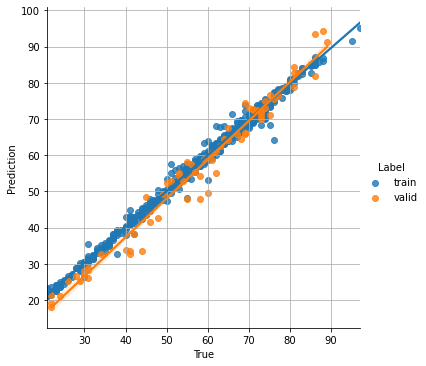

FOLD 5
EPOCHS 1
RMSE :: [TRAIN] 0.956 | [VALID] 3.442
CORR :: [TRAIN] 0.997 | [VALID] 0.989
FOLD 5
EPOCHS 2
RMSE :: [TRAIN] 0.843 | [VALID] 2.700
CORR :: [TRAIN] 0.998 | [VALID] 0.992
FOLD 5
EPOCHS 3
RMSE :: [TRAIN] 0.850 | [VALID] 2.210
CORR :: [TRAIN] 0.998 | [VALID] 0.994
FOLD 5
EPOCHS 4
RMSE :: [TRAIN] 0.843 | [VALID] 2.392
CORR :: [TRAIN] 0.998 | [VALID] 0.992
FOLD 5
EPOCHS 5
RMSE :: [TRAIN] 0.875 | [VALID] 3.917
CORR :: [TRAIN] 0.998 | [VALID] 0.986
FOLD 5
EPOCHS 6
RMSE :: [TRAIN] 0.835 | [VALID] 3.397
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 5
EPOCHS 7
RMSE :: [TRAIN] 0.851 | [VALID] 2.762
CORR :: [TRAIN] 0.998 | [VALID] 0.989
FOLD 5
EPOCHS 8
RMSE :: [TRAIN] 0.873 | [VALID] 2.230
CORR :: [TRAIN] 0.998 | [VALID] 0.992
FOLD 5
EPOCHS 9
RMSE :: [TRAIN] 0.922 | [VALID] 2.069
CORR :: [TRAIN] 0.998 | [VALID] 0.992
FOLD 5
EPOCHS 10
RMSE :: [TRAIN] 0.919 | [VALID] 2.304
CORR :: [TRAIN] 0.998 | [VALID] 0.992


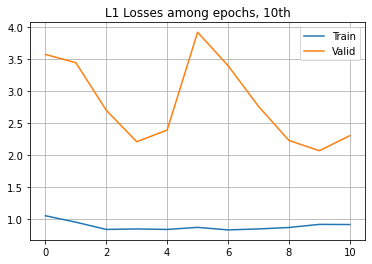

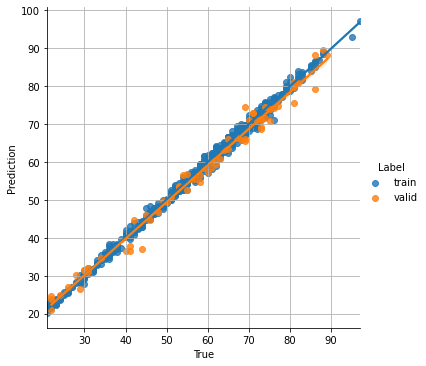

FOLD 5
EPOCHS 11
RMSE :: [TRAIN] 0.836 | [VALID] 2.103
CORR :: [TRAIN] 0.998 | [VALID] 0.992
FOLD 5
EPOCHS 12
RMSE :: [TRAIN] 0.807 | [VALID] 2.182
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 13
RMSE :: [TRAIN] 0.786 | [VALID] 2.756
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 14
RMSE :: [TRAIN] 0.715 | [VALID] 2.530
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 15
RMSE :: [TRAIN] 0.800 | [VALID] 2.365
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 16
RMSE :: [TRAIN] 0.774 | [VALID] 2.833
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 17
RMSE :: [TRAIN] 0.782 | [VALID] 2.521
CORR :: [TRAIN] 0.999 | [VALID] 0.993
FOLD 5
EPOCHS 18
RMSE :: [TRAIN] 0.744 | [VALID] 2.284
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 19
RMSE :: [TRAIN] 0.774 | [VALID] 2.266
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 20
RMSE :: [TRAIN] 0.781 | [VALID] 2.402
CORR :: [TRAIN] 0.999 | [VALID] 0.991


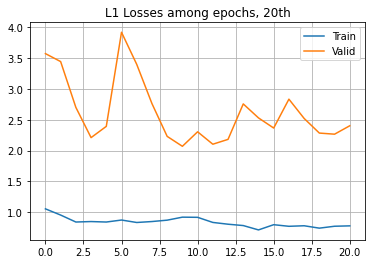

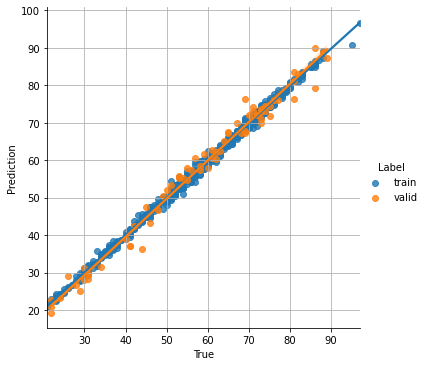

FOLD 5
EPOCHS 21
RMSE :: [TRAIN] 0.738 | [VALID] 2.189
CORR :: [TRAIN] 0.999 | [VALID] 0.993
FOLD 5
EPOCHS 22
RMSE :: [TRAIN] 0.820 | [VALID] 2.566
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 23
RMSE :: [TRAIN] 0.681 | [VALID] 2.418
CORR :: [TRAIN] 0.999 | [VALID] 0.993
FOLD 5
EPOCHS 24
RMSE :: [TRAIN] 0.727 | [VALID] 2.521
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 25
RMSE :: [TRAIN] 0.822 | [VALID] 2.065
CORR :: [TRAIN] 0.999 | [VALID] 0.993
FOLD 5
EPOCHS 26
RMSE :: [TRAIN] 0.797 | [VALID] 2.416
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 27
RMSE :: [TRAIN] 0.762 | [VALID] 2.942
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 28
RMSE :: [TRAIN] 0.738 | [VALID] 3.168
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 29
RMSE :: [TRAIN] 0.803 | [VALID] 3.767
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 30
RMSE :: [TRAIN] 0.738 | [VALID] 2.787
CORR :: [TRAIN] 0.999 | [VALID] 0.990


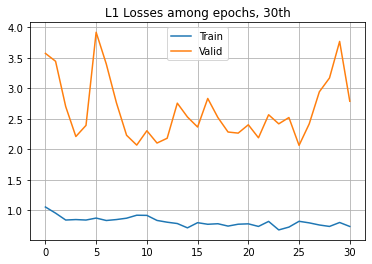

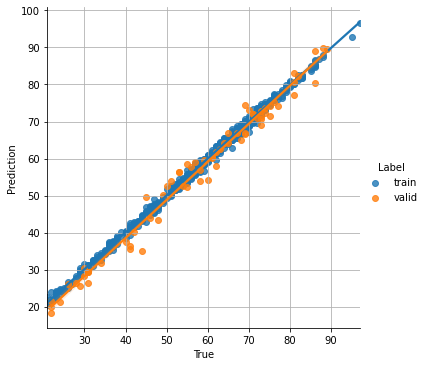

FOLD 5
EPOCHS 31
RMSE :: [TRAIN] 0.732 | [VALID] 2.242
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 32
RMSE :: [TRAIN] 0.858 | [VALID] 2.568
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 5
EPOCHS 33
RMSE :: [TRAIN] 0.842 | [VALID] 2.394
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 5
EPOCHS 34
RMSE :: [TRAIN] 0.806 | [VALID] 2.891
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 35
RMSE :: [TRAIN] 0.743 | [VALID] 3.302
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 36
RMSE :: [TRAIN] 0.686 | [VALID] 3.013
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 37
RMSE :: [TRAIN] 0.681 | [VALID] 2.719
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 38
RMSE :: [TRAIN] 0.709 | [VALID] 2.486
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 39
RMSE :: [TRAIN] 0.682 | [VALID] 2.604
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 40
RMSE :: [TRAIN] 0.732 | [VALID] 2.547
CORR :: [TRAIN] 0.999 | [VALID] 0.991


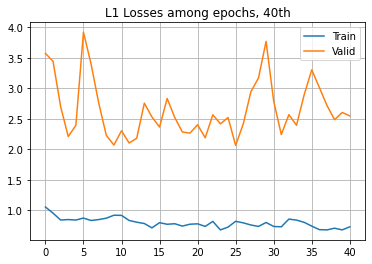

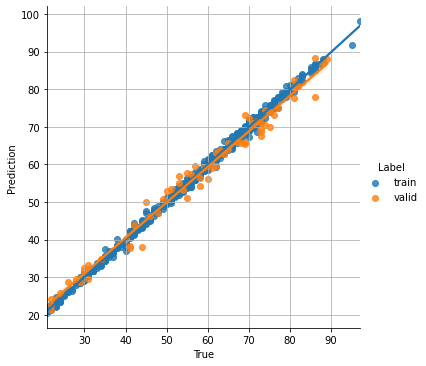

FOLD 5
EPOCHS 41
RMSE :: [TRAIN] 0.724 | [VALID] 2.701
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 42
RMSE :: [TRAIN] 0.743 | [VALID] 2.443
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 43
RMSE :: [TRAIN] 0.671 | [VALID] 2.452
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 44
RMSE :: [TRAIN] 0.734 | [VALID] 2.531
CORR :: [TRAIN] 0.999 | [VALID] 0.993
FOLD 5
EPOCHS 45
RMSE :: [TRAIN] 0.780 | [VALID] 2.502
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 46
RMSE :: [TRAIN] 0.705 | [VALID] 2.357
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 47
RMSE :: [TRAIN] 0.670 | [VALID] 2.491
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 48
RMSE :: [TRAIN] 0.674 | [VALID] 2.251
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 5
EPOCHS 49
RMSE :: [TRAIN] 0.707 | [VALID] 2.314
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 50
RMSE :: [TRAIN] 0.697 | [VALID] 2.190
CORR :: [TRAIN] 0.999 | [VALID] 0.993


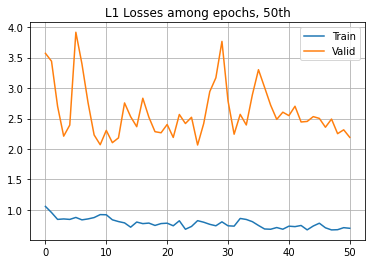

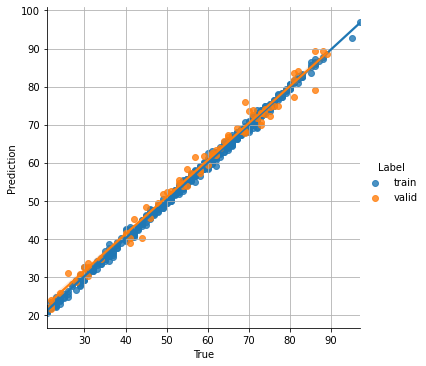

FOLD 5
EPOCHS 51
RMSE :: [TRAIN] 0.758 | [VALID] 2.589
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 52
RMSE :: [TRAIN] 0.685 | [VALID] 2.697
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 53
RMSE :: [TRAIN] 0.713 | [VALID] 2.981
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 54
RMSE :: [TRAIN] 0.728 | [VALID] 2.642
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 55
RMSE :: [TRAIN] 0.707 | [VALID] 2.516
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 56
RMSE :: [TRAIN] 0.695 | [VALID] 2.943
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 57
RMSE :: [TRAIN] 0.738 | [VALID] 3.651
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 5
EPOCHS 58
RMSE :: [TRAIN] 0.755 | [VALID] 3.256
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 59
RMSE :: [TRAIN] 0.668 | [VALID] 2.628
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 60
RMSE :: [TRAIN] 0.730 | [VALID] 2.684
CORR :: [TRAIN] 0.999 | [VALID] 0.989


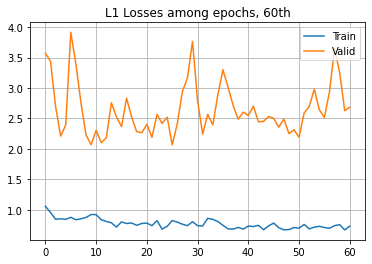

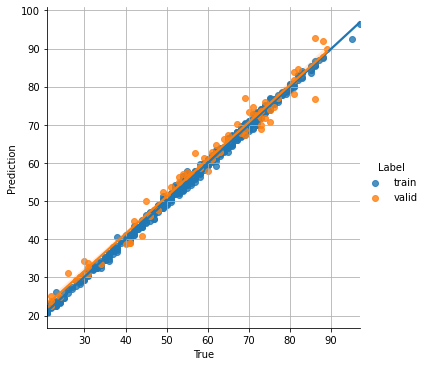

FOLD 5
EPOCHS 61
RMSE :: [TRAIN] 0.794 | [VALID] 2.671
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 62
RMSE :: [TRAIN] 0.773 | [VALID] 3.152
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 5
EPOCHS 63
RMSE :: [TRAIN] 0.838 | [VALID] 3.432
CORR :: [TRAIN] 0.998 | [VALID] 0.987
FOLD 5
EPOCHS 64
RMSE :: [TRAIN] 0.737 | [VALID] 2.840
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 65
RMSE :: [TRAIN] 0.701 | [VALID] 2.813
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 66
RMSE :: [TRAIN] 0.682 | [VALID] 3.725
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 5
EPOCHS 67
RMSE :: [TRAIN] 0.768 | [VALID] 4.903
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 5
EPOCHS 68
RMSE :: [TRAIN] 0.713 | [VALID] 3.244
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 69
RMSE :: [TRAIN] 0.767 | [VALID] 2.938
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 70
RMSE :: [TRAIN] 0.729 | [VALID] 2.791
CORR :: [TRAIN] 0.999 | [VALID] 0.989


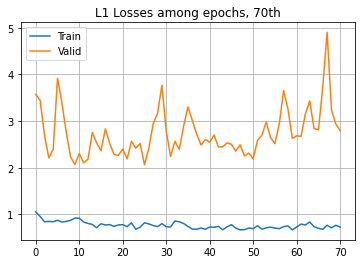

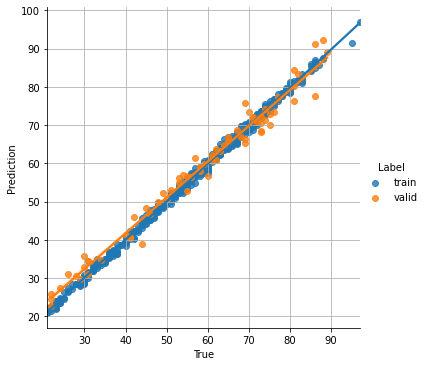

FOLD 5
EPOCHS 71
RMSE :: [TRAIN] 0.774 | [VALID] 2.629
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 72
RMSE :: [TRAIN] 0.792 | [VALID] 2.541
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 73
RMSE :: [TRAIN] 0.787 | [VALID] 2.594
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 74
RMSE :: [TRAIN] 0.747 | [VALID] 2.982
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 5
EPOCHS 75
RMSE :: [TRAIN] 0.820 | [VALID] 3.108
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 5
EPOCHS 76
RMSE :: [TRAIN] 0.776 | [VALID] 4.355
CORR :: [TRAIN] 0.999 | [VALID] 0.979
FOLD 5
EPOCHS 77
RMSE :: [TRAIN] 0.776 | [VALID] 3.331
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 5
EPOCHS 78
RMSE :: [TRAIN] 0.760 | [VALID] 2.910
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 79
RMSE :: [TRAIN] 0.653 | [VALID] 2.715
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 80
RMSE :: [TRAIN] 0.769 | [VALID] 3.694
CORR :: [TRAIN] 0.999 | [VALID] 0.987


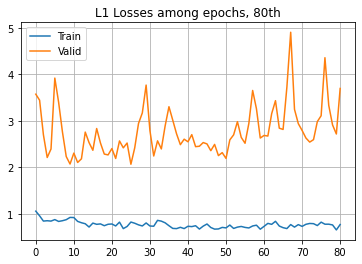

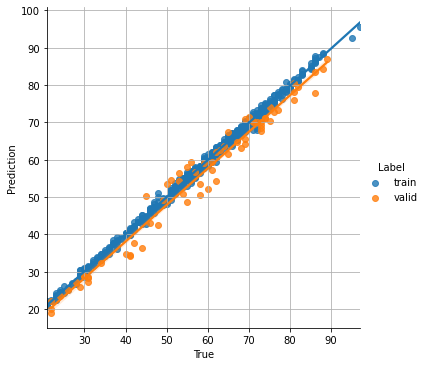

FOLD 5
EPOCHS 81
RMSE :: [TRAIN] 0.800 | [VALID] 2.816
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 82
RMSE :: [TRAIN] 0.843 | [VALID] 2.968
CORR :: [TRAIN] 0.998 | [VALID] 0.988
FOLD 5
EPOCHS 83
RMSE :: [TRAIN] 0.728 | [VALID] 2.810
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 84
RMSE :: [TRAIN] 0.783 | [VALID] 2.733
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 85
RMSE :: [TRAIN] 0.672 | [VALID] 2.461
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 86
RMSE :: [TRAIN] 0.749 | [VALID] 2.505
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 87
RMSE :: [TRAIN] 0.752 | [VALID] 2.497
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 5
EPOCHS 88
RMSE :: [TRAIN] 0.744 | [VALID] 3.006
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 89
RMSE :: [TRAIN] 0.806 | [VALID] 2.637
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 5
EPOCHS 90
RMSE :: [TRAIN] 0.739 | [VALID] 2.840
CORR :: [TRAIN] 0.999 | [VALID] 0.988


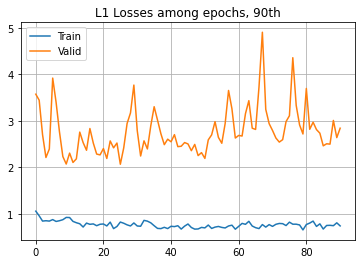

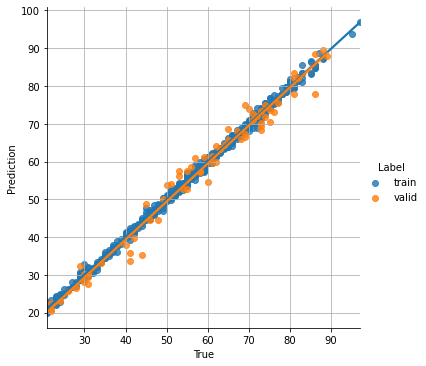

FOLD 5
EPOCHS 91
RMSE :: [TRAIN] 0.658 | [VALID] 2.717
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 92
RMSE :: [TRAIN] 0.749 | [VALID] 2.912
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 93
RMSE :: [TRAIN] 0.679 | [VALID] 2.755
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 5
EPOCHS 94
RMSE :: [TRAIN] 0.774 | [VALID] 2.730
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 5
EPOCHS 95
RMSE :: [TRAIN] 0.842 | [VALID] 3.539
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 5
EPOCHS 96
RMSE :: [TRAIN] 0.685 | [VALID] 5.461
CORR :: [TRAIN] 0.999 | [VALID] 0.972
FOLD 5
EPOCHS 97
RMSE :: [TRAIN] 0.695 | [VALID] 3.278
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 5
EPOCHS 98
RMSE :: [TRAIN] 0.766 | [VALID] 3.705
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 5
EPOCHS 99
RMSE :: [TRAIN] 0.754 | [VALID] 4.573
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 5
RMSE :: [TEST] 9.234
CORR :: [TEST] 0.825


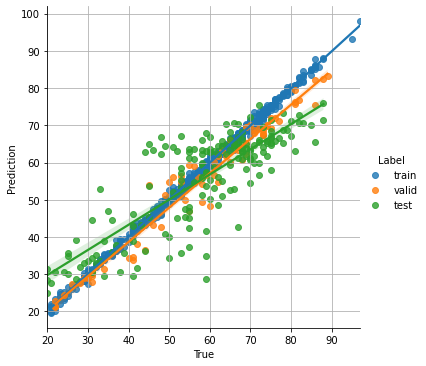

FOLD 6
EPOCHS 0
RMSE :: [TRAIN] 1.033 | [VALID] 2.880
CORR :: [TRAIN] 0.997 | [VALID] 0.991


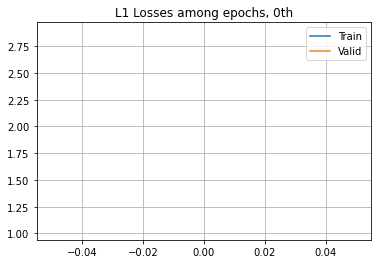

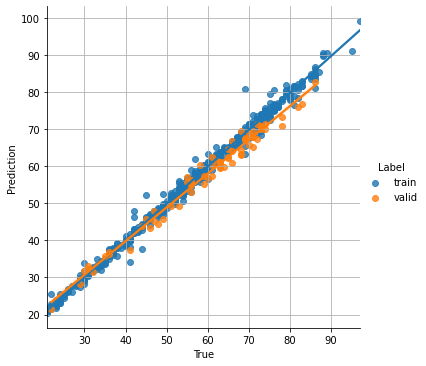

FOLD 6
EPOCHS 1
RMSE :: [TRAIN] 0.889 | [VALID] 2.769
CORR :: [TRAIN] 0.998 | [VALID] 0.992
FOLD 6
EPOCHS 2
RMSE :: [TRAIN] 0.836 | [VALID] 2.591
CORR :: [TRAIN] 0.998 | [VALID] 0.993
FOLD 6
EPOCHS 3
RMSE :: [TRAIN] 0.879 | [VALID] 2.477
CORR :: [TRAIN] 0.998 | [VALID] 0.991
FOLD 6
EPOCHS 4
RMSE :: [TRAIN] 0.864 | [VALID] 2.328
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 6
EPOCHS 5
RMSE :: [TRAIN] 0.854 | [VALID] 2.830
CORR :: [TRAIN] 0.998 | [VALID] 0.989
FOLD 6
EPOCHS 6
RMSE :: [TRAIN] 0.857 | [VALID] 2.187
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 6
EPOCHS 7
RMSE :: [TRAIN] 0.777 | [VALID] 2.389
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 8
RMSE :: [TRAIN] 0.831 | [VALID] 2.122
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 6
EPOCHS 9
RMSE :: [TRAIN] 0.744 | [VALID] 2.068
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 10
RMSE :: [TRAIN] 0.772 | [VALID] 2.137
CORR :: [TRAIN] 0.999 | [VALID] 0.992


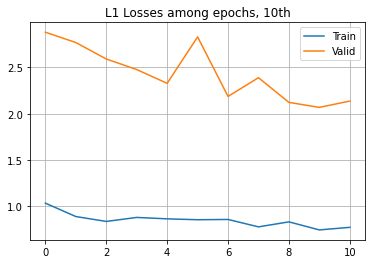

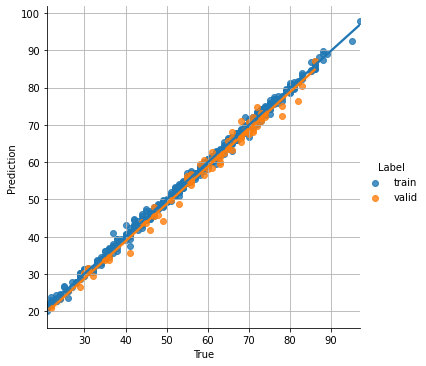

FOLD 6
EPOCHS 11
RMSE :: [TRAIN] 0.785 | [VALID] 2.824
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 12
RMSE :: [TRAIN] 0.837 | [VALID] 2.052
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 6
EPOCHS 13
RMSE :: [TRAIN] 0.893 | [VALID] 3.946
CORR :: [TRAIN] 0.998 | [VALID] 0.986
FOLD 6
EPOCHS 14
RMSE :: [TRAIN] 0.881 | [VALID] 2.755
CORR :: [TRAIN] 0.998 | [VALID] 0.988
FOLD 6
EPOCHS 15
RMSE :: [TRAIN] 0.847 | [VALID] 1.871
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 16
RMSE :: [TRAIN] 0.732 | [VALID] 2.022
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 17
RMSE :: [TRAIN] 0.728 | [VALID] 2.054
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 18
RMSE :: [TRAIN] 0.731 | [VALID] 2.254
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 19
RMSE :: [TRAIN] 0.784 | [VALID] 2.113
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 20
RMSE :: [TRAIN] 0.836 | [VALID] 2.356
CORR :: [TRAIN] 0.999 | [VALID] 0.990


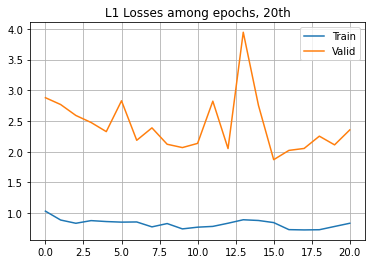

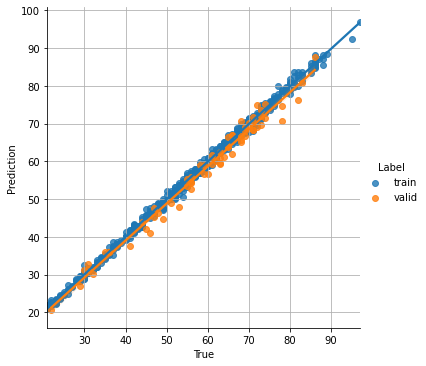

FOLD 6
EPOCHS 21
RMSE :: [TRAIN] 0.700 | [VALID] 2.186
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 22
RMSE :: [TRAIN] 0.725 | [VALID] 1.945
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 23
RMSE :: [TRAIN] 0.776 | [VALID] 2.111
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 6
EPOCHS 24
RMSE :: [TRAIN] 0.720 | [VALID] 2.122
CORR :: [TRAIN] 0.999 | [VALID] 0.993
FOLD 6
EPOCHS 25
RMSE :: [TRAIN] 0.707 | [VALID] 3.117
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 26
RMSE :: [TRAIN] 0.724 | [VALID] 2.398
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 27
RMSE :: [TRAIN] 0.789 | [VALID] 2.522
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 28
RMSE :: [TRAIN] 0.734 | [VALID] 2.445
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 29
RMSE :: [TRAIN] 0.723 | [VALID] 2.378
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 30
RMSE :: [TRAIN] 0.747 | [VALID] 2.782
CORR :: [TRAIN] 0.999 | [VALID] 0.991


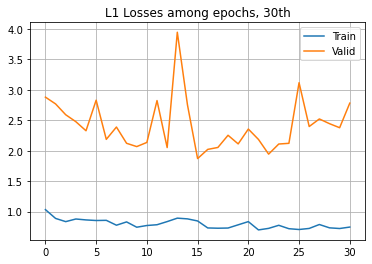

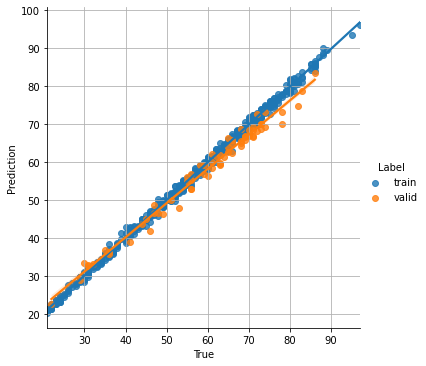

FOLD 6
EPOCHS 31
RMSE :: [TRAIN] 0.582 | [VALID] 3.275
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 6
EPOCHS 32
RMSE :: [TRAIN] 0.685 | [VALID] 2.754
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 6
EPOCHS 33
RMSE :: [TRAIN] 0.753 | [VALID] 3.895
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 6
EPOCHS 34
RMSE :: [TRAIN] 0.657 | [VALID] 2.265
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 35
RMSE :: [TRAIN] 0.681 | [VALID] 1.948
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 36
RMSE :: [TRAIN] 0.669 | [VALID] 2.658
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 37
RMSE :: [TRAIN] 0.690 | [VALID] 2.683
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 38
RMSE :: [TRAIN] 0.663 | [VALID] 2.652
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 6
EPOCHS 39
RMSE :: [TRAIN] 0.582 | [VALID] 1.984
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 6
EPOCHS 40
RMSE :: [TRAIN] 0.690 | [VALID] 1.921
CORR :: [TRAIN] 0.999 | [VALID] 0.992


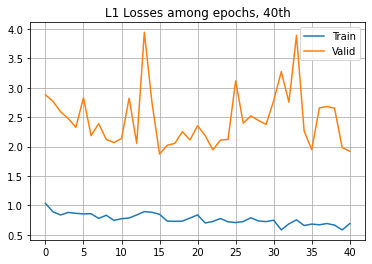

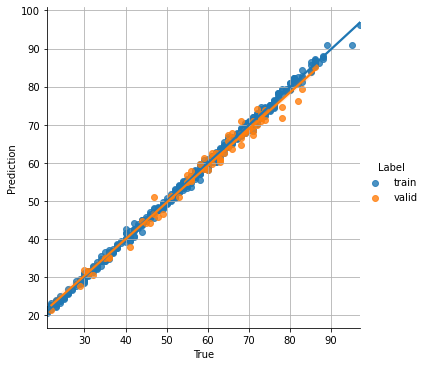

FOLD 6
EPOCHS 41
RMSE :: [TRAIN] 0.667 | [VALID] 3.294
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 6
EPOCHS 42
RMSE :: [TRAIN] 0.659 | [VALID] 2.127
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 43
RMSE :: [TRAIN] 0.602 | [VALID] 1.924
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 44
RMSE :: [TRAIN] 0.626 | [VALID] 1.973
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 45
RMSE :: [TRAIN] 0.657 | [VALID] 3.589
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 6
EPOCHS 46
RMSE :: [TRAIN] 0.638 | [VALID] 3.292
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 6
EPOCHS 47
RMSE :: [TRAIN] 0.688 | [VALID] 2.071
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 6
EPOCHS 48
RMSE :: [TRAIN] 0.678 | [VALID] 2.139
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 49
RMSE :: [TRAIN] 0.769 | [VALID] 2.078
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 50
RMSE :: [TRAIN] 0.712 | [VALID] 2.155
CORR :: [TRAIN] 0.999 | [VALID] 0.992


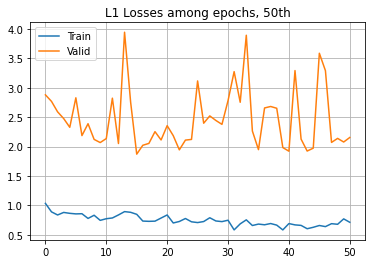

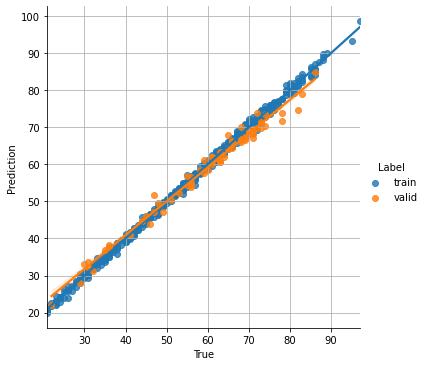

FOLD 6
EPOCHS 51
RMSE :: [TRAIN] 0.680 | [VALID] 3.639
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 52
RMSE :: [TRAIN] 0.624 | [VALID] 3.328
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 53
RMSE :: [TRAIN] 0.715 | [VALID] 2.016
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 54
RMSE :: [TRAIN] 0.627 | [VALID] 4.765
CORR :: [TRAIN] 0.999 | [VALID] 0.976
FOLD 6
EPOCHS 55
RMSE :: [TRAIN] 0.651 | [VALID] 2.395
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 56
RMSE :: [TRAIN] 0.611 | [VALID] 3.035
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 57
RMSE :: [TRAIN] 0.638 | [VALID] 2.669
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 58
RMSE :: [TRAIN] 0.698 | [VALID] 3.800
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 6
EPOCHS 59
RMSE :: [TRAIN] 0.674 | [VALID] 3.353
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 60
RMSE :: [TRAIN] 0.578 | [VALID] 3.105
CORR :: [TRAIN] 0.999 | [VALID] 0.990


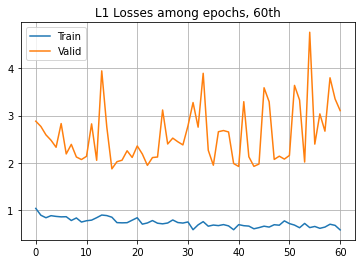

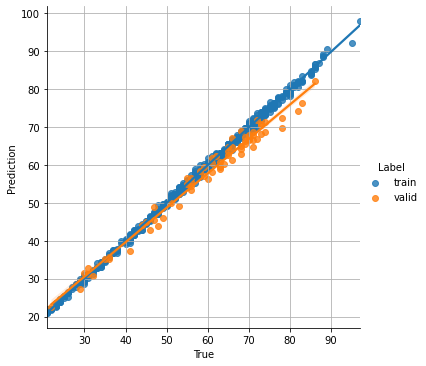

FOLD 6
EPOCHS 61
RMSE :: [TRAIN] 0.741 | [VALID] 2.316
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 6
EPOCHS 62
RMSE :: [TRAIN] 0.666 | [VALID] 2.365
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 6
EPOCHS 63
RMSE :: [TRAIN] 0.610 | [VALID] 2.628
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 64
RMSE :: [TRAIN] 0.667 | [VALID] 2.359
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 65
RMSE :: [TRAIN] 0.615 | [VALID] 2.129
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 66
RMSE :: [TRAIN] 0.671 | [VALID] 2.376
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 67
RMSE :: [TRAIN] 0.736 | [VALID] 2.736
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 6
EPOCHS 68
RMSE :: [TRAIN] 0.652 | [VALID] 2.548
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 69
RMSE :: [TRAIN] 0.617 | [VALID] 2.998
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 6
EPOCHS 70
RMSE :: [TRAIN] 0.655 | [VALID] 3.053
CORR :: [TRAIN] 0.999 | [VALID] 0.985


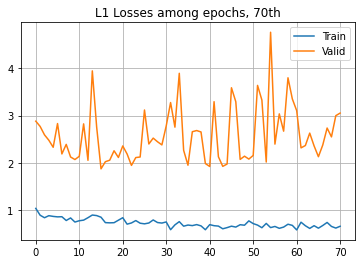

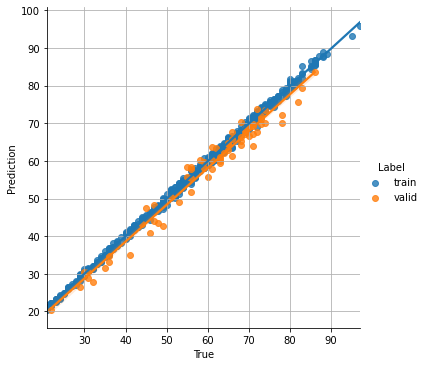

FOLD 6
EPOCHS 71
RMSE :: [TRAIN] 0.615 | [VALID] 3.970
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 6
EPOCHS 72
RMSE :: [TRAIN] 0.626 | [VALID] 2.197
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 73
RMSE :: [TRAIN] 0.704 | [VALID] 2.163
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 6
EPOCHS 74
RMSE :: [TRAIN] 0.697 | [VALID] 2.384
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 6
EPOCHS 75
RMSE :: [TRAIN] 0.742 | [VALID] 2.292
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 76
RMSE :: [TRAIN] 0.659 | [VALID] 2.175
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 77
RMSE :: [TRAIN] 0.578 | [VALID] 2.083
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 78
RMSE :: [TRAIN] 0.615 | [VALID] 2.322
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 6
EPOCHS 79
RMSE :: [TRAIN] 0.599 | [VALID] 2.652
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 80
RMSE :: [TRAIN] 0.594 | [VALID] 2.685
CORR :: [TRAIN] 0.999 | [VALID] 0.988


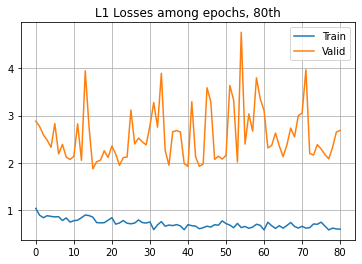

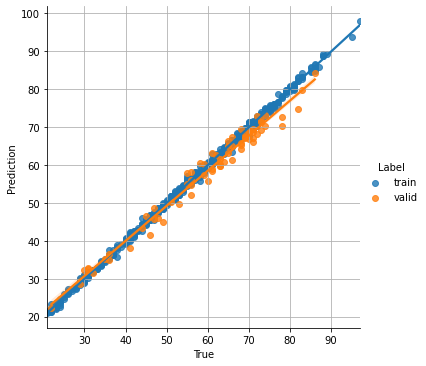

FOLD 6
EPOCHS 81
RMSE :: [TRAIN] 0.608 | [VALID] 4.631
CORR :: [TRAIN] 0.999 | [VALID] 0.977
FOLD 6
EPOCHS 82
RMSE :: [TRAIN] 0.645 | [VALID] 3.081
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 83
RMSE :: [TRAIN] 0.623 | [VALID] 3.346
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 6
EPOCHS 84
RMSE :: [TRAIN] 0.645 | [VALID] 2.895
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 6
EPOCHS 85
RMSE :: [TRAIN] 0.672 | [VALID] 2.603
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 6
EPOCHS 86
RMSE :: [TRAIN] 0.614 | [VALID] 3.370
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 6
EPOCHS 87
RMSE :: [TRAIN] 0.642 | [VALID] 3.320
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 88
RMSE :: [TRAIN] 0.653 | [VALID] 2.597
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 6
EPOCHS 89
RMSE :: [TRAIN] 0.709 | [VALID] 2.321
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 90
RMSE :: [TRAIN] 0.708 | [VALID] 2.529
CORR :: [TRAIN] 0.999 | [VALID] 0.984


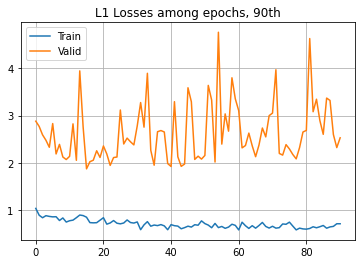

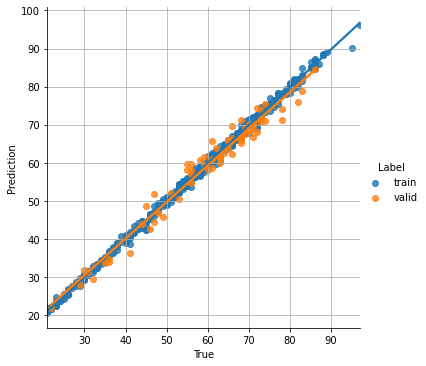

FOLD 6
EPOCHS 91
RMSE :: [TRAIN] 0.647 | [VALID] 3.132
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 6
EPOCHS 92
RMSE :: [TRAIN] 0.661 | [VALID] 2.929
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 6
EPOCHS 93
RMSE :: [TRAIN] 0.684 | [VALID] 2.468
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 94
RMSE :: [TRAIN] 0.589 | [VALID] 2.537
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 6
EPOCHS 95
RMSE :: [TRAIN] 0.576 | [VALID] 3.013
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 6
EPOCHS 96
RMSE :: [TRAIN] 0.570 | [VALID] 2.460
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 6
EPOCHS 97
RMSE :: [TRAIN] 0.673 | [VALID] 2.158
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 98
RMSE :: [TRAIN] 0.666 | [VALID] 2.306
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 6
EPOCHS 99
RMSE :: [TRAIN] 0.737 | [VALID] 2.258
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 6
RMSE :: [TEST] 8.730
CORR :: [TEST] 0.833


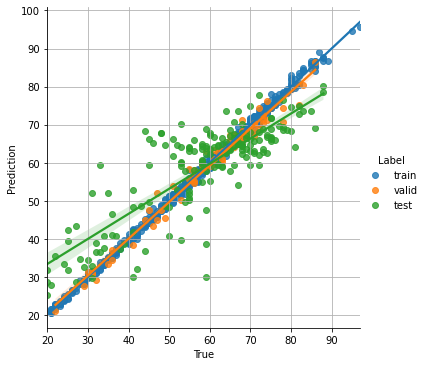

FOLD 7
EPOCHS 0
RMSE :: [TRAIN] 0.957 | [VALID] 2.556
CORR :: [TRAIN] 0.997 | [VALID] 0.986


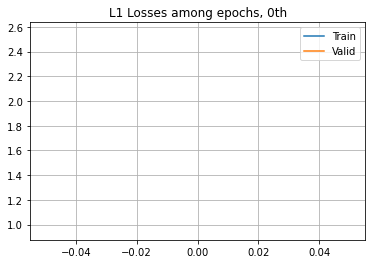

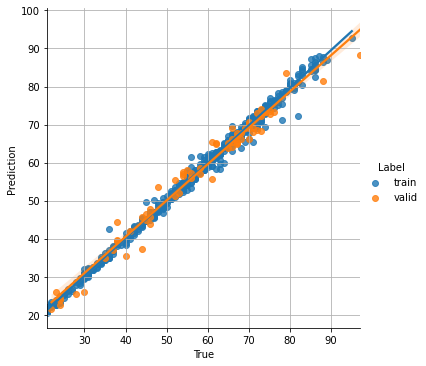

FOLD 7
EPOCHS 1
RMSE :: [TRAIN] 0.858 | [VALID] 2.770
CORR :: [TRAIN] 0.998 | [VALID] 0.984
FOLD 7
EPOCHS 2
RMSE :: [TRAIN] 0.765 | [VALID] 2.996
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 3
RMSE :: [TRAIN] 0.788 | [VALID] 3.486
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 4
RMSE :: [TRAIN] 0.755 | [VALID] 2.947
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 5
RMSE :: [TRAIN] 0.751 | [VALID] 3.323
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 6
RMSE :: [TRAIN] 0.751 | [VALID] 3.329
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 7
RMSE :: [TRAIN] 0.710 | [VALID] 3.041
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 8
RMSE :: [TRAIN] 0.777 | [VALID] 3.214
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 9
RMSE :: [TRAIN] 0.710 | [VALID] 3.540
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 10
RMSE :: [TRAIN] 0.766 | [VALID] 3.247
CORR :: [TRAIN] 0.999 | [VALID] 0.984


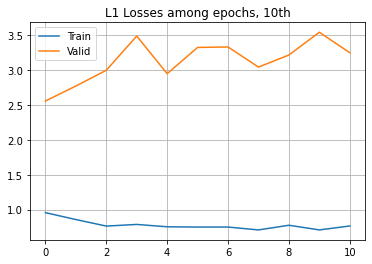

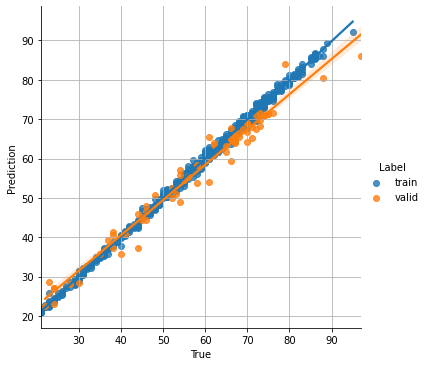

FOLD 7
EPOCHS 11
RMSE :: [TRAIN] 0.711 | [VALID] 2.841
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 12
RMSE :: [TRAIN] 0.673 | [VALID] 2.657
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 13
RMSE :: [TRAIN] 0.643 | [VALID] 2.800
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 14
RMSE :: [TRAIN] 0.718 | [VALID] 3.306
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 15
RMSE :: [TRAIN] 0.652 | [VALID] 3.422
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 16
RMSE :: [TRAIN] 0.607 | [VALID] 2.775
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 17
RMSE :: [TRAIN] 0.641 | [VALID] 2.849
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 18
RMSE :: [TRAIN] 0.676 | [VALID] 3.053
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 19
RMSE :: [TRAIN] 0.576 | [VALID] 3.084
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 20
RMSE :: [TRAIN] 0.678 | [VALID] 3.153
CORR :: [TRAIN] 0.999 | [VALID] 0.981


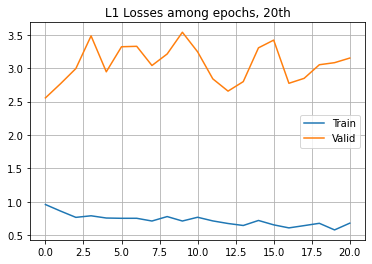

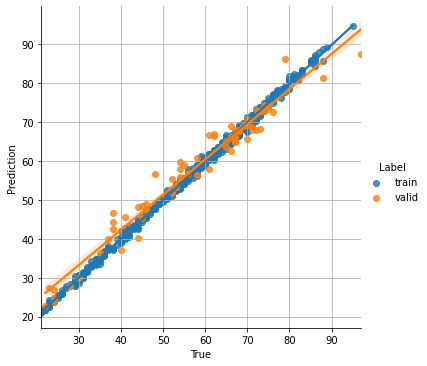

FOLD 7
EPOCHS 21
RMSE :: [TRAIN] 0.623 | [VALID] 2.641
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 22
RMSE :: [TRAIN] 0.677 | [VALID] 3.307
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 23
RMSE :: [TRAIN] 0.640 | [VALID] 3.069
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 24
RMSE :: [TRAIN] 0.629 | [VALID] 3.358
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 7
EPOCHS 25
RMSE :: [TRAIN] 0.601 | [VALID] 2.691
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 26
RMSE :: [TRAIN] 0.586 | [VALID] 3.181
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 27
RMSE :: [TRAIN] 0.529 | [VALID] 3.423
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 28
RMSE :: [TRAIN] 0.609 | [VALID] 3.080
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 29
RMSE :: [TRAIN] 0.631 | [VALID] 3.125
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 30
RMSE :: [TRAIN] 0.634 | [VALID] 2.808
CORR :: [TRAIN] 0.999 | [VALID] 0.987


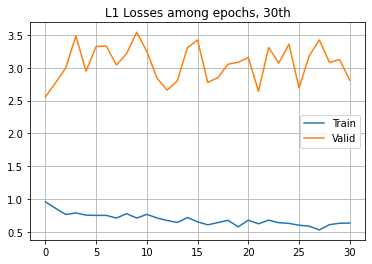

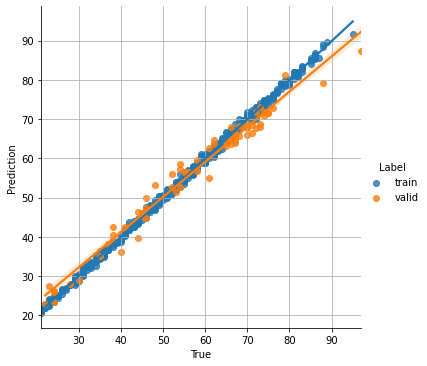

FOLD 7
EPOCHS 31
RMSE :: [TRAIN] 0.627 | [VALID] 3.319
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 32
RMSE :: [TRAIN] 0.617 | [VALID] 3.795
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 33
RMSE :: [TRAIN] 0.625 | [VALID] 3.242
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 34
RMSE :: [TRAIN] 0.622 | [VALID] 2.864
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 35
RMSE :: [TRAIN] 0.636 | [VALID] 3.707
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 7
EPOCHS 36
RMSE :: [TRAIN] 0.651 | [VALID] 3.120
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 37
RMSE :: [TRAIN] 0.680 | [VALID] 3.243
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 7
EPOCHS 38
RMSE :: [TRAIN] 0.641 | [VALID] 3.487
CORR :: [TRAIN] 0.999 | [VALID] 0.979
FOLD 7
EPOCHS 39
RMSE :: [TRAIN] 0.669 | [VALID] 3.309
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 40
RMSE :: [TRAIN] 0.671 | [VALID] 3.378
CORR :: [TRAIN] 0.999 | [VALID] 0.984


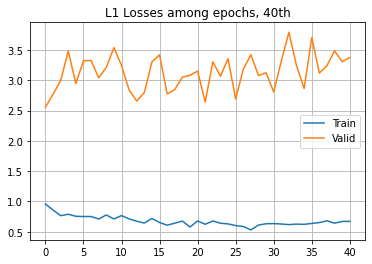

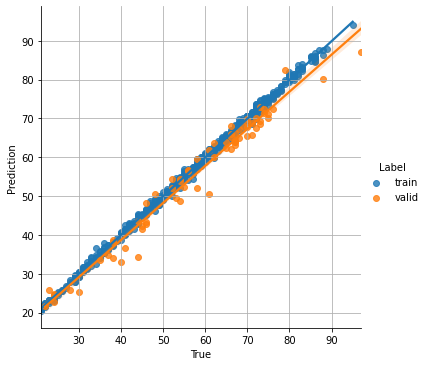

FOLD 7
EPOCHS 41
RMSE :: [TRAIN] 0.605 | [VALID] 2.775
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 42
RMSE :: [TRAIN] 0.544 | [VALID] 2.966
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 43
RMSE :: [TRAIN] 0.712 | [VALID] 2.868
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 44
RMSE :: [TRAIN] 0.671 | [VALID] 2.873
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 45
RMSE :: [TRAIN] 0.643 | [VALID] 2.905
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 46
RMSE :: [TRAIN] 0.674 | [VALID] 2.909
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 47
RMSE :: [TRAIN] 0.624 | [VALID] 2.827
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 48
RMSE :: [TRAIN] 0.590 | [VALID] 3.070
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 49
RMSE :: [TRAIN] 0.688 | [VALID] 2.770
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 7
EPOCHS 50
RMSE :: [TRAIN] 0.569 | [VALID] 2.800
CORR :: [TRAIN] 0.999 | [VALID] 0.986


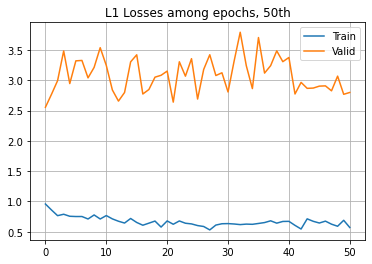

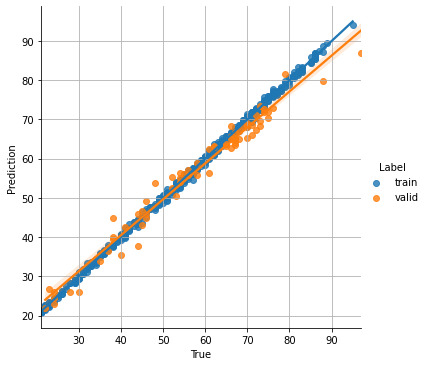

FOLD 7
EPOCHS 51
RMSE :: [TRAIN] 0.644 | [VALID] 2.907
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 52
RMSE :: [TRAIN] 0.623 | [VALID] 3.052
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 7
EPOCHS 53
RMSE :: [TRAIN] 0.553 | [VALID] 3.015
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 54
RMSE :: [TRAIN] 0.547 | [VALID] 2.856
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 55
RMSE :: [TRAIN] 0.618 | [VALID] 3.132
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 56
RMSE :: [TRAIN] 0.582 | [VALID] 3.260
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 57
RMSE :: [TRAIN] 0.598 | [VALID] 3.864
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 58
RMSE :: [TRAIN] 0.609 | [VALID] 3.233
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 59
RMSE :: [TRAIN] 0.576 | [VALID] 3.052
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 60
RMSE :: [TRAIN] 0.570 | [VALID] 3.514
CORR :: [TRAIN] 0.999 | [VALID] 0.982


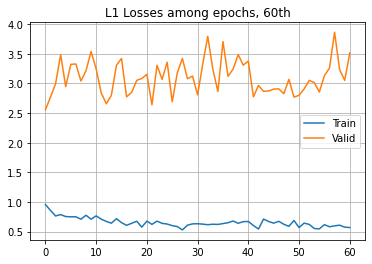

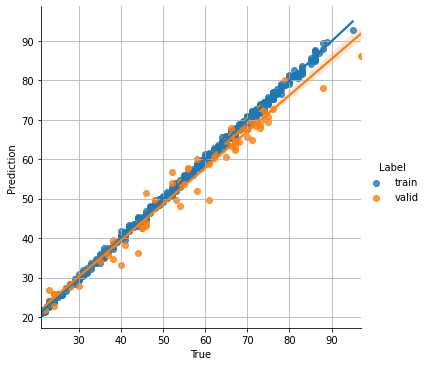

FOLD 7
EPOCHS 61
RMSE :: [TRAIN] 0.595 | [VALID] 2.970
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 62
RMSE :: [TRAIN] 0.579 | [VALID] 2.690
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 63
RMSE :: [TRAIN] 0.601 | [VALID] 2.897
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 64
RMSE :: [TRAIN] 0.595 | [VALID] 3.159
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 65
RMSE :: [TRAIN] 0.539 | [VALID] 3.357
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 66
RMSE :: [TRAIN] 0.565 | [VALID] 3.251
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 7
EPOCHS 67
RMSE :: [TRAIN] 0.569 | [VALID] 3.328
CORR :: [TRAIN] 0.999 | [VALID] 0.979
FOLD 7
EPOCHS 68
RMSE :: [TRAIN] 0.616 | [VALID] 2.955
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 69
RMSE :: [TRAIN] 0.629 | [VALID] 2.848
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 70
RMSE :: [TRAIN] 0.577 | [VALID] 3.734
CORR :: [TRAIN] 0.999 | [VALID] 0.983


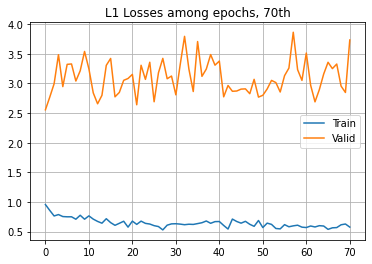

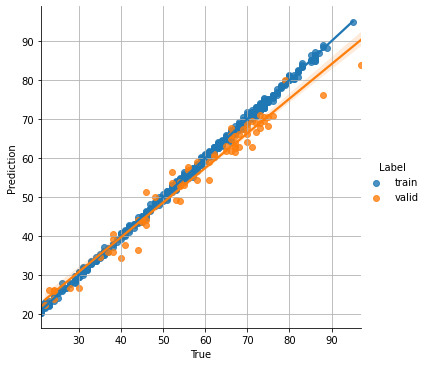

FOLD 7
EPOCHS 71
RMSE :: [TRAIN] 0.577 | [VALID] 2.943
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 72
RMSE :: [TRAIN] 0.601 | [VALID] 2.861
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 73
RMSE :: [TRAIN] 0.636 | [VALID] 2.966
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 74
RMSE :: [TRAIN] 0.567 | [VALID] 2.728
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 75
RMSE :: [TRAIN] 0.636 | [VALID] 2.878
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 7
EPOCHS 76
RMSE :: [TRAIN] 0.550 | [VALID] 3.084
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 77
RMSE :: [TRAIN] 0.553 | [VALID] 3.568
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 78
RMSE :: [TRAIN] 0.599 | [VALID] 2.986
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 79
RMSE :: [TRAIN] 0.548 | [VALID] 2.862
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 80
RMSE :: [TRAIN] 0.602 | [VALID] 2.836
CORR :: [TRAIN] 0.999 | [VALID] 0.986


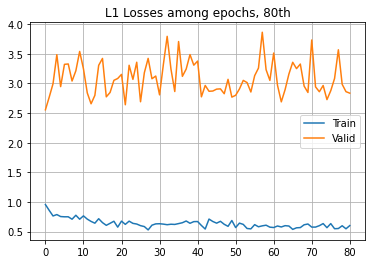

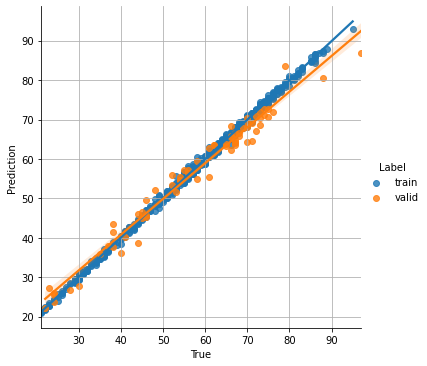

FOLD 7
EPOCHS 81
RMSE :: [TRAIN] 0.537 | [VALID] 3.536
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 82
RMSE :: [TRAIN] 0.548 | [VALID] 3.301
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 83
RMSE :: [TRAIN] 0.595 | [VALID] 3.174
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 84
RMSE :: [TRAIN] 0.547 | [VALID] 3.009
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 85
RMSE :: [TRAIN] 0.499 | [VALID] 3.098
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 86
RMSE :: [TRAIN] 0.568 | [VALID] 3.398
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 87
RMSE :: [TRAIN] 0.527 | [VALID] 3.531
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 88
RMSE :: [TRAIN] 0.561 | [VALID] 3.848
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 89
RMSE :: [TRAIN] 0.542 | [VALID] 2.723
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 90
RMSE :: [TRAIN] 0.587 | [VALID] 2.844
CORR :: [TRAIN] 0.999 | [VALID] 0.984


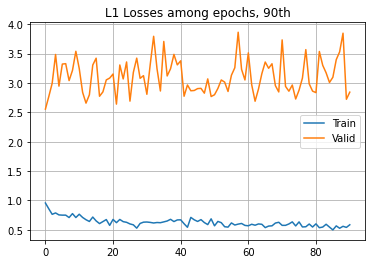

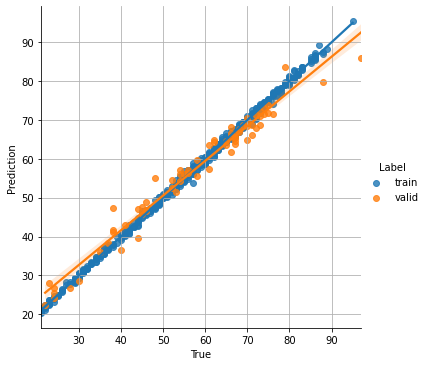

FOLD 7
EPOCHS 91
RMSE :: [TRAIN] 0.619 | [VALID] 2.972
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 7
EPOCHS 92
RMSE :: [TRAIN] 0.589 | [VALID] 3.109
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 93
RMSE :: [TRAIN] 0.518 | [VALID] 3.131
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 94
RMSE :: [TRAIN] 0.563 | [VALID] 2.977
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 7
EPOCHS 95
RMSE :: [TRAIN] 0.560 | [VALID] 2.978
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 7
EPOCHS 96
RMSE :: [TRAIN] 0.610 | [VALID] 2.938
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 97
RMSE :: [TRAIN] 0.500 | [VALID] 3.083
CORR :: [TRAIN] 1.000 | [VALID] 0.984
FOLD 7
EPOCHS 98
RMSE :: [TRAIN] 0.532 | [VALID] 3.083
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
EPOCHS 99
RMSE :: [TRAIN] 0.577 | [VALID] 3.067
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 7
RMSE :: [TEST] 8.697
CORR :: [TEST] 0.836


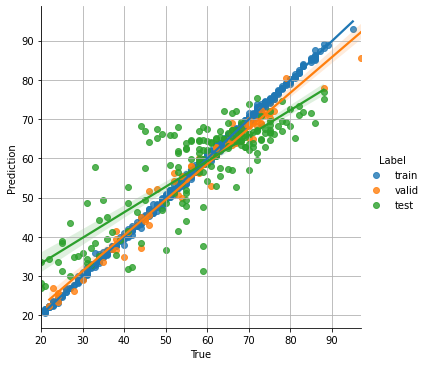

FOLD 8
EPOCHS 0
RMSE :: [TRAIN] 0.831 | [VALID] 2.037
CORR :: [TRAIN] 0.997 | [VALID] 0.991


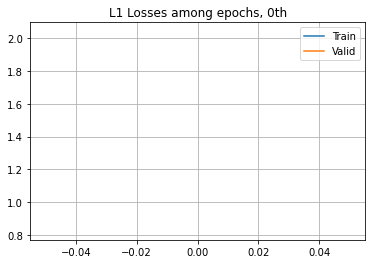

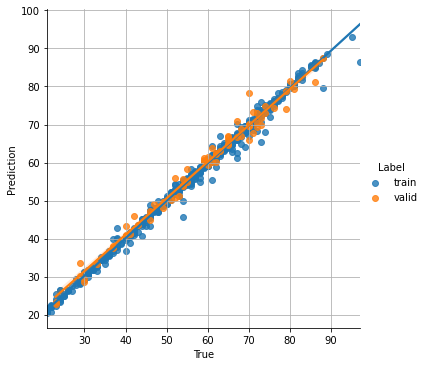

FOLD 8
EPOCHS 1
RMSE :: [TRAIN] 0.768 | [VALID] 2.032
CORR :: [TRAIN] 0.998 | [VALID] 0.990
FOLD 8
EPOCHS 2
RMSE :: [TRAIN] 0.749 | [VALID] 2.167
CORR :: [TRAIN] 0.998 | [VALID] 0.991
FOLD 8
EPOCHS 3
RMSE :: [TRAIN] 0.782 | [VALID] 3.064
CORR :: [TRAIN] 0.998 | [VALID] 0.989
FOLD 8
EPOCHS 4
RMSE :: [TRAIN] 0.677 | [VALID] 3.134
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 5
RMSE :: [TRAIN] 0.701 | [VALID] 1.980
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 6
RMSE :: [TRAIN] 0.648 | [VALID] 2.280
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 7
RMSE :: [TRAIN] 0.592 | [VALID] 2.174
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 8
RMSE :: [TRAIN] 0.588 | [VALID] 2.593
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 9
RMSE :: [TRAIN] 0.635 | [VALID] 2.007
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 10
RMSE :: [TRAIN] 0.578 | [VALID] 2.037
CORR :: [TRAIN] 0.999 | [VALID] 0.991


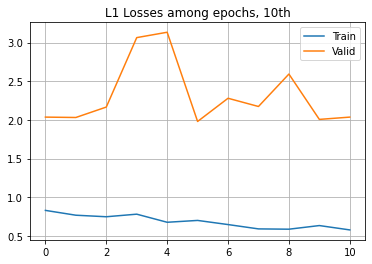

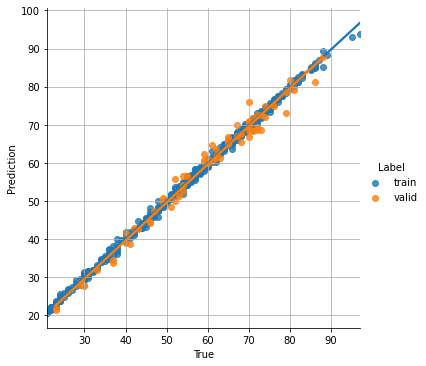

FOLD 8
EPOCHS 11
RMSE :: [TRAIN] 0.624 | [VALID] 1.922
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 12
RMSE :: [TRAIN] 0.587 | [VALID] 2.515
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 13
RMSE :: [TRAIN] 0.621 | [VALID] 1.899
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 14
RMSE :: [TRAIN] 0.613 | [VALID] 2.144
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 15
RMSE :: [TRAIN] 0.582 | [VALID] 2.191
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 16
RMSE :: [TRAIN] 0.564 | [VALID] 2.255
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 17
RMSE :: [TRAIN] 0.696 | [VALID] 2.375
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 18
RMSE :: [TRAIN] 0.559 | [VALID] 2.011
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 19
RMSE :: [TRAIN] 0.600 | [VALID] 2.117
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 20
RMSE :: [TRAIN] 0.569 | [VALID] 2.097
CORR :: [TRAIN] 0.999 | [VALID] 0.991


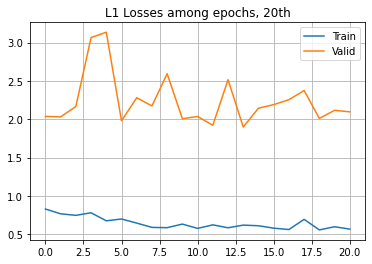

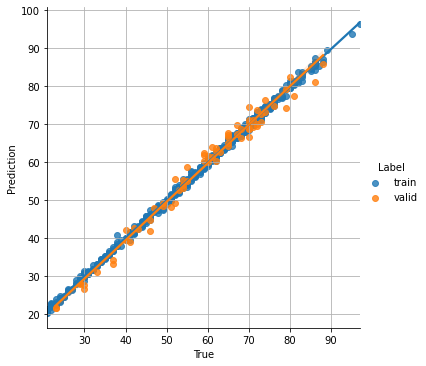

FOLD 8
EPOCHS 21
RMSE :: [TRAIN] 0.593 | [VALID] 2.063
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 22
RMSE :: [TRAIN] 0.615 | [VALID] 2.282
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 23
RMSE :: [TRAIN] 0.603 | [VALID] 2.148
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 24
RMSE :: [TRAIN] 0.637 | [VALID] 2.039
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 25
RMSE :: [TRAIN] 0.630 | [VALID] 2.119
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 26
RMSE :: [TRAIN] 0.632 | [VALID] 2.320
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 27
RMSE :: [TRAIN] 0.565 | [VALID] 2.092
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 28
RMSE :: [TRAIN] 0.604 | [VALID] 2.200
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 29
RMSE :: [TRAIN] 0.547 | [VALID] 2.316
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 30
RMSE :: [TRAIN] 0.548 | [VALID] 2.214
CORR :: [TRAIN] 0.999 | [VALID] 0.991


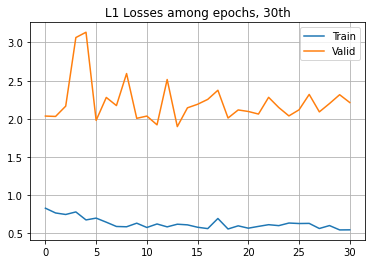

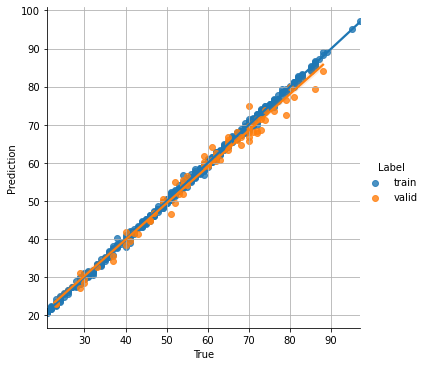

FOLD 8
EPOCHS 31
RMSE :: [TRAIN] 0.566 | [VALID] 2.029
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 32
RMSE :: [TRAIN] 0.522 | [VALID] 2.320
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 33
RMSE :: [TRAIN] 0.589 | [VALID] 2.255
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 34
RMSE :: [TRAIN] 0.506 | [VALID] 2.163
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 35
RMSE :: [TRAIN] 0.586 | [VALID] 2.120
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 36
RMSE :: [TRAIN] 0.565 | [VALID] 1.916
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 37
RMSE :: [TRAIN] 0.572 | [VALID] 2.094
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 38
RMSE :: [TRAIN] 0.529 | [VALID] 2.120
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 39
RMSE :: [TRAIN] 0.549 | [VALID] 2.406
CORR :: [TRAIN] 0.999 | [VALID] 0.991
FOLD 8
EPOCHS 40
RMSE :: [TRAIN] 0.539 | [VALID] 2.601
CORR :: [TRAIN] 0.999 | [VALID] 0.988


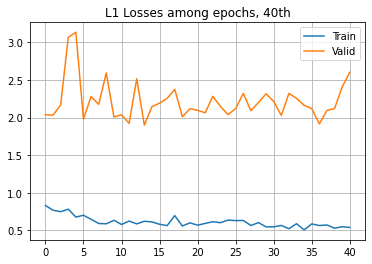

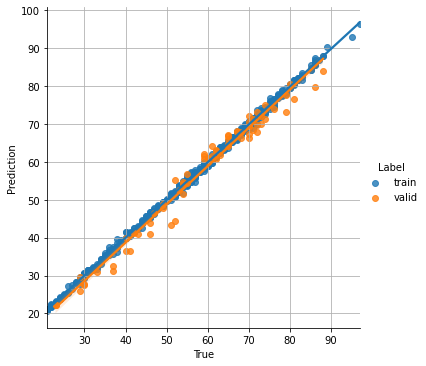

FOLD 8
EPOCHS 41
RMSE :: [TRAIN] 0.542 | [VALID] 2.224
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 42
RMSE :: [TRAIN] 0.546 | [VALID] 2.133
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 43
RMSE :: [TRAIN] 0.573 | [VALID] 1.877
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 44
RMSE :: [TRAIN] 0.643 | [VALID] 2.219
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 45
RMSE :: [TRAIN] 0.491 | [VALID] 2.423
CORR :: [TRAIN] 1.000 | [VALID] 0.990
FOLD 8
EPOCHS 46
RMSE :: [TRAIN] 0.579 | [VALID] 2.283
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 47
RMSE :: [TRAIN] 0.595 | [VALID] 2.255
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 48
RMSE :: [TRAIN] 0.585 | [VALID] 2.429
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 49
RMSE :: [TRAIN] 0.598 | [VALID] 2.129
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 50
RMSE :: [TRAIN] 0.562 | [VALID] 2.127
CORR :: [TRAIN] 0.999 | [VALID] 0.990


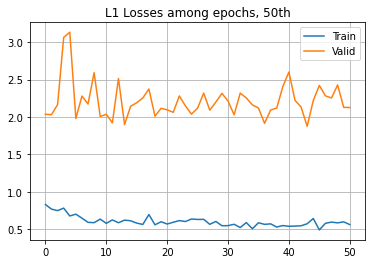

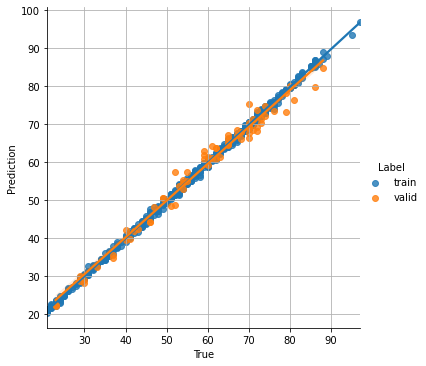

FOLD 8
EPOCHS 51
RMSE :: [TRAIN] 0.610 | [VALID] 2.183
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 52
RMSE :: [TRAIN] 0.537 | [VALID] 2.148
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 53
RMSE :: [TRAIN] 0.555 | [VALID] 2.111
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 54
RMSE :: [TRAIN] 0.553 | [VALID] 2.322
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 8
EPOCHS 55
RMSE :: [TRAIN] 0.577 | [VALID] 2.390
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 8
EPOCHS 56
RMSE :: [TRAIN] 0.619 | [VALID] 2.577
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 57
RMSE :: [TRAIN] 0.608 | [VALID] 2.403
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 58
RMSE :: [TRAIN] 0.651 | [VALID] 3.068
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 8
EPOCHS 59
RMSE :: [TRAIN] 0.575 | [VALID] 2.345
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 60
RMSE :: [TRAIN] 0.556 | [VALID] 2.526
CORR :: [TRAIN] 0.999 | [VALID] 0.988


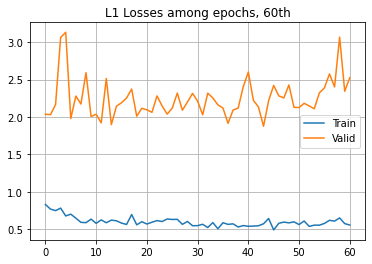

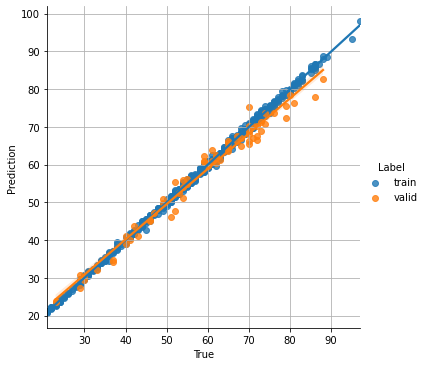

FOLD 8
EPOCHS 61
RMSE :: [TRAIN] 0.572 | [VALID] 2.368
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 62
RMSE :: [TRAIN] 0.647 | [VALID] 2.503
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 63
RMSE :: [TRAIN] 0.514 | [VALID] 2.278
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 64
RMSE :: [TRAIN] 0.537 | [VALID] 2.044
CORR :: [TRAIN] 0.999 | [VALID] 0.992
FOLD 8
EPOCHS 65
RMSE :: [TRAIN] 0.599 | [VALID] 2.332
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 66
RMSE :: [TRAIN] 0.539 | [VALID] 2.217
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 67
RMSE :: [TRAIN] 0.515 | [VALID] 2.352
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 68
RMSE :: [TRAIN] 0.565 | [VALID] 2.504
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 69
RMSE :: [TRAIN] 0.535 | [VALID] 2.306
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 70
RMSE :: [TRAIN] 0.496 | [VALID] 2.161
CORR :: [TRAIN] 1.000 | [VALID] 0.990


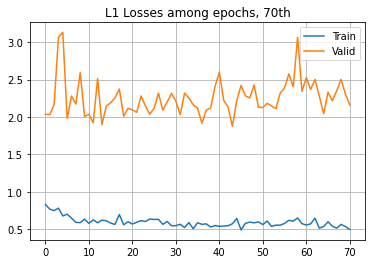

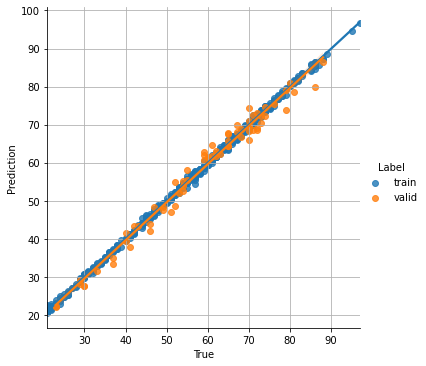

FOLD 8
EPOCHS 71
RMSE :: [TRAIN] 0.511 | [VALID] 2.110
CORR :: [TRAIN] 0.999 | [VALID] 0.990
FOLD 8
EPOCHS 72
RMSE :: [TRAIN] 0.537 | [VALID] 2.328
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 73
RMSE :: [TRAIN] 0.556 | [VALID] 2.444
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 8
EPOCHS 74
RMSE :: [TRAIN] 0.581 | [VALID] 2.320
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 75
RMSE :: [TRAIN] 0.535 | [VALID] 2.260
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 76
RMSE :: [TRAIN] 0.566 | [VALID] 2.586
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 77
RMSE :: [TRAIN] 0.650 | [VALID] 2.467
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 8
EPOCHS 78
RMSE :: [TRAIN] 0.595 | [VALID] 2.248
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 79
RMSE :: [TRAIN] 0.558 | [VALID] 2.163
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 80
RMSE :: [TRAIN] 0.556 | [VALID] 2.257
CORR :: [TRAIN] 0.999 | [VALID] 0.989


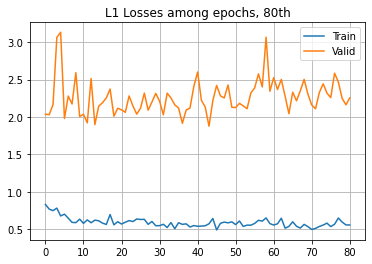

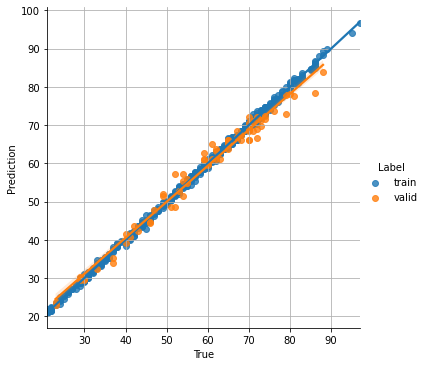

FOLD 8
EPOCHS 81
RMSE :: [TRAIN] 0.585 | [VALID] 3.302
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 8
EPOCHS 82
RMSE :: [TRAIN] 0.558 | [VALID] 2.475
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 83
RMSE :: [TRAIN] 0.535 | [VALID] 2.376
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 84
RMSE :: [TRAIN] 0.553 | [VALID] 2.583
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 8
EPOCHS 85
RMSE :: [TRAIN] 0.546 | [VALID] 2.930
CORR :: [TRAIN] 0.999 | [VALID] 0.987
FOLD 8
EPOCHS 86
RMSE :: [TRAIN] 0.553 | [VALID] 2.187
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 87
RMSE :: [TRAIN] 0.572 | [VALID] 2.210
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 88
RMSE :: [TRAIN] 0.500 | [VALID] 2.848
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 8
EPOCHS 89
RMSE :: [TRAIN] 0.540 | [VALID] 2.863
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 8
EPOCHS 90
RMSE :: [TRAIN] 0.515 | [VALID] 2.422
CORR :: [TRAIN] 0.999 | [VALID] 0.987


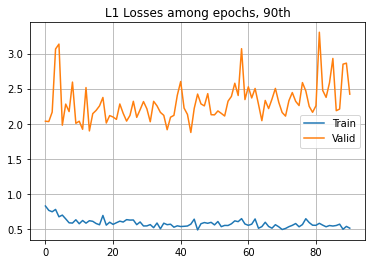

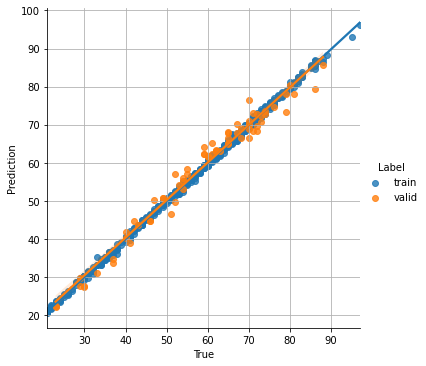

FOLD 8
EPOCHS 91
RMSE :: [TRAIN] 0.628 | [VALID] 2.213
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 92
RMSE :: [TRAIN] 0.529 | [VALID] 2.495
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 93
RMSE :: [TRAIN] 0.546 | [VALID] 2.538
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 94
RMSE :: [TRAIN] 0.580 | [VALID] 2.209
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
EPOCHS 95
RMSE :: [TRAIN] 0.484 | [VALID] 2.265
CORR :: [TRAIN] 1.000 | [VALID] 0.988
FOLD 8
EPOCHS 96
RMSE :: [TRAIN] 0.481 | [VALID] 2.263
CORR :: [TRAIN] 1.000 | [VALID] 0.989
FOLD 8
EPOCHS 97
RMSE :: [TRAIN] 0.492 | [VALID] 2.329
CORR :: [TRAIN] 1.000 | [VALID] 0.989
FOLD 8
EPOCHS 98
RMSE :: [TRAIN] 0.538 | [VALID] 2.334
CORR :: [TRAIN] 0.999 | [VALID] 0.988
FOLD 8
EPOCHS 99
RMSE :: [TRAIN] 0.522 | [VALID] 2.353
CORR :: [TRAIN] 0.999 | [VALID] 0.989
FOLD 8
RMSE :: [TEST] 8.839
CORR :: [TEST] 0.829


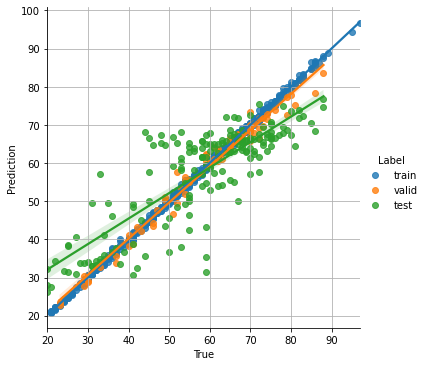

FOLD 9
EPOCHS 0
RMSE :: [TRAIN] 0.816 | [VALID] 2.650
CORR :: [TRAIN] 0.998 | [VALID] 0.983


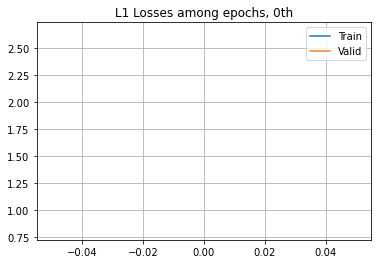

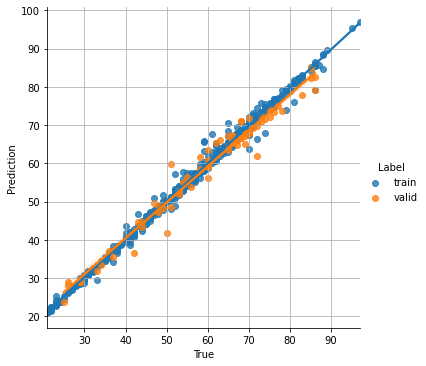

FOLD 9
EPOCHS 1
RMSE :: [TRAIN] 0.719 | [VALID] 2.485
CORR :: [TRAIN] 0.998 | [VALID] 0.985
FOLD 9
EPOCHS 2
RMSE :: [TRAIN] 0.667 | [VALID] 2.972
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 9
EPOCHS 3
RMSE :: [TRAIN] 0.675 | [VALID] 2.813
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 9
EPOCHS 4
RMSE :: [TRAIN] 0.612 | [VALID] 2.693
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 9
EPOCHS 5
RMSE :: [TRAIN] 0.532 | [VALID] 2.749
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 9
EPOCHS 6
RMSE :: [TRAIN] 0.644 | [VALID] 2.709
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 9
EPOCHS 7
RMSE :: [TRAIN] 0.627 | [VALID] 2.681
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 8
RMSE :: [TRAIN] 0.615 | [VALID] 2.609
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 9
EPOCHS 9
RMSE :: [TRAIN] 0.602 | [VALID] 3.147
CORR :: [TRAIN] 0.999 | [VALID] 0.978
FOLD 9
EPOCHS 10
RMSE :: [TRAIN] 0.578 | [VALID] 3.199
CORR :: [TRAIN] 0.999 | [VALID] 0.980


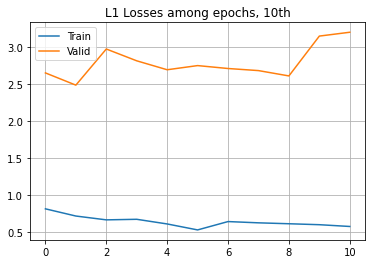

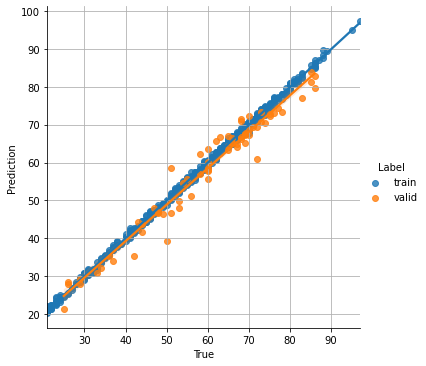

FOLD 9
EPOCHS 11
RMSE :: [TRAIN] 0.617 | [VALID] 3.459
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 12
RMSE :: [TRAIN] 0.733 | [VALID] 2.716
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 13
RMSE :: [TRAIN] 0.563 | [VALID] 2.724
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 14
RMSE :: [TRAIN] 0.651 | [VALID] 2.771
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 15
RMSE :: [TRAIN] 0.586 | [VALID] 2.657
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 16
RMSE :: [TRAIN] 0.574 | [VALID] 2.685
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 9
EPOCHS 17
RMSE :: [TRAIN] 0.559 | [VALID] 2.679
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 9
EPOCHS 18
RMSE :: [TRAIN] 0.626 | [VALID] 2.646
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 19
RMSE :: [TRAIN] 0.559 | [VALID] 3.090
CORR :: [TRAIN] 0.999 | [VALID] 0.978
FOLD 9
EPOCHS 20
RMSE :: [TRAIN] 0.541 | [VALID] 3.310
CORR :: [TRAIN] 0.999 | [VALID] 0.979


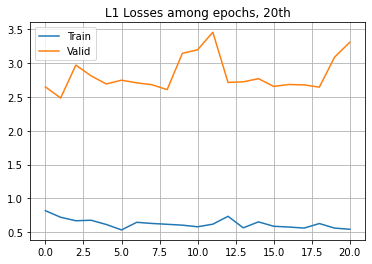

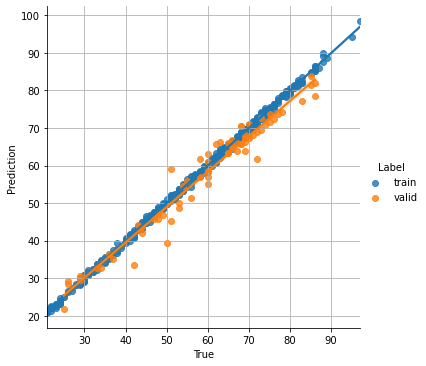

FOLD 9
EPOCHS 21
RMSE :: [TRAIN] 0.540 | [VALID] 2.714
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 9
EPOCHS 22
RMSE :: [TRAIN] 0.545 | [VALID] 3.108
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 23
RMSE :: [TRAIN] 0.579 | [VALID] 2.831
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 9
EPOCHS 24
RMSE :: [TRAIN] 0.563 | [VALID] 2.941
CORR :: [TRAIN] 0.999 | [VALID] 0.985
FOLD 9
EPOCHS 25
RMSE :: [TRAIN] 0.516 | [VALID] 2.814
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 9
EPOCHS 26
RMSE :: [TRAIN] 0.544 | [VALID] 2.778
CORR :: [TRAIN] 0.999 | [VALID] 0.984
FOLD 9
EPOCHS 27
RMSE :: [TRAIN] 0.537 | [VALID] 2.931
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 28
RMSE :: [TRAIN] 0.583 | [VALID] 3.319
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 29
RMSE :: [TRAIN] 0.557 | [VALID] 2.961
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 30
RMSE :: [TRAIN] 0.561 | [VALID] 3.349
CORR :: [TRAIN] 0.999 | [VALID] 0.980


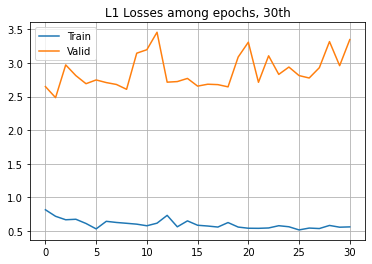

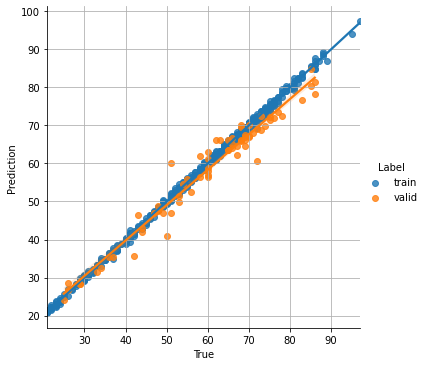

FOLD 9
EPOCHS 31
RMSE :: [TRAIN] 0.543 | [VALID] 2.862
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 32
RMSE :: [TRAIN] 0.507 | [VALID] 2.888
CORR :: [TRAIN] 1.000 | [VALID] 0.980
FOLD 9
EPOCHS 33
RMSE :: [TRAIN] 0.519 | [VALID] 3.100
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 34
RMSE :: [TRAIN] 0.514 | [VALID] 3.002
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 35
RMSE :: [TRAIN] 0.559 | [VALID] 3.013
CORR :: [TRAIN] 0.999 | [VALID] 0.978
FOLD 9
EPOCHS 36
RMSE :: [TRAIN] 0.542 | [VALID] 3.174
CORR :: [TRAIN] 0.999 | [VALID] 0.976
FOLD 9
EPOCHS 37
RMSE :: [TRAIN] 0.469 | [VALID] 2.857
CORR :: [TRAIN] 1.000 | [VALID] 0.980
FOLD 9
EPOCHS 38
RMSE :: [TRAIN] 0.473 | [VALID] 2.658
CORR :: [TRAIN] 1.000 | [VALID] 0.984
FOLD 9
EPOCHS 39
RMSE :: [TRAIN] 0.537 | [VALID] 2.706
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 9
EPOCHS 40
RMSE :: [TRAIN] 0.552 | [VALID] 3.144
CORR :: [TRAIN] 0.999 | [VALID] 0.980


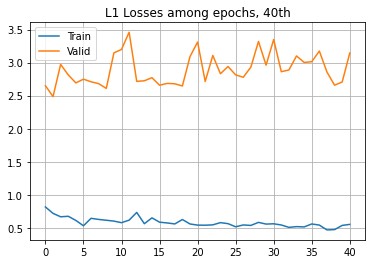

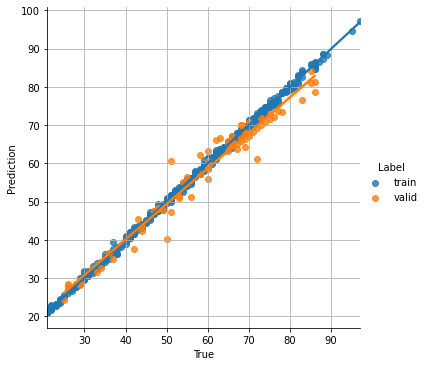

FOLD 9
EPOCHS 41
RMSE :: [TRAIN] 0.612 | [VALID] 3.056
CORR :: [TRAIN] 0.999 | [VALID] 0.979
FOLD 9
EPOCHS 42
RMSE :: [TRAIN] 0.561 | [VALID] 2.609
CORR :: [TRAIN] 0.999 | [VALID] 0.986
FOLD 9
EPOCHS 43
RMSE :: [TRAIN] 0.479 | [VALID] 2.888
CORR :: [TRAIN] 1.000 | [VALID] 0.985
FOLD 9
EPOCHS 44
RMSE :: [TRAIN] 0.494 | [VALID] 2.832
CORR :: [TRAIN] 1.000 | [VALID] 0.984
FOLD 9
EPOCHS 45
RMSE :: [TRAIN] 0.545 | [VALID] 3.584
CORR :: [TRAIN] 0.999 | [VALID] 0.977
FOLD 9
EPOCHS 46
RMSE :: [TRAIN] 0.548 | [VALID] 3.245
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 47
RMSE :: [TRAIN] 0.505 | [VALID] 2.862
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 48
RMSE :: [TRAIN] 0.518 | [VALID] 3.052
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 49
RMSE :: [TRAIN] 0.556 | [VALID] 3.224
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 50
RMSE :: [TRAIN] 0.567 | [VALID] 2.895
CORR :: [TRAIN] 0.999 | [VALID] 0.980


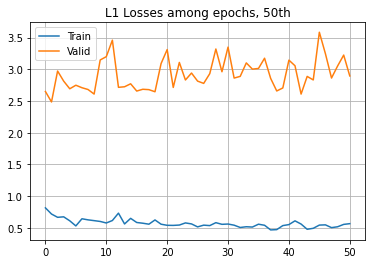

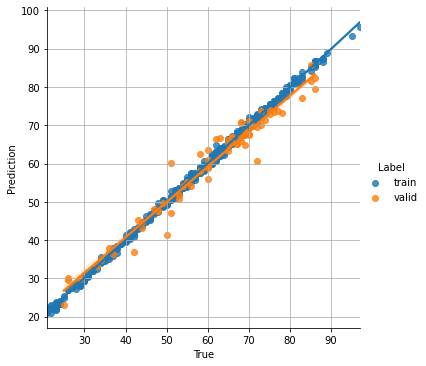

FOLD 9
EPOCHS 51
RMSE :: [TRAIN] 0.584 | [VALID] 2.944
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 52
RMSE :: [TRAIN] 0.569 | [VALID] 3.101
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 53
RMSE :: [TRAIN] 0.579 | [VALID] 2.961
CORR :: [TRAIN] 0.999 | [VALID] 0.983
FOLD 9
EPOCHS 54
RMSE :: [TRAIN] 0.502 | [VALID] 2.965
CORR :: [TRAIN] 1.000 | [VALID] 0.980
FOLD 9
EPOCHS 55
RMSE :: [TRAIN] 0.523 | [VALID] 3.620
CORR :: [TRAIN] 0.999 | [VALID] 0.975
FOLD 9
EPOCHS 56
RMSE :: [TRAIN] 0.505 | [VALID] 3.133
CORR :: [TRAIN] 1.000 | [VALID] 0.977
FOLD 9
EPOCHS 57
RMSE :: [TRAIN] 0.484 | [VALID] 2.797
CORR :: [TRAIN] 1.000 | [VALID] 0.981
FOLD 9
EPOCHS 58
RMSE :: [TRAIN] 0.525 | [VALID] 2.943
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 59
RMSE :: [TRAIN] 0.477 | [VALID] 2.959
CORR :: [TRAIN] 1.000 | [VALID] 0.982
FOLD 9
EPOCHS 60
RMSE :: [TRAIN] 0.514 | [VALID] 2.828
CORR :: [TRAIN] 0.999 | [VALID] 0.981


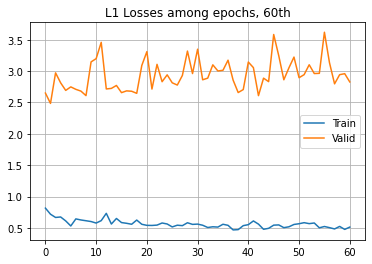

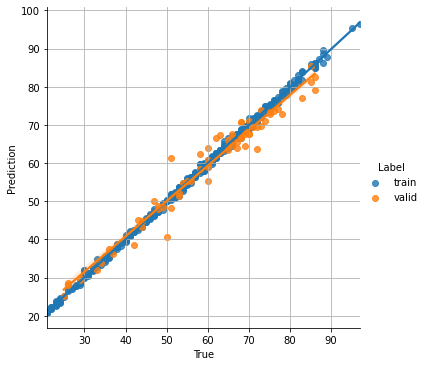

FOLD 9
EPOCHS 61
RMSE :: [TRAIN] 0.534 | [VALID] 2.889
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 62
RMSE :: [TRAIN] 0.555 | [VALID] 3.044
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 63
RMSE :: [TRAIN] 0.540 | [VALID] 3.133
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 64
RMSE :: [TRAIN] 0.512 | [VALID] 3.361
CORR :: [TRAIN] 0.999 | [VALID] 0.979
FOLD 9
EPOCHS 65
RMSE :: [TRAIN] 0.508 | [VALID] 2.939
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 66
RMSE :: [TRAIN] 0.503 | [VALID] 2.930
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 67
RMSE :: [TRAIN] 0.506 | [VALID] 3.579
CORR :: [TRAIN] 1.000 | [VALID] 0.977
FOLD 9
EPOCHS 68
RMSE :: [TRAIN] 0.555 | [VALID] 3.660
CORR :: [TRAIN] 0.999 | [VALID] 0.976
FOLD 9
EPOCHS 69
RMSE :: [TRAIN] 0.493 | [VALID] 3.095
CORR :: [TRAIN] 1.000 | [VALID] 0.981
FOLD 9
EPOCHS 70
RMSE :: [TRAIN] 0.486 | [VALID] 3.135
CORR :: [TRAIN] 1.000 | [VALID] 0.981


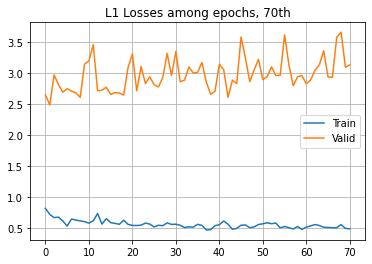

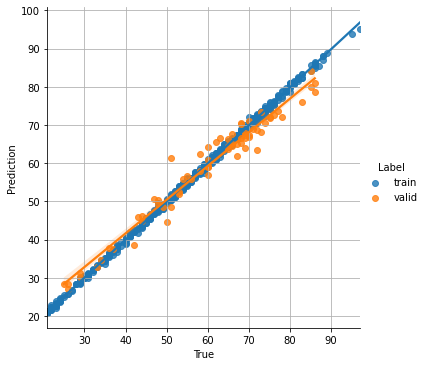

FOLD 9
EPOCHS 71
RMSE :: [TRAIN] 0.527 | [VALID] 3.219
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 72
RMSE :: [TRAIN] 0.550 | [VALID] 3.155
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 73
RMSE :: [TRAIN] 0.521 | [VALID] 3.880
CORR :: [TRAIN] 0.999 | [VALID] 0.971
FOLD 9
EPOCHS 74
RMSE :: [TRAIN] 0.491 | [VALID] 3.162
CORR :: [TRAIN] 1.000 | [VALID] 0.981
FOLD 9
EPOCHS 75
RMSE :: [TRAIN] 0.542 | [VALID] 3.089
CORR :: [TRAIN] 0.999 | [VALID] 0.981
FOLD 9
EPOCHS 76
RMSE :: [TRAIN] 0.574 | [VALID] 3.134
CORR :: [TRAIN] 0.999 | [VALID] 0.979
FOLD 9
EPOCHS 77
RMSE :: [TRAIN] 0.520 | [VALID] 3.119
CORR :: [TRAIN] 0.999 | [VALID] 0.978
FOLD 9
EPOCHS 78
RMSE :: [TRAIN] 0.540 | [VALID] 3.146
CORR :: [TRAIN] 0.999 | [VALID] 0.977
FOLD 9
EPOCHS 79
RMSE :: [TRAIN] 0.544 | [VALID] 3.001
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 80
RMSE :: [TRAIN] 0.583 | [VALID] 3.743
CORR :: [TRAIN] 0.999 | [VALID] 0.977


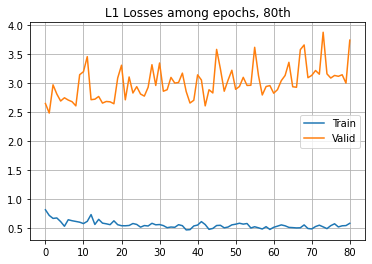

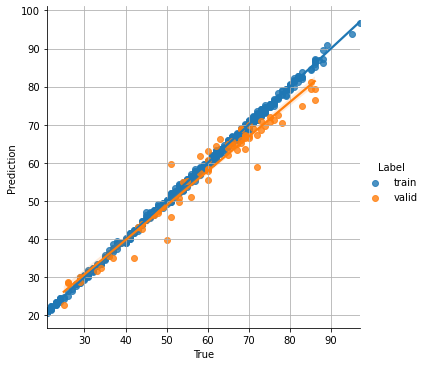

FOLD 9
EPOCHS 81
RMSE :: [TRAIN] 0.508 | [VALID] 3.398
CORR :: [TRAIN] 0.999 | [VALID] 0.975
FOLD 9
EPOCHS 82
RMSE :: [TRAIN] 0.553 | [VALID] 3.262
CORR :: [TRAIN] 0.999 | [VALID] 0.975
FOLD 9
EPOCHS 83
RMSE :: [TRAIN] 0.476 | [VALID] 3.251
CORR :: [TRAIN] 1.000 | [VALID] 0.974
FOLD 9
EPOCHS 84
RMSE :: [TRAIN] 0.553 | [VALID] 2.843
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 85
RMSE :: [TRAIN] 0.444 | [VALID] 2.957
CORR :: [TRAIN] 1.000 | [VALID] 0.981
FOLD 9
EPOCHS 86
RMSE :: [TRAIN] 0.497 | [VALID] 3.254
CORR :: [TRAIN] 1.000 | [VALID] 0.978
FOLD 9
EPOCHS 87
RMSE :: [TRAIN] 0.520 | [VALID] 3.068
CORR :: [TRAIN] 0.999 | [VALID] 0.980
FOLD 9
EPOCHS 88
RMSE :: [TRAIN] 0.540 | [VALID] 3.237
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 89
RMSE :: [TRAIN] 0.408 | [VALID] 3.701
CORR :: [TRAIN] 1.000 | [VALID] 0.975
FOLD 9
EPOCHS 90
RMSE :: [TRAIN] 0.480 | [VALID] 3.400
CORR :: [TRAIN] 1.000 | [VALID] 0.978


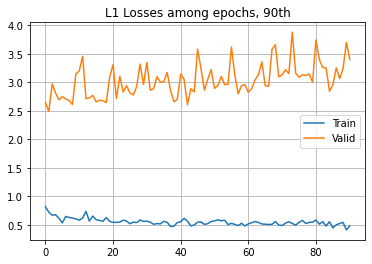

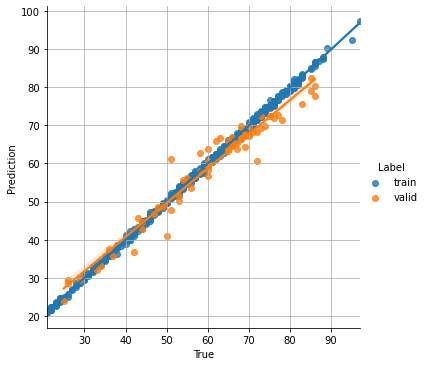

FOLD 9
EPOCHS 91
RMSE :: [TRAIN] 0.445 | [VALID] 3.115
CORR :: [TRAIN] 1.000 | [VALID] 0.981
FOLD 9
EPOCHS 92
RMSE :: [TRAIN] 0.506 | [VALID] 2.879
CORR :: [TRAIN] 0.999 | [VALID] 0.982
FOLD 9
EPOCHS 93
RMSE :: [TRAIN] 0.438 | [VALID] 2.914
CORR :: [TRAIN] 1.000 | [VALID] 0.982
FOLD 9
EPOCHS 94
RMSE :: [TRAIN] 0.483 | [VALID] 3.852
CORR :: [TRAIN] 1.000 | [VALID] 0.974
FOLD 9
EPOCHS 95
RMSE :: [TRAIN] 0.475 | [VALID] 3.489
CORR :: [TRAIN] 1.000 | [VALID] 0.975
FOLD 9
EPOCHS 96
RMSE :: [TRAIN] 0.504 | [VALID] 3.242
CORR :: [TRAIN] 1.000 | [VALID] 0.977
FOLD 9
EPOCHS 97
RMSE :: [TRAIN] 0.495 | [VALID] 3.286
CORR :: [TRAIN] 1.000 | [VALID] 0.976
FOLD 9
EPOCHS 98
RMSE :: [TRAIN] 0.484 | [VALID] 3.210
CORR :: [TRAIN] 1.000 | [VALID] 0.978
FOLD 9
EPOCHS 99
RMSE :: [TRAIN] 0.511 | [VALID] 3.351
CORR :: [TRAIN] 0.999 | [VALID] 0.976
FOLD 9
RMSE :: [TEST] 8.824
CORR :: [TEST] 0.829


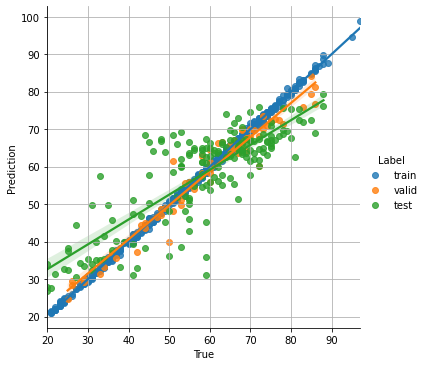

In [9]:
best_loss = 10

trn_fold_losses, tst_fold_losses = [], []
trn_fold_corrs, tst_fold_corrs = [], []
for fold in folds:
    
    train_dset = MyDataset(task_type='age', fold=fold)
    test_dset = MyDataset(task_type='age', test=True, fold=fold)

    train_loader = DataLoader(train_dset, batch_size=8)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    trn_losses, tst_losses = [], []
    for e in epochs:

        # TRAIN
        trn_bth_loss = 0
        trn_trues, trn_preds = [], []
        model.train()
        for i, (x, y) in enumerate(train_loader):

            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            y_pred = model.forward(x).to(device)

            trn_trues.append(y.to('cpu'))
            trn_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            loss.backward()
            optimizer.step()
            if scheduler: scheduler.step()

            trn_bth_loss += loss.item()

        torch.cuda.empty_cache()

        ### loss
        trn_losses.append(trn_bth_loss / len(train_loader))

        ### collect trues/predictions
        trn_trues = list(chain(*trn_trues))
        trn_preds = list(chain(*trn_preds))


        # TEST
        tst_bth_loss = 0
        model.eval()
        tst_trues, tst_preds = [], []
        with torch.no_grad(): # to not give loads on GPU... :(
            for i, (x, y) in enumerate(test_loader):
                if resize:
                    x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

                else:
                    x, y = x.to(device), y.to(device)

                y_pred = model.forward(x).to(device)

                tst_trues.append(y.to('cpu'))
                tst_preds.append(y_pred.to('cpu'))

                loss = loss_fn(y_pred.squeeze(1), y)
                del x, y, y_pred

                tst_bth_loss += loss.item()

        torch.cuda.empty_cache()
        ### loss
        tst_losses.append(tst_bth_loss / len(test_loader))

        ### collect trues/predictions
        tst_trues = list(chain(*tst_trues))
        tst_preds = list(chain(*tst_preds))

        reg_df = pd.DataFrame({
            'True': list(map(float, trn_trues + tst_trues)),
            'Prediction': list(map(float, trn_preds + tst_preds)),
            'Label': ['train'] * len(trn_trues) + ['valid'] * len(tst_trues)
        })

        trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
        tst_corr = reg_df[reg_df['Label'] == 'valid'].corr().Prediction['True']

        print(f'FOLD {fold}')
        print(f'EPOCHS {e}')
        print(f'RMSE :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
        print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')

        if e % 10 == 0:
            plt.title(f"L1 Losses among epochs, {e}th")
            plt.plot(trn_losses, label='Train')
            plt.plot(tst_losses, label='Valid')
            plt.grid(); plt.legend()
            
            sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
            plt.grid()
            plt.show()
    
    trn_fold_losses.append(trn_losses)
    trn_fold_corrs.append(trn_corr)
    tst_fold_losses.append(tst_losses)
    tst_fold_corrs.append(tst_corr)
    
    # TEST
    test_dset = MyDataset(task_type='age', test=True)
    test_loader = DataLoader(test_dset, batch_size=8)
    
    tst_bth_loss = 0
    model.eval()
    tst_trues, tst_preds = [], []
    with torch.no_grad(): # to not give loads on GPU... :(
        for i, (x, y) in enumerate(test_loader):
            if resize:
                x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

            else:
                x, y = x.to(device), y.to(device)

            y_pred = model.forward(x).to(device)

            tst_trues.append(y.to('cpu'))
            tst_preds.append(y_pred.to('cpu'))

            loss = loss_fn(y_pred.squeeze(1), y)
            del x, y, y_pred

            tst_bth_loss += loss.item()

    torch.cuda.empty_cache()
    ### loss
    tst_loss = tst_bth_loss / len(test_loader)

    ### collect trues/predictions
    tst_trues = list(chain(*tst_trues))
    tst_preds = list(chain(*tst_preds))
    
    tst_df = pd.DataFrame({
        'True': list(map(float, tst_trues)),
        'Prediction': list(map(float, tst_preds)),
        'Label': ['test'] * len(tst_trues)
    })
    reg_df = pd.concat([reg_df, tst_df], ignore_index=True)

    tst_corr = reg_df[reg_df['Label'] == 'test'].corr().Prediction['True']
    print(f'FOLD {fold}')
    print(f'RMSE :: [TEST] {tst_loss:.3f}')
    print(f'CORR :: [TEST] {tst_corr:.3f}')

    sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
    plt.grid()
    plt.show()

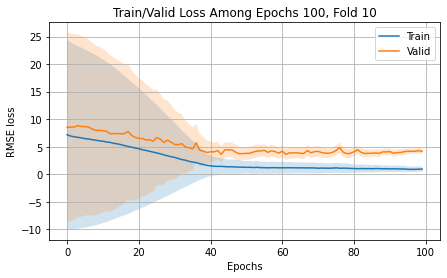

In [14]:
trn_fold_losses_np = np.array(trn_fold_losses)
tst_fold_losses_np = np.array(tst_fold_losses)

trn_loss_avg = np.average(trn_fold_losses_np, axis=0)
trn_loss_std = np.std(trn_fold_losses_np, axis=0)

tst_loss_avg = np.average(tst_fold_losses_np, axis=0)
tst_loss_std = np.std(tst_fold_losses_np, axis=0)

plt.figure(figsize=(7, 4))
plt.title('Train/Valid Loss Among Epochs 100, Fold 10')

plt.plot(trn_loss_avg, label='Train')
plt.fill_between(range(100), trn_loss_avg-trn_loss_std, trn_loss_avg+trn_loss_std, alpha=.2)
plt.plot(tst_loss_avg, label='Valid')
plt.fill_between(range(100), tst_loss_avg-trn_loss_std, tst_loss_avg+trn_loss_std, alpha=.2)

plt.xlabel('Epochs')
plt.ylabel('RMSE loss')

plt.legend()
# plt.ylim(5, 15)
plt.grid()

In [22]:
trn_fold_corrs

[0.9877843547675885,
 0.9971519808493158,
 0.9978138477037183,
 0.9981936212549423,
 0.9983492094781208,
 0.9988148068318536,
 0.9988772172156569,
 0.9993328395374147,
 0.9994834467027386,
 0.9994792696992164]

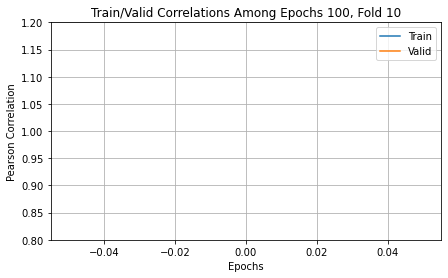

In [20]:
trn_fold_corrs_np = np.array(trn_fold_corrs)
tst_fold_corrs_np = np.array(tst_fold_corrs)

trn_corr_avg = np.average(trn_fold_corrs_np, axis=0)
trn_corr_std = np.std(trn_fold_corrs_np, axis=0)

tst_corr_avg = np.average(tst_fold_corrs_np, axis=0)
tst_corr_std = np.std(tst_fold_corrs_np, axis=0)

plt.figure(figsize=(7, 4))
plt.title('Train/Valid Correlations Among Epochs 100, Fold 10')

plt.plot(trn_corr_avg, label='Train')
# plt.fill_between(range(100), trn_corr_avg-trn_corr_std, trn_corr_avg+trn_corr_std, alpha=.2)
plt.plot(tst_corr_avg, label='Valid')
# plt.fill_between(range(100), tst_corr_avg-trn_corr_std, tst_corr_avg+trn_corr_std, alpha=.2)

plt.xlabel('Epochs')
plt.ylabel('Pearson Correlation')

plt.legend()
plt.ylim(0.8, 1.2)
plt.grid()

In [11]:
# trn_losses, tst_losses = [], []
# best_loss = 10

# for e in range(300):

#     # TRAIN
#     trn_bth_loss = 0
#     trn_trues, trn_preds = [], []
#     model.train()
#     for i, (x, y) in enumerate(train_loader):

#         if resize:
#             x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#         else:
#             x, y = x.to(device), y.to(device)

#         optimizer.zero_grad()

#         y_pred = model.forward(x).to(device)

#         trn_trues.append(y.to('cpu'))
#         trn_preds.append(y_pred.to('cpu'))

#         loss = torch.sqrt(loss_fn(y_pred.squeeze(1), y)) # <- for MSE -> RMSE
# #         loss = loss_fn(y_pred.squeeze(1), y)
#         del x, y, y_pred

#         loss.backward()
#         optimizer.step()
#         if scheduler: scheduler.step()

#         trn_bth_loss += loss.item()

#     torch.cuda.empty_cache()
    
#     ### loss
#     trn_losses.append(trn_bth_loss / len(train_loader))

#     ### collect trues/predictions
#     trn_trues = list(chain(*trn_trues))
#     trn_preds = list(chain(*trn_preds))

        
#     # TEST
#     tst_bth_loss = 0
#     model.eval()
#     tst_trues, tst_preds = [], []
#     with torch.no_grad(): # to not give loads on GPU... :(
#         for i, (x, y) in enumerate(test_loader):
#             if resize:
#                 x, y = F.interpolate(x, size=(96, 96, 96)).to(device), y.to(device)

#             else:
#                 x, y = x.to(device), y.to(device)

#             y_pred = model.forward(x).to(device)

#             tst_trues.append(y.to('cpu'))
#             tst_preds.append(y_pred.to('cpu'))

#             loss = torch.sqrt(loss_fn(y_pred.squeeze(1), y)) # <- for MSE -> RMSE
# #             loss = loss_fn(y_pred.squeeze(1), y)
#             del x, y, y_pred

#             tst_bth_loss += loss.item()

#     torch.cuda.empty_cache()
#     ### loss
#     tst_losses.append(tst_bth_loss / len(test_loader))

#     ### collect trues/predictions
#     tst_trues = list(chain(*tst_trues))
#     tst_preds = list(chain(*tst_preds))
    
#     reg_df = pd.DataFrame({
#         'True': list(map(float, trn_trues + tst_trues)),
#         'Prediction': list(map(float, trn_preds + tst_preds)),
#         'Label': ['train'] * len(trn_trues) + ['test'] * len(tst_trues)
#     })
    
#     trn_corr = reg_df[reg_df['Label'] == 'train'].corr().Prediction['True']
#     tst_corr = reg_df[reg_df['Label'] == 'test' ].corr().Prediction['True']

#     print(f'EPOCHS {e}')
#     print(f'RMSE :: [TRAIN] {trn_losses[-1]:.3f} | [VALID] {tst_losses[-1]:.3f}')
#     print(f'CORR :: [TRAIN] {trn_corr:.3f} | [VALID] {tst_corr:.3f}')
    
#     sns.lmplot(data=reg_df, x='True', y='Prediction', hue='Label')
#     plt.grid()
#     plt.show()
    
#     if best_loss - .02 > tst_losses[-1]:
        
#         date = f'{datetime.now().strftime("%Y-%m-%d_%H%M")}'
#         fname = f"./models/{date}_{tst_losses[-1]:.3f}_model.pth"
#         torch.save(model, fname)
#         best_loss = min(tst_losses[-1], best_loss)
        
#     summary.add_scalars('loss/RMSE_loss',
#                          {'Train Loss': trn_losses[-1],
#                           'Valid Loss': tst_losses[-1]}, e)
#     summary.add_scalars('corr',
#                        {'Train Correlation': trn_corr,
#                         'Valid Correlation': tst_corr,
#                         'Total Correlation': reg_df.corr().Prediction['True']}, e)
    
#     if e % 20 == 0:
#         plt.plot(trn_losses, label='Train')
#         plt.plot(tst_losses, label='Valid')
#         plt.title(f"L1 Losses among epochs, {e}th")
#         #plt.ylim(0, 500)
#         plt.grid()
#         plt.legend()

In [12]:
# %load ../2d_slice/src/slice_viewer.py

In [13]:
# SliceViewer(np.array(train_dset[0][0][0])).triple_view()